In [10]:
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

def vgg16_model(trainable=True):
    base_model = VGG16(False, "imagenet")
    train_from_layer = -2
    for layer in base_model.layers[:train_from_layer]:
        layer.trainable = False
        print("{} is not trainable".format(layer.name))
    for layer in base_model.layers[train_from_layer:]:
        layer.trainable = True
        print("{} is trainable".format(layer.name))
    last_conv_layer = base_model.get_layer("block5_conv3")
    x = GlobalAveragePooling2D()(last_conv_layer.output)
    x = Dense(512, activation="relu")(x)
    predictions = Dense(1, activation="sigmoid")(x)
    return Model(base_model.input, predictions)

model = vgg16_model(False)
model.summary()

input_2 is not trainable
block1_conv1 is not trainable
block1_conv2 is not trainable
block1_pool is not trainable
block2_conv1 is not trainable
block2_conv2 is not trainable
block2_pool is not trainable
block3_conv1 is not trainable
block3_conv2 is not trainable
block3_conv3 is not trainable
block3_pool is not trainable
block4_conv1 is not trainable
block4_conv2 is not trainable
block4_conv3 is not trainable
block4_pool is not trainable
block5_conv1 is not trainable
block5_conv2 is not trainable
block5_conv3 is trainable
block5_pool is trainable
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64) 

In [3]:
from Datasets import Datasets

dataset_name = "Bradbury"
dataset = Datasets.datasets()[dataset_name]

In [4]:
from keras.applications.xception import preprocess_input
import numpy as np

# Add preprocessing
train_images = dataset[0].images
train_labels  = dataset[0].labels

test_images = dataset[1].images
test_labels = dataset[1].labels

validation_images = dataset[2].images
validation_labels = dataset[2].labels

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from ProjectPaths import ProjectPaths

In [6]:
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator()


In [12]:
from PerformanceMetrics import PerformanceMetrics

model.compile(optimizer="rmsprop", loss='binary_crossentropy',
                  metrics=['accuracy', PerformanceMetrics.precision,
                           PerformanceMetrics.recall, PerformanceMetrics.fmeasure])

In [8]:
batch_size = 64

train_generator = data_generator.flow(train_images, train_labels, batch_size=batch_size)
test_generator = test_datagen.flow(test_images, test_labels, batch_size=batch_size, shuffle=False)

In [13]:
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping


epochs = 100

model_name = "vgg16_3t_wmp_wr_{}".format(dataset_name)

checkpoint_dir = ProjectPaths.checkpoint_dir_for(model_name, batch_size, epochs)
if not os.path.exists(checkpoint_dir):
    os.mkdir(checkpoint_dir)

file_in_checkpoint_dir = ProjectPaths.file_in_checkpoint_dir(model_name, batch_size,
                                                                 epochs,  model_name +
                                                                 "__{epoch:02d}_{val_acc:.2f}.hdf5")

early_stopping_callback = EarlyStopping(patience=10)
model_checkpoint_callback = ModelCheckpoint(file_in_checkpoint_dir, monitor='val_acc', verbose=True,
                                                save_weights_only=True,
                                                save_best_only=True)

log_dir = os.path.join(ProjectPaths.log_dir(), model_name)
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=0,  write_graph=False, write_images=False)


model.fit_generator(train_generator,
                    steps_per_epoch=len(train_labels) // batch_size, 
                    epochs=epochs,
                    callbacks=[early_stopping_callback, model_checkpoint_callback, tensorboard_callback],
                    validation_data=test_generator,
                    validation_steps=len(test_labels))

Epoch 1/100
496/496 [==============================] - 25s 50ms/step - loss: 0.3573 - acc: 0.8513 - precision: 0.8317 - recall: 0.8866 - fmeasure: 0.8489 - val_loss: 0.2893 - val_acc: 0.8784 - val_precision: 0.9282 - val_recall: 0.8153 - val_fmeasure: 0.8661

Epoch 00001: val_acc improved from -inf to 0.87843, saving model to /media/tim/Data/Work/CBS/Code_hannah/Models/vgg16_3t_wmp_wr_Bradbury_2018-09-03_64_100/vgg16_3t_wmp_wr_Bradbury__01_0.88.hdf5
Epoch 2/100
496/496 [==============================] - 24s 49ms/step - loss: 0.2776 - acc: 0.8816 - precision: 0.8637 - recall: 0.9117 - fmeasure: 0.8831 - val_loss: 0.2742 - val_acc: 0.8802 - val_precision: 0.8153 - val_recall: 0.9782 - val_fmeasure: 0.8879

Epoch 00002: val_acc improved from 0.87843 to 0.88019, saving model to /media/tim/Data/Work/CBS/Code_hannah/Models/vgg16_3t_wmp_wr_Bradbury_2018-09-03_64_100/vgg16_3t_wmp_wr_Bradbury__02_0.88.hdf5
Epoch 3/100
496/496 [==============================] - 24s 49ms/step - loss: 0.2683 - acc


Epoch 00022: val_acc did not improve from 0.91870
Epoch 23/100
496/496 [==============================] - 24s 49ms/step - loss: 0.2103 - acc: 0.9154 - precision: 0.9023 - recall: 0.9335 - fmeasure: 0.9157 - val_loss: 0.2338 - val_acc: 0.9154 - val_precision: 0.9246 - val_recall: 0.9009 - val_fmeasure: 0.9116

Epoch 00023: val_acc did not improve from 0.91870
Epoch 24/100
496/496 [==============================] - 25s 50ms/step - loss: 0.2068 - acc: 0.9162 - precision: 0.9031 - recall: 0.9336 - fmeasure: 0.9162 - val_loss: 0.2172 - val_acc: 0.9182 - val_precision: 0.8837 - val_recall: 0.9614 - val_fmeasure: 0.9197

Epoch 00024: val_acc did not improve from 0.91870
Epoch 25/100
496/496 [==============================] - 24s 48ms/step - loss: 0.2084 - acc: 0.9180 - precision: 0.9055 - recall: 0.9341 - fmeasure: 0.9179 - val_loss: 0.2157 - val_acc: 0.9220 - val_precision: 0.8987 - val_recall: 0.9499 - val_fmeasure: 0.9226

Epoch 00025: val_acc improved from 0.91870 to 0.92197, saving mode

496/496 [==============================] - 24s 48ms/step - loss: 0.1809 - acc: 0.9286 - precision: 0.9200 - recall: 0.9404 - fmeasure: 0.9287 - val_loss: 0.2169 - val_acc: 0.9232 - val_precision: 0.8837 - val_recall: 0.9733 - val_fmeasure: 0.9252

Epoch 00048: val_acc did not improve from 0.92600
Epoch 49/100
496/496 [==============================] - 24s 49ms/step - loss: 0.1849 - acc: 0.9270 - precision: 0.9192 - recall: 0.9375 - fmeasure: 0.9266 - val_loss: 0.2349 - val_acc: 0.9169 - val_precision: 0.8729 - val_recall: 0.9733 - val_fmeasure: 0.9195

Epoch 00049: val_acc did not improve from 0.92600
Epoch 50/100
496/496 [==============================] - 24s 49ms/step - loss: 0.1837 - acc: 0.9271 - precision: 0.9175 - recall: 0.9389 - fmeasure: 0.9265 - val_loss: 0.1939 - val_acc: 0.9273 - val_precision: 0.9081 - val_recall: 0.9492 - val_fmeasure: 0.9272

Epoch 00050: val_acc improved from 0.92600 to 0.92726, saving model to /media/tim/Data/Work/CBS/Code_hannah/Models/vgg16_3t_wmp_wr

In [14]:
import pandas as pd

train_eval = model.evaluate(train_images, train_labels, batch_size)
test_eval = model.evaluate(test_images, test_labels, batch_size)
validation_eval = model.evaluate(validation_images, validation_labels, batch_size)

np_model_evaluations = np.array([train_eval, test_eval, validation_eval])

evaluations = pd.DataFrame(np_model_evaluations, columns=model.metrics_names)
print(evaluations.head())

3973/3973 [==============================] - 2s 380us/step
       loss       acc  precision    recall  fmeasure
0  0.159160  0.939325   0.913289  0.970972  0.940400
1  0.237877  0.924239   0.891716  0.963806  0.925234
2  0.270463  0.915429   0.885142  0.957076  0.918740


In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve

def find_optimal_cutoff(target, predicted):
   """ Find the optimal probability cutoff point for a classification model related to event rate
   Parameters
   ----------
   target : Matrix with dependent or target data, where rows are observations

   predicted : Matrix with predicted data, where rows are observations

   Returns
   -------
   list type, with optimal cutoff value

   """
   fpr, tpr, threshold = roc_curve(target, predicted)
   i = np.arange(len(tpr))
   roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
   roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

   return list(roc_t['threshold'])

In [16]:
from sklearn.metrics import confusion_matrix

test_predictions = model.predict(test_images, batch_size)

In [17]:
cut_off = find_optimal_cutoff(test_labels, test_predictions)
cut_off

/usr/lib/python3/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


[0.767255961894989]

In [18]:
predicted_labels = test_predictions > cut_off
confusion_matrix(test_labels, predicted_labels)


array([[1870,  145],
       [ 143, 1815]])

In [19]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, predicted_labels))

             precision    recall  f1-score   support

          0       0.93      0.93      0.93      2015
          1       0.93      0.93      0.93      1958

avg / total       0.93      0.93      0.93      3973



# Aachen

In [20]:
ac_dataset = Datasets.datasets()["AcMüDüHo"]

train_images = ac_dataset[0].images
train_labels = ac_dataset[0].labels

test_images = ac_dataset[1].images
test_labels = ac_dataset[1].labels

validation_images = ac_dataset[2].images
validation_labels = ac_dataset[2].labels

eval_images = np.concatenate((train_images, test_images, validation_images), axis=0)
eval_labels = np.concatenate((train_labels, test_labels, validation_labels), axis=0)


print(train_images.shape, test_images.shape, validation_images.shape)
print(eval_images.shape, eval_labels.shape)

(3357, 75, 75, 3) (374, 75, 75, 3) (934, 75, 75, 3)
(4665, 75, 75, 3) (4665,)


In [21]:
eval_predictions = model.predict(eval_images, batch_size) > cut_off
confusion_matrix(eval_labels, eval_predictions)

array([[1949,  385],
       [ 455, 1876]])

In [22]:
from sklearn.metrics import classification_report

print(classification_report(eval_labels, eval_predictions))

             precision    recall  f1-score   support

        0.0       0.81      0.84      0.82      2334
        1.0       0.83      0.80      0.82      2331

avg / total       0.82      0.82      0.82      4665



# Fresno

In [23]:
fresno_dataset = Datasets.datasets()["Fresno"]

train_images = fresno_dataset[0].images
train_labels = fresno_dataset[0].labels

test_images = fresno_dataset[1].images
test_labels = fresno_dataset[1].labels

validation_images = fresno_dataset[2].images
validation_labels = fresno_dataset[2].labels

fresno_eval_images = np.concatenate((train_images, test_images, validation_images), axis=0)
fresno_eval_labels = np.concatenate((train_labels, test_labels, validation_labels), axis=0)


print(train_images.shape, test_images.shape, validation_images.shape)
print(fresno_eval_images.shape, fresno_eval_labels.shape)

(3646, 75, 75, 3) (1022, 75, 75, 3) (1022, 75, 75, 3)
(5690, 75, 75, 3) (5690,)


In [24]:
fresno_eval_predictions = model.predict(fresno_eval_images, batch_size) > cut_off
confusion_matrix(fresno_eval_labels, fresno_eval_predictions)

array([[2699,  146],
       [ 183, 2662]])

In [25]:
from sklearn.metrics import classification_report

print(classification_report(fresno_eval_labels, fresno_eval_predictions))

             precision    recall  f1-score   support

          0       0.94      0.95      0.94      2845
          1       0.95      0.94      0.94      2845

avg / total       0.94      0.94      0.94      5690



# Visualizations

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
Total params: 1,792
Trainable params: 0
Non-trainable params: 1,792
_________________________________________________________________
(1, 75, 75, 64)


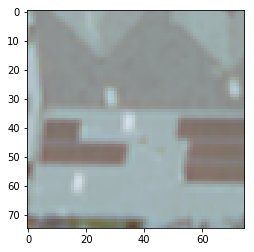

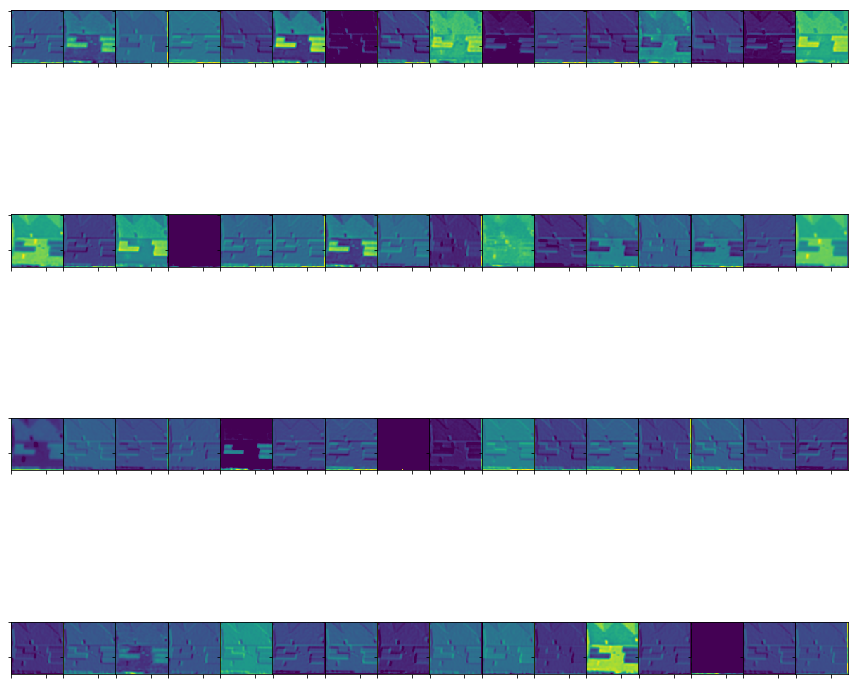

In [34]:
from keras.models import Model

def visualize_layer(output_img,columns=16):
    rows = output_img.shape[2] // columns

    fig, ax = plt.subplots(rows, columns, figsize=(15,15))
    i = 0    
    for r in range(rows):
        for c in range(columns):
            ax[r, c].imshow(output_img[:,:,i])
            ax[r, c].set_xticklabels([])
            ax[r, c].set_yticklabels([])
            i += 1
    plt.subplots_adjust(wspace=0, hspace=0)
    

def model_until_layer(model, layer_name):
    layer = model.get_layer(layer_name)
    base_model = Model(model.input, layer.output)
    base_model.summary()
    return base_model



image = test_images[0] 
plt.imshow(image)

base_model = model_until_layer(model, "block1_conv1")
batch_input = np.expand_dims(image, axis=0)
output = base_model.predict(batch_input)
print(output.shape)

output_img = np.squeeze(output, axis=0)
           
visualize_layer(output_img, 16)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
Total params: 38,720
Trainable params: 0
Non-trainable params: 38,720
_________________________________________________________________
(1, 75, 75, 64)


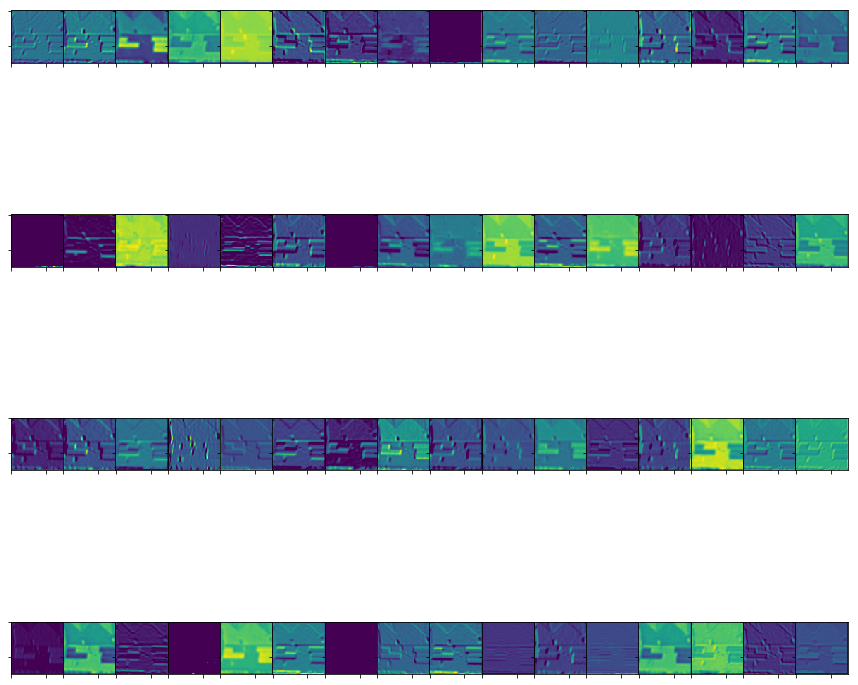

In [35]:
base_model = model_until_layer(model, "block1_conv2")
batch_input = np.expand_dims(image, axis=0)
output = base_model.predict(batch_input)
print(output.shape)

output_img = np.squeeze(output, axis=0)
           
visualize_layer(output_img, 16)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
Total params: 112,576
Trainable params: 0
Non-trainable params: 112,576
_________________________________________________________________
(1, 37, 37, 128)


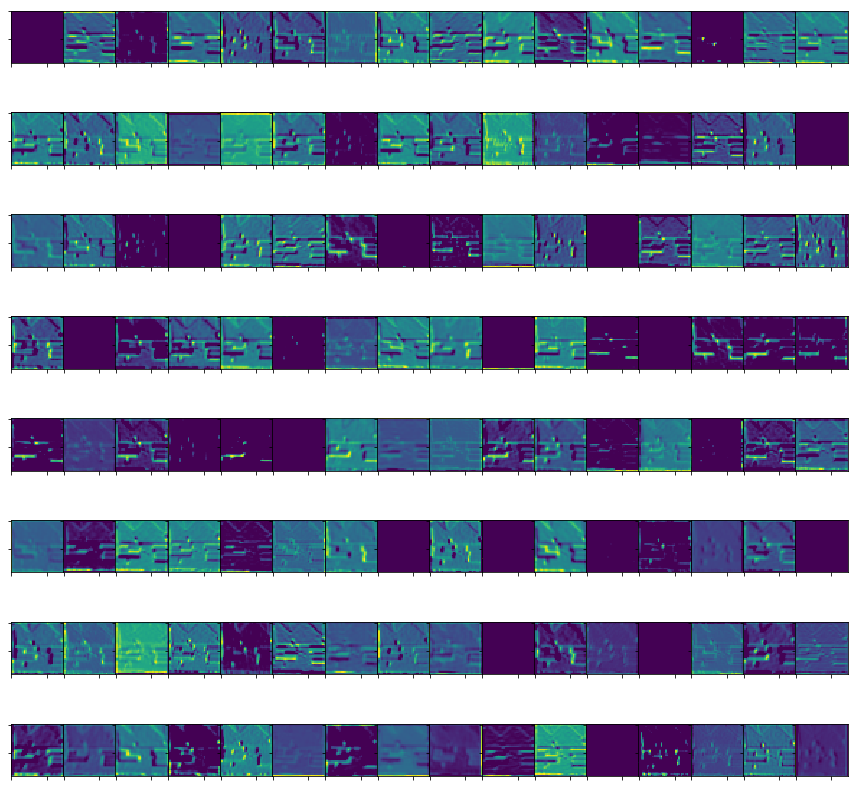

In [36]:
base_model = model_until_layer(model, "block2_conv1")
batch_input = np.expand_dims(image, axis=0)
output = base_model.predict(batch_input)
print(output.shape)

output_img = np.squeeze(output, axis=0)
           
visualize_layer(output_img, 16)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
Total params: 260,160
Trainable params: 0
Non-trainable params: 260,160
_________________________________________________________________
(1, 

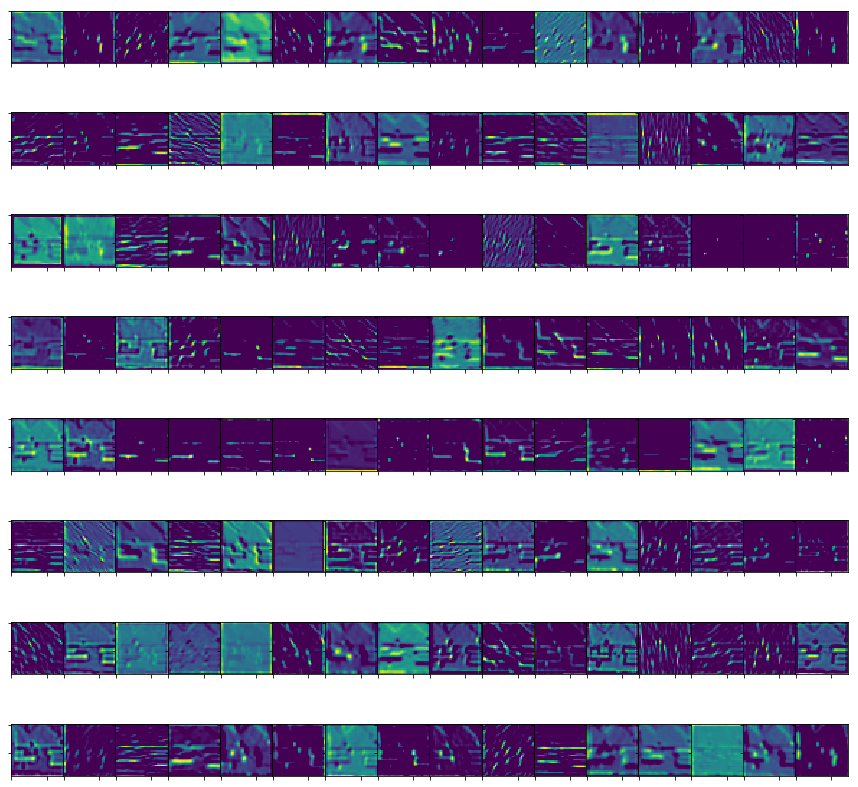

In [37]:
base_model = model_until_layer(model, "block2_conv2")
batch_input = np.expand_dims(image, axis=0)
output = base_model.predict(batch_input)
print(output.shape)

output_img = np.squeeze(output, axis=0)
           
visualize_layer(output_img, 16)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

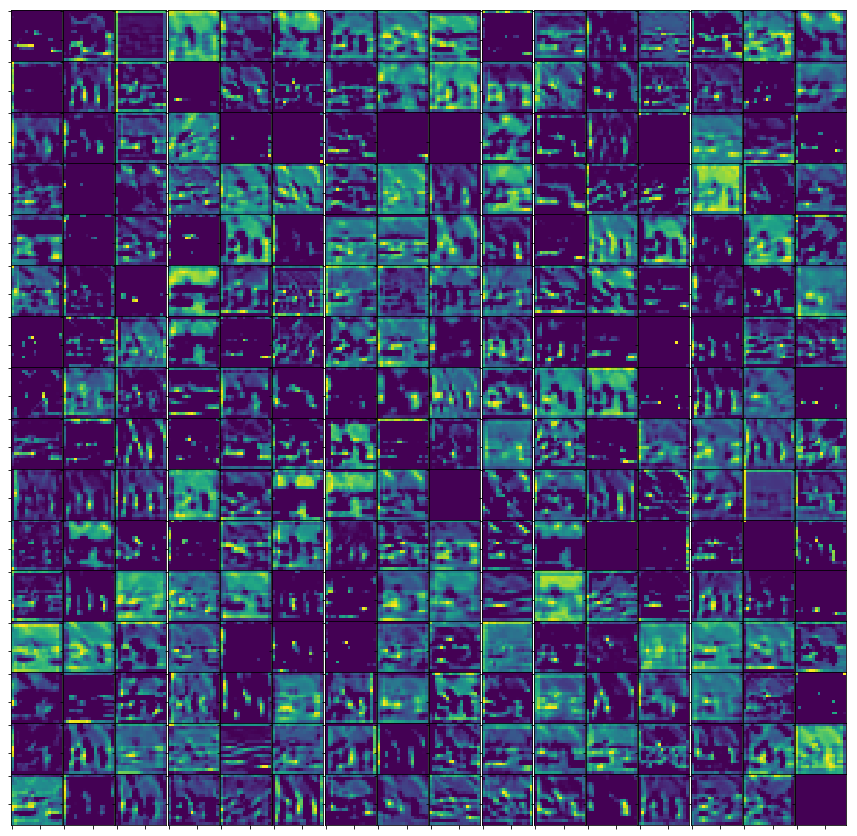

In [38]:
base_model = model_until_layer(model, "block3_conv1")
batch_input = np.expand_dims(image, axis=0)
output = base_model.predict(batch_input)
print(output.shape)

output_img = np.squeeze(output, axis=0)
           
visualize_layer(output_img, 16)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

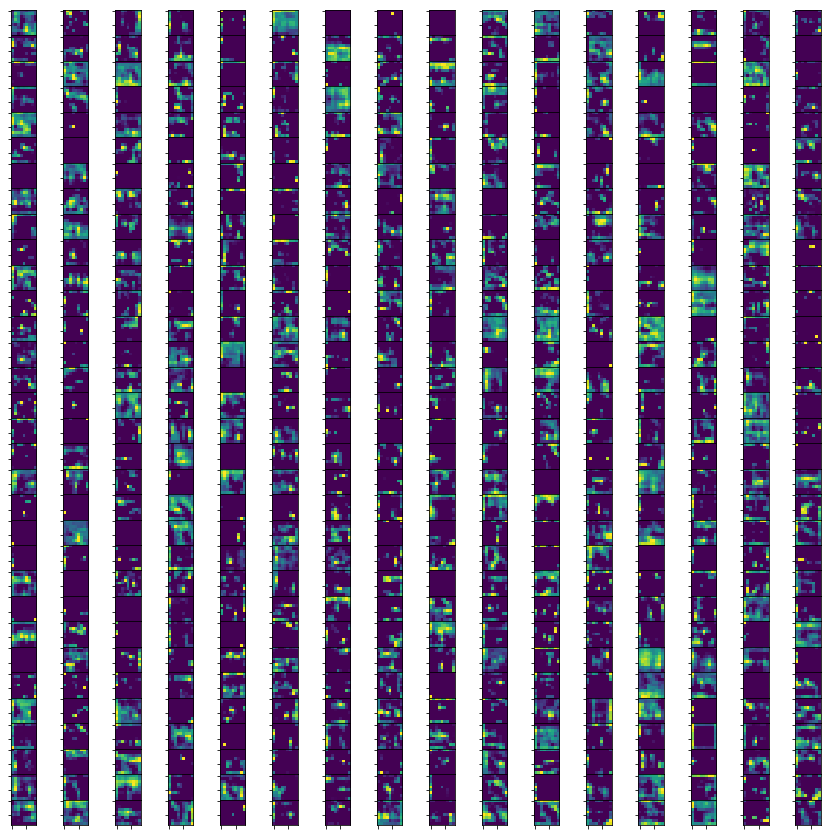

In [39]:
base_model = model_until_layer(model, "block4_conv1")
batch_input = np.expand_dims(image, axis=0)
output = base_model.predict(batch_input)
print(output.shape)

output_img = np.squeeze(output, axis=0)
           
visualize_layer(output_img, 16)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

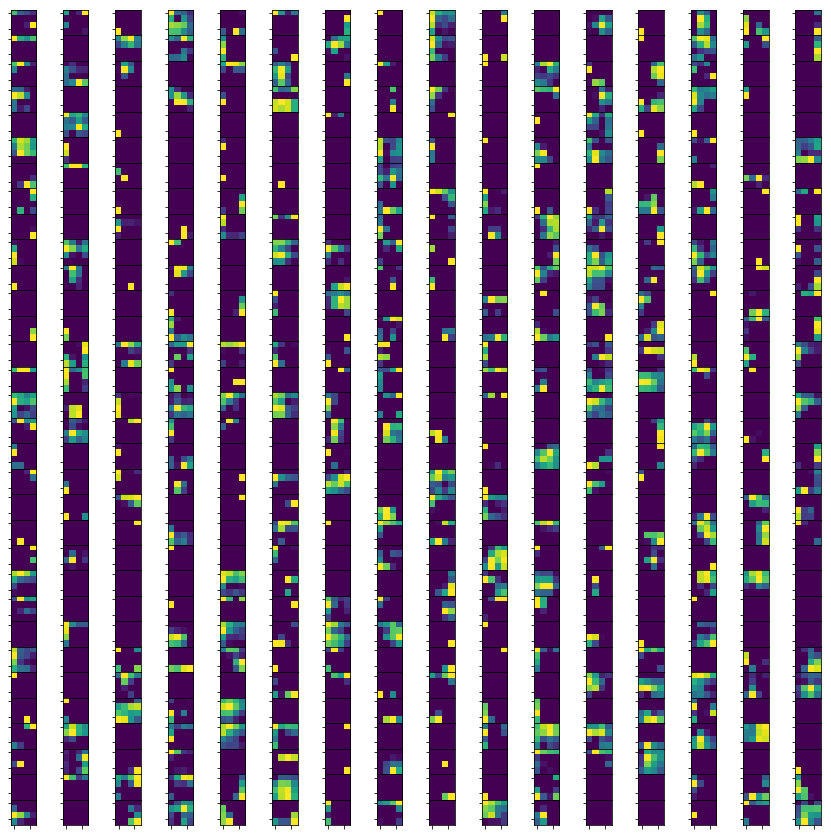

In [40]:
base_model = model_until_layer(model, "block5_conv1")
batch_input = np.expand_dims(image, axis=0)
output = base_model.predict(batch_input)
print(output.shape)

output_img = np.squeeze(output, axis=0)
           
visualize_layer(output_img, 16)

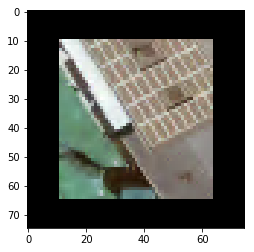

In [51]:
ac_image = ac_dataset[1].images[5]
plt.imshow(ac_image)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
Total params: 112,576
Trainable params: 0
Non-trainable params: 112,576
_________________________________________________________________
(1, 37, 37, 128)


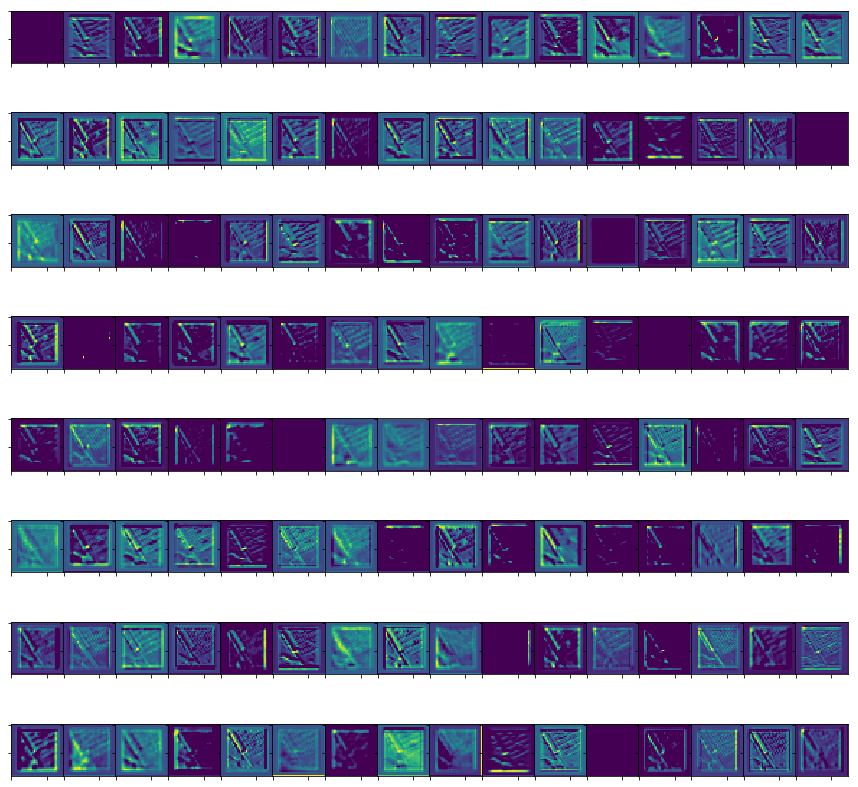

In [52]:
base_model = model_until_layer(model, "block2_conv1")
batch_input = np.expand_dims(ac_image, axis=0)
output = base_model.predict(batch_input)
print(output.shape)

output_img = np.squeeze(output, axis=0)
           
visualize_layer(output_img, 16)

# Activation Maximization

In [ ]:
import importlib
import VisualizeNetwork
importlib.reload(VisualizeNetwork)

from VisualizeNetwork import visualize_all_layers


visualize_all_layers(model)

Processing filter 0
Current loss value: 9.88394
Current loss value: 11.8572
Current loss value: 13.9148
Current loss value: 16.0275
Current loss value: 18.1803
Current loss value: 20.3594
Current loss value: 22.5593
Current loss value: 24.775
Current loss value: 27.003
Current loss value: 29.2426
Current loss value: 31.4922
Current loss value: 33.7499
Current loss value: 36.0162
Current loss value: 38.2881
Current loss value: 40.5649
Current loss value: 42.8467
Current loss value: 45.1324
Current loss value: 47.4212
Current loss value: 49.7144
Current loss value: 52.0098
Filter 0 processed in 0s
Processing filter 1
Current loss value: 28.4464
Current loss value: 32.0219
Current loss value: 35.5974
Current loss value: 39.1729
Current loss value: 42.7484
Current loss value: 46.3239
Current loss value: 49.8993
Current loss value: 53.4748
Current loss value: 57.0503
Current loss value: 60.6258
Current loss value: 64.2013
Current loss value: 67.7768
Current loss value: 71.3522
Current loss 

Current loss value: 132.943
Current loss value: 136.55
Current loss value: 140.158
Current loss value: 143.766
Current loss value: 147.374
Current loss value: 150.982
Current loss value: 154.59
Current loss value: 158.197
Filter 16 processed in 0s
Processing filter 17
Current loss value: 2.02013
Current loss value: 2.24202
Current loss value: 2.51622
Current loss value: 2.84656
Current loss value: 3.22391
Current loss value: 3.638
Current loss value: 4.08303
Current loss value: 4.55411
Current loss value: 5.05162
Current loss value: 5.57175
Current loss value: 6.11041
Current loss value: 6.66582
Current loss value: 7.23922
Current loss value: 7.83062
Current loss value: 8.43613
Current loss value: 9.05686
Current loss value: 9.68966
Current loss value: 10.3349
Current loss value: 10.9937
Current loss value: 11.6648
Filter 17 processed in 0s
Processing filter 18
Current loss value: 13.3453
Current loss value: 17.922
Current loss value: 22.51
Current loss value: 27.1016
Current loss valu

Current loss value: 382.703
Current loss value: 385.69
Current loss value: 388.677
Current loss value: 391.664
Current loss value: 394.651
Current loss value: 397.638
Current loss value: 400.625
Current loss value: 403.612
Current loss value: 406.599
Current loss value: 409.586
Current loss value: 412.573
Current loss value: 415.56
Current loss value: 418.547
Current loss value: 421.534
Current loss value: 424.521
Current loss value: 427.508
Current loss value: 430.495
Current loss value: 433.482
Current loss value: 436.469
Current loss value: 439.456
Filter 31 processed in 0s
Processing filter 32
Current loss value: 0.0
Filter 32 processed in 0s
Processing filter 33
Current loss value: 38.984
Current loss value: 41.0058
Current loss value: 43.0276
Current loss value: 45.0494
Current loss value: 47.0712
Current loss value: 49.093
Current loss value: 51.1148
Current loss value: 53.1366
Current loss value: 55.1584
Current loss value: 57.1802
Current loss value: 59.202
Current loss value:

Current loss value: 8.64192
Current loss value: 10.7457
Current loss value: 12.8764
Current loss value: 15.0228
Current loss value: 17.1805
Current loss value: 19.3471
Current loss value: 21.5195
Current loss value: 23.6978
Current loss value: 25.8804
Current loss value: 28.0663
Current loss value: 30.2556
Current loss value: 32.4475
Current loss value: 34.6415
Current loss value: 36.8375
Current loss value: 39.0352
Current loss value: 41.2342
Current loss value: 43.4347
Current loss value: 45.6361
Current loss value: 47.8383
Current loss value: 50.0415
Filter 49 processed in 0s
Processing filter 50
Current loss value: 0.602422
Current loss value: 2.08162
Current loss value: 4.07582
Current loss value: 6.40123
Current loss value: 8.9664
Current loss value: 11.708
Current loss value: 14.5771
Current loss value: 17.544
Current loss value: 20.5867
Current loss value: 23.6811
Current loss value: 26.8096
Current loss value: 29.9621
Current loss value: 33.1289
Current loss value: 36.3063
Cur

Current loss value: 141.82
Current loss value: 145.32
Current loss value: 149.102
Current loss value: 153.064
Current loss value: 157.209
Current loss value: 161.717
Current loss value: 166.779
Current loss value: 172.471
Current loss value: 178.779
Current loss value: 185.584
Current loss value: 192.818
Current loss value: 200.434
Current loss value: 208.364
Current loss value: 216.582
Current loss value: 225.045
Current loss value: 233.728
Current loss value: 242.618
Current loss value: 251.687
Current loss value: 260.91
Current loss value: 270.269
Filter 0 processed in 0s
Processing filter 1
Current loss value: 69.0765
Current loss value: 70.6173
Current loss value: 72.1544
Current loss value: 73.7129
Current loss value: 75.2796
Current loss value: 76.845
Current loss value: 78.4076
Current loss value: 79.9713
Current loss value: 81.5446
Current loss value: 83.1309
Current loss value: 84.7418
Current loss value: 86.3806
Current loss value: 88.0552
Current loss value: 89.7691
Current

Current loss value: 16.7567
Current loss value: 18.7937
Current loss value: 20.5233
Current loss value: 21.9917
Current loss value: 23.2792
Current loss value: 24.4598
Current loss value: 25.5838
Current loss value: 26.6769
Current loss value: 27.7333
Current loss value: 28.7118
Current loss value: 29.6372
Current loss value: 30.701
Current loss value: 32.0551
Current loss value: 33.6742
Current loss value: 35.4401
Current loss value: 37.2579
Current loss value: 39.09
Current loss value: 40.9262
Current loss value: 42.765
Current loss value: 44.6063
Filter 14 processed in 0s
Processing filter 15
Current loss value: 48.7379
Current loss value: 67.4941
Current loss value: 87.1812
Current loss value: 107.044
Current loss value: 126.75
Current loss value: 146.424
Current loss value: 166.336
Current loss value: 186.664
Current loss value: 207.497
Current loss value: 228.901
Current loss value: 250.868
Current loss value: 273.281
Current loss value: 296.0
Current loss value: 318.902
Current 

Current loss value: 33.7231
Current loss value: 44.0295
Current loss value: 55.0769
Current loss value: 66.4784
Current loss value: 78.1189
Current loss value: 89.9468
Current loss value: 101.994
Current loss value: 114.332
Current loss value: 126.986
Current loss value: 139.907
Current loss value: 153.047
Current loss value: 166.363
Current loss value: 179.819
Current loss value: 193.388
Current loss value: 207.052
Current loss value: 220.797
Current loss value: 234.611
Current loss value: 248.479
Current loss value: 262.391
Current loss value: 276.344
Filter 29 processed in 0s
Processing filter 30
Current loss value: 13.0232
Current loss value: 20.0804
Current loss value: 27.4704
Current loss value: 35.0008
Current loss value: 42.6449
Current loss value: 50.4241
Current loss value: 58.3608
Current loss value: 66.4555
Current loss value: 74.703
Current loss value: 83.092
Current loss value: 91.6103
Current loss value: 100.24
Current loss value: 108.964
Current loss value: 117.773
Curr

Current loss value: 42.7689
Current loss value: 46.4588
Current loss value: 51.0901
Current loss value: 56.3523
Current loss value: 62.0397
Current loss value: 68.0556
Current loss value: 74.3159
Current loss value: 80.7668
Current loss value: 87.3819
Current loss value: 94.138
Current loss value: 101.01
Current loss value: 107.99
Current loss value: 115.063
Current loss value: 122.218
Current loss value: 129.441
Current loss value: 136.723
Current loss value: 144.054
Current loss value: 151.433
Current loss value: 158.855
Current loss value: 166.319
Filter 43 processed in 0s
Processing filter 44
Current loss value: 36.5149
Current loss value: 40.502
Current loss value: 45.2146
Current loss value: 50.4437
Current loss value: 56.0312
Current loss value: 61.8877
Current loss value: 67.9733
Current loss value: 74.2505
Current loss value: 80.6984
Current loss value: 87.2959
Current loss value: 94.0088
Current loss value: 100.825
Current loss value: 107.72
Current loss value: 114.687
Curren

Current loss value: 110.556
Current loss value: 118.389
Current loss value: 126.358
Current loss value: 134.448
Current loss value: 142.649
Current loss value: 150.941
Current loss value: 159.316
Current loss value: 167.76
Filter 56 processed in 0s
Processing filter 57
Current loss value: 21.0128
Current loss value: 27.9567
Current loss value: 35.3368
Current loss value: 42.8799
Current loss value: 50.5177
Current loss value: 58.2327
Current loss value: 66.0362
Current loss value: 73.9352
Current loss value: 81.9273
Current loss value: 90.0164
Current loss value: 98.2178
Current loss value: 106.537
Current loss value: 114.98
Current loss value: 123.547
Current loss value: 132.231
Current loss value: 141.017
Current loss value: 149.897
Current loss value: 158.853
Current loss value: 167.878
Current loss value: 176.966
Filter 57 processed in 0s
Processing filter 58
Current loss value: 43.9443
Current loss value: 48.1699
Current loss value: 53.1942
Current loss value: 58.8769
Current loss

Current loss value: 228.906
Current loss value: 243.766
Current loss value: 258.69
Current loss value: 273.666
Current loss value: 288.698
Current loss value: 303.765
Current loss value: 318.868
Current loss value: 334.007
Filter 6 processed in 0s
Processing filter 7
Current loss value: 3.69157
Current loss value: 6.26979
Current loss value: 10.216
Current loss value: 15.0805
Current loss value: 20.538
Current loss value: 26.4611
Current loss value: 32.7374
Current loss value: 39.2591
Current loss value: 46.0143
Current loss value: 53.0179
Current loss value: 60.2344
Current loss value: 67.6433
Current loss value: 75.2401
Current loss value: 83.0451
Current loss value: 91.005
Current loss value: 99.1314
Current loss value: 107.463
Current loss value: 115.98
Current loss value: 124.64
Current loss value: 133.418
Filter 7 processed in 0s
Processing filter 8
Current loss value: 18.8602
Current loss value: 21.1726
Current loss value: 23.6968
Current loss value: 26.318
Current loss value: 2

Current loss value: 36.9236
Current loss value: 47.1322
Current loss value: 57.6864
Current loss value: 68.3001
Current loss value: 78.9092
Current loss value: 89.5756
Current loss value: 100.354
Current loss value: 111.247
Current loss value: 122.267
Current loss value: 133.438
Current loss value: 144.724
Current loss value: 156.103
Current loss value: 167.535
Current loss value: 179.012
Current loss value: 190.527
Current loss value: 202.078
Current loss value: 213.669
Current loss value: 225.29
Current loss value: 236.943
Current loss value: 248.615
Filter 21 processed in 0s
Processing filter 22
Current loss value: 9.23751
Current loss value: 10.0156
Current loss value: 10.8329
Current loss value: 11.6715
Current loss value: 12.5255
Current loss value: 13.3908
Current loss value: 14.2645
Current loss value: 15.1478
Current loss value: 16.0446
Current loss value: 16.9919
Current loss value: 18.0233
Current loss value: 19.1377
Current loss value: 20.3789
Current loss value: 21.7294
Cu

Current loss value: 28.6806
Current loss value: 44.2926
Current loss value: 59.9611
Current loss value: 75.5381
Current loss value: 91.0637
Current loss value: 106.608
Current loss value: 122.261
Current loss value: 138.056
Current loss value: 154.021
Current loss value: 170.133
Current loss value: 186.375
Current loss value: 202.716
Current loss value: 219.142
Current loss value: 235.645
Current loss value: 252.223
Current loss value: 268.861
Current loss value: 285.566
Current loss value: 302.344
Current loss value: 319.205
Current loss value: 336.155
Filter 35 processed in 0s
Processing filter 36
Current loss value: 19.6026
Current loss value: 23.0367
Current loss value: 27.6093
Current loss value: 32.8498
Current loss value: 38.5069
Current loss value: 44.5159
Current loss value: 50.847
Current loss value: 57.4619
Current loss value: 64.3258
Current loss value: 71.406
Current loss value: 78.6931
Current loss value: 86.1723
Current loss value: 93.8286
Current loss value: 101.641
Cur

Current loss value: 115.429
Current loss value: 131.03
Current loss value: 145.669
Current loss value: 159.331
Current loss value: 172.54
Current loss value: 186.155
Current loss value: 200.538
Current loss value: 215.597
Current loss value: 231.174
Current loss value: 247.124
Current loss value: 263.349
Current loss value: 279.77
Current loss value: 296.339
Current loss value: 313.035
Current loss value: 329.848
Current loss value: 346.78
Current loss value: 363.841
Current loss value: 381.04
Current loss value: 398.358
Current loss value: 415.797
Filter 49 processed in 0s
Processing filter 50
Current loss value: 55.4618
Current loss value: 75.8423
Current loss value: 97.2894
Current loss value: 119.288
Current loss value: 141.711
Current loss value: 164.507
Current loss value: 187.682
Current loss value: 211.199
Current loss value: 235.034
Current loss value: 259.198
Current loss value: 283.722
Current loss value: 308.632
Current loss value: 333.923
Current loss value: 359.549
Curren

Current loss value: 13.8716
Current loss value: 15.9662
Current loss value: 19.1178
Current loss value: 23.1918
Current loss value: 27.8973
Current loss value: 33.03
Current loss value: 38.5017
Current loss value: 44.2452
Current loss value: 50.2776
Current loss value: 56.5853
Current loss value: 63.1572
Current loss value: 69.981
Current loss value: 77.0442
Current loss value: 84.3387
Current loss value: 91.8224
Current loss value: 99.5108
Current loss value: 107.394
Current loss value: 115.488
Current loss value: 123.781
Current loss value: 132.277
Filter 63 processed in 0s
filter_width=16, filter_height=4, number_of_filters=64
width=2123, height=527
Processing filter 0
Current loss value: 0.0
Filter 0 processed in 0s
Processing filter 1
Current loss value: 126.349
Current loss value: 142.812
Current loss value: 153.89
Current loss value: 161.194
Current loss value: 168.251
Current loss value: 174.899
Current loss value: 181.685
Current loss value: 188.484
Current loss value: 195.652

Current loss value: 288.609
Current loss value: 313.093
Current loss value: 336.333
Current loss value: 359.199
Current loss value: 382.015
Current loss value: 404.622
Current loss value: 427.113
Current loss value: 449.579
Current loss value: 472.175
Current loss value: 495.064
Current loss value: 518.192
Current loss value: 541.614
Current loss value: 565.392
Current loss value: 589.416
Current loss value: 613.535
Current loss value: 637.602
Current loss value: 661.566
Current loss value: 685.26
Current loss value: 708.657
Current loss value: 731.672
Filter 15 processed in 0s
Processing filter 16
Current loss value: 245.867
Current loss value: 260.852
Current loss value: 274.25
Current loss value: 286.861
Current loss value: 299.177
Current loss value: 311.346
Current loss value: 323.416
Current loss value: 335.485
Current loss value: 347.657
Current loss value: 359.808
Current loss value: 372.011
Current loss value: 384.187
Current loss value: 396.378
Current loss value: 408.633
Cur

Current loss value: 181.78
Current loss value: 194.668
Current loss value: 202.754
Current loss value: 206.315
Current loss value: 209.104
Current loss value: 211.396
Current loss value: 213.613
Current loss value: 215.713
Current loss value: 217.804
Current loss value: 219.94
Current loss value: 222.066
Current loss value: 224.283
Current loss value: 226.507
Current loss value: 228.894
Current loss value: 231.369
Current loss value: 233.991
Current loss value: 236.982
Current loss value: 240.066
Current loss value: 243.647
Current loss value: 247.613
Filter 29 processed in 0s
Processing filter 30
Current loss value: 260.501
Current loss value: 295.922
Current loss value: 320.048
Current loss value: 332.323
Current loss value: 345.266
Current loss value: 356.773
Current loss value: 369.182
Current loss value: 381.103
Current loss value: 393.488
Current loss value: 405.962
Current loss value: 418.795
Current loss value: 431.968
Current loss value: 445.521
Current loss value: 459.51
Curr

Current loss value: 208.093
Current loss value: 237.17
Current loss value: 267.185
Current loss value: 298.014
Current loss value: 329.664
Current loss value: 362.055
Current loss value: 395.076
Current loss value: 428.592
Current loss value: 462.512
Current loss value: 496.747
Current loss value: 531.227
Current loss value: 565.91
Current loss value: 600.677
Current loss value: 635.401
Current loss value: 670.007
Current loss value: 704.424
Current loss value: 738.63
Current loss value: 772.638
Current loss value: 806.398
Current loss value: 839.909
Filter 45 processed in 0s
Processing filter 46
Current loss value: 183.169
Current loss value: 211.654
Current loss value: 239.251
Current loss value: 266.255
Current loss value: 293.098
Current loss value: 320.01
Current loss value: 347.264
Current loss value: 375.015
Current loss value: 403.492
Current loss value: 432.608
Current loss value: 462.33
Current loss value: 492.434
Current loss value: 522.758
Current loss value: 553.14
Current

Current loss value: 0.0
Filter 60 processed in 0s
Processing filter 61
Current loss value: 234.386
Current loss value: 258.198
Current loss value: 279.472
Current loss value: 300.247
Current loss value: 321.115
Current loss value: 342.189
Current loss value: 363.463
Current loss value: 385.078
Current loss value: 406.964
Current loss value: 429.037
Current loss value: 451.263
Current loss value: 473.648
Current loss value: 496.105
Current loss value: 518.673
Current loss value: 541.319
Current loss value: 563.982
Current loss value: 586.569
Current loss value: 609.038
Current loss value: 631.525
Current loss value: 653.98
Filter 61 processed in 0s
Processing filter 62
Current loss value: 165.722
Current loss value: 182.068
Current loss value: 194.735
Current loss value: 204.944
Current loss value: 213.846
Current loss value: 222.916
Current loss value: 231.875
Current loss value: 240.949
Current loss value: 250.206
Current loss value: 259.799
Current loss value: 269.607
Current loss va

Current loss value: 222.391
Current loss value: 254.497
Current loss value: 285.837
Current loss value: 316.506
Current loss value: 346.908
Current loss value: 377.5
Current loss value: 408.667
Current loss value: 440.616
Current loss value: 473.118
Current loss value: 506.176
Current loss value: 539.755
Current loss value: 573.743
Current loss value: 608.054
Current loss value: 642.468
Current loss value: 676.954
Current loss value: 711.404
Current loss value: 745.905
Current loss value: 780.373
Current loss value: 814.739
Current loss value: 848.959
Filter 76 processed in 0s
Processing filter 77
Current loss value: 221.821
Current loss value: 234.632
Current loss value: 243.443
Current loss value: 247.799
Current loss value: 250.613
Current loss value: 253.932
Current loss value: 256.482
Current loss value: 259.517
Current loss value: 261.981
Current loss value: 264.873
Current loss value: 267.288
Current loss value: 270.073
Current loss value: 272.486
Current loss value: 275.213
Cur

Current loss value: 174.347
Current loss value: 188.469
Current loss value: 202.332
Current loss value: 216.101
Current loss value: 229.818
Current loss value: 243.669
Current loss value: 257.667
Current loss value: 271.694
Current loss value: 285.863
Current loss value: 300.205
Current loss value: 314.674
Current loss value: 329.267
Current loss value: 344.021
Current loss value: 358.91
Current loss value: 373.866
Current loss value: 388.905
Current loss value: 403.996
Current loss value: 419.127
Current loss value: 434.277
Current loss value: 449.404
Filter 90 processed in 0s
Processing filter 91
Current loss value: 16.8005
Current loss value: 19.7598
Current loss value: 23.405
Current loss value: 28.3402
Current loss value: 33.7891
Current loss value: 39.7936
Current loss value: 46.3599
Current loss value: 53.3569
Current loss value: 60.7735
Current loss value: 68.5334
Current loss value: 76.5362
Current loss value: 84.8056
Current loss value: 93.3387
Current loss value: 102.078
Cur

Current loss value: 116.592
Current loss value: 132.92
Current loss value: 150.055
Current loss value: 168.097
Current loss value: 186.919
Current loss value: 206.724
Current loss value: 227.287
Current loss value: 248.271
Current loss value: 269.485
Current loss value: 290.861
Current loss value: 312.357
Current loss value: 333.961
Current loss value: 355.668
Current loss value: 377.489
Current loss value: 399.467
Current loss value: 421.554
Current loss value: 443.831
Current loss value: 466.229
Current loss value: 488.743
Current loss value: 511.438
Filter 104 processed in 0s
Processing filter 105
Current loss value: 0.0
Filter 105 processed in 0s
Processing filter 106
Current loss value: 123.255
Current loss value: 147.121
Current loss value: 163.185
Current loss value: 172.638
Current loss value: 181.256
Current loss value: 189.642
Current loss value: 197.856
Current loss value: 206.153
Current loss value: 214.484
Current loss value: 223.053
Current loss value: 231.551
Current los

Current loss value: 57.8745
Current loss value: 84.9502
Current loss value: 111.737
Current loss value: 137.635
Current loss value: 162.607
Current loss value: 186.734
Current loss value: 210.068
Current loss value: 233.011
Current loss value: 256.039
Current loss value: 279.342
Current loss value: 302.687
Current loss value: 325.626
Current loss value: 347.994
Current loss value: 369.959
Current loss value: 391.837
Current loss value: 413.765
Current loss value: 435.764
Current loss value: 457.853
Current loss value: 480.03
Current loss value: 502.293
Filter 120 processed in 0s
Processing filter 121
Current loss value: 2.71558
Current loss value: 8.98228
Current loss value: 17.5414
Current loss value: 27.6183
Current loss value: 38.6899
Current loss value: 50.5605
Current loss value: 63.1411
Current loss value: 76.2659
Current loss value: 89.8363
Current loss value: 103.77
Current loss value: 118.02
Current loss value: 132.558
Current loss value: 147.292
Current loss value: 162.222
Cu

Current loss value: 33.7453
Current loss value: 113.248
Current loss value: 193.923
Current loss value: 269.135
Current loss value: 335.674
Current loss value: 394.6
Current loss value: 448.248
Current loss value: 497.824
Current loss value: 544.432
Current loss value: 588.897
Current loss value: 631.717
Current loss value: 673.087
Current loss value: 713.371
Current loss value: 752.529
Current loss value: 790.793
Current loss value: 828.442
Current loss value: 865.59
Current loss value: 902.334
Current loss value: 938.704
Current loss value: 974.723
Filter 7 processed in 0s
Processing filter 8
Current loss value: 32.2686
Current loss value: 123.117
Current loss value: 217.545
Current loss value: 304.903
Current loss value: 381.74
Current loss value: 449.198
Current loss value: 509.635
Current loss value: 565.68
Current loss value: 618.719
Current loss value: 669.633
Current loss value: 719.095
Current loss value: 767.382
Current loss value: 814.494
Current loss value: 860.927
Current 

Current loss value: 49.3379
Current loss value: 88.2199
Current loss value: 129.975
Current loss value: 171.827
Current loss value: 211.996
Current loss value: 250.265
Current loss value: 286.929
Current loss value: 321.954
Current loss value: 355.748
Current loss value: 388.787
Current loss value: 421.206
Current loss value: 453.386
Current loss value: 485.279
Current loss value: 517.211
Current loss value: 548.654
Current loss value: 580.328
Current loss value: 611.128
Current loss value: 642.039
Current loss value: 672.282
Current loss value: 702.526
Filter 21 processed in 0s
Processing filter 22
Current loss value: 47.3288
Current loss value: 79.8702
Current loss value: 113.798
Current loss value: 147.089
Current loss value: 179.659
Current loss value: 211.858
Current loss value: 243.441
Current loss value: 274.511
Current loss value: 305.416
Current loss value: 335.961
Current loss value: 366.142
Current loss value: 395.721
Current loss value: 425.011
Current loss value: 453.372
C

Current loss value: 251.29
Current loss value: 290.19
Current loss value: 329.948
Current loss value: 370.075
Current loss value: 409.822
Current loss value: 449.124
Current loss value: 488.013
Current loss value: 526.654
Current loss value: 565.227
Current loss value: 603.571
Current loss value: 641.594
Current loss value: 679.122
Current loss value: 715.928
Current loss value: 751.97
Current loss value: 787.295
Current loss value: 821.866
Current loss value: 855.619
Current loss value: 888.63
Current loss value: 920.96
Current loss value: 952.649
Filter 35 processed in 0s
Processing filter 36
Current loss value: 338.194
Current loss value: 374.791
Current loss value: 402.389
Current loss value: 414.276
Current loss value: 418.1
Current loss value: 423.936
Current loss value: 426.775
Current loss value: 431.774
Current loss value: 434.184
Current loss value: 438.64
Current loss value: 440.803
Current loss value: 444.91
Current loss value: 446.948
Current loss value: 450.812
Current lo

Current loss value: 4.26729
Current loss value: 12.4625
Current loss value: 22.1545
Current loss value: 32.5249
Current loss value: 42.7241
Current loss value: 53.1931
Current loss value: 64.2641
Current loss value: 75.818
Current loss value: 87.7269
Current loss value: 100.0
Current loss value: 112.75
Current loss value: 125.8
Current loss value: 138.987
Current loss value: 152.293
Current loss value: 165.631
Current loss value: 179.332
Current loss value: 193.24
Current loss value: 207.281
Current loss value: 221.724
Current loss value: 236.462
Filter 49 processed in 0s
Processing filter 50
Current loss value: 53.6884
Current loss value: 115.891
Current loss value: 175.943
Current loss value: 233.813
Current loss value: 290.353
Current loss value: 346.457
Current loss value: 402.661
Current loss value: 459.24
Current loss value: 516.193
Current loss value: 573.352
Current loss value: 630.572
Current loss value: 687.605
Current loss value: 744.374
Current loss value: 800.888
Current l

Current loss value: 191.132
Current loss value: 265.358
Current loss value: 350.67
Current loss value: 437.18
Current loss value: 522.4
Current loss value: 606.136
Current loss value: 688.217
Current loss value: 768.753
Current loss value: 847.28
Current loss value: 924.493
Current loss value: 1000.83
Current loss value: 1076.39
Current loss value: 1151.21
Current loss value: 1225.34
Current loss value: 1298.97
Current loss value: 1372.3
Current loss value: 1445.3
Current loss value: 1518.04
Current loss value: 1590.57
Current loss value: 1662.87
Filter 63 processed in 0s
Processing filter 64
Current loss value: 116.515
Current loss value: 156.083
Current loss value: 195.568
Current loss value: 234.819
Current loss value: 274.104
Current loss value: 313.592
Current loss value: 353.365
Current loss value: 393.345
Current loss value: 433.49
Current loss value: 473.532
Current loss value: 512.506
Current loss value: 549.561
Current loss value: 584.879
Current loss value: 618.909
Current l

Current loss value: 69.7171
Current loss value: 142.397
Current loss value: 213.629
Current loss value: 280.453
Current loss value: 343.802
Current loss value: 405.257
Current loss value: 464.994
Current loss value: 523.74
Current loss value: 581.848
Current loss value: 639.721
Current loss value: 697.404
Current loss value: 755.044
Current loss value: 812.654
Current loss value: 870.193
Current loss value: 927.398
Current loss value: 984.304
Current loss value: 1040.91
Current loss value: 1097.19
Current loss value: 1153.18
Current loss value: 1208.97
Filter 77 processed in 0s
Processing filter 78
Current loss value: 97.891
Current loss value: 132.451
Current loss value: 166.387
Current loss value: 199.419
Current loss value: 231.555
Current loss value: 263.013
Current loss value: 293.964
Current loss value: 324.527
Current loss value: 354.7
Current loss value: 384.331
Current loss value: 413.283
Current loss value: 441.262
Current loss value: 468.066
Current loss value: 493.846
Curre

Current loss value: 33.7106
Current loss value: 64.8089
Current loss value: 100.894
Current loss value: 138.001
Current loss value: 174.639
Current loss value: 210.5
Current loss value: 245.766
Current loss value: 280.677
Current loss value: 315.653
Current loss value: 350.649
Current loss value: 385.701
Current loss value: 420.634
Current loss value: 455.341
Current loss value: 490.076
Current loss value: 524.89
Current loss value: 559.595
Current loss value: 594.167
Current loss value: 628.847
Current loss value: 663.628
Current loss value: 698.469
Filter 91 processed in 0s
Processing filter 92
Current loss value: 37.8062
Current loss value: 113.565
Current loss value: 191.834
Current loss value: 264.234
Current loss value: 329.221
Current loss value: 386.983
Current loss value: 438.787
Current loss value: 486.116
Current loss value: 530.268
Current loss value: 572.329
Current loss value: 612.912
Current loss value: 652.195
Current loss value: 690.276
Current loss value: 727.463
Curr

Current loss value: 32.7303
Current loss value: 115.536
Current loss value: 203.014
Current loss value: 286.075
Current loss value: 362.159
Current loss value: 431.47
Current loss value: 494.483
Current loss value: 552.433
Current loss value: 606.732
Current loss value: 657.982
Current loss value: 706.495
Current loss value: 753.036
Current loss value: 798.244
Current loss value: 842.478
Current loss value: 885.886
Current loss value: 928.791
Current loss value: 971.244
Current loss value: 1013.43
Current loss value: 1055.41
Current loss value: 1097.37
Filter 105 processed in 0s
Processing filter 106
Current loss value: 374.807
Current loss value: 399.861
Current loss value: 423.469
Current loss value: 446.53
Current loss value: 469.237
Current loss value: 491.492
Current loss value: 513.233
Current loss value: 534.379
Current loss value: 554.913
Current loss value: 574.889
Current loss value: 594.403
Current loss value: 613.437
Current loss value: 631.925
Current loss value: 649.694
C

Current loss value: 12.6891
Current loss value: 28.4245
Current loss value: 51.2627
Current loss value: 77.495
Current loss value: 105.716
Current loss value: 135.103
Current loss value: 165.299
Current loss value: 196.68
Current loss value: 229.453
Current loss value: 263.251
Current loss value: 297.898
Current loss value: 333.45
Current loss value: 369.316
Current loss value: 405.756
Current loss value: 442.521
Current loss value: 479.828
Current loss value: 517.353
Current loss value: 555.368
Current loss value: 593.905
Current loss value: 632.67
Filter 119 processed in 0s
Processing filter 120
Current loss value: 18.6489
Current loss value: 56.8696
Current loss value: 98.8038
Current loss value: 139.997
Current loss value: 179.333
Current loss value: 216.841
Current loss value: 252.63
Current loss value: 287.168
Current loss value: 321.033
Current loss value: 354.397
Current loss value: 387.368
Current loss value: 420.006
Current loss value: 452.362
Current loss value: 484.415
Curr

Current loss value: 104.273
Current loss value: 259.929
Current loss value: 420.165
Current loss value: 573.089
Current loss value: 715.814
Current loss value: 849.918
Current loss value: 977.282
Current loss value: 1099.19
Current loss value: 1216.8
Current loss value: 1331.54
Current loss value: 1443.41
Current loss value: 1552.85
Current loss value: 1660.34
Current loss value: 1766.12
Current loss value: 1870.48
Current loss value: 1973.43
Current loss value: 2074.8
Current loss value: 2174.98
Current loss value: 2273.86
Current loss value: 2371.5
Filter 5 processed in 0s
Processing filter 6
Current loss value: 175.192
Current loss value: 294.106
Current loss value: 417.549
Current loss value: 536.941
Current loss value: 649.796
Current loss value: 757.472
Current loss value: 861.649
Current loss value: 962.982
Current loss value: 1062.47
Current loss value: 1160.06
Current loss value: 1255.87
Current loss value: 1349.87
Current loss value: 1442.74
Current loss value: 1534.8
Current

Current loss value: 177.762
Current loss value: 391.048
Current loss value: 601.149
Current loss value: 799.736
Current loss value: 982.719
Current loss value: 1149.73
Current loss value: 1302.83
Current loss value: 1444.77
Current loss value: 1577.69
Current loss value: 1705.09
Current loss value: 1827.42
Current loss value: 1945.35
Current loss value: 2060.03
Current loss value: 2171.4
Current loss value: 2280.48
Current loss value: 2387.16
Current loss value: 2491.69
Current loss value: 2594.38
Current loss value: 2695.05
Current loss value: 2793.78
Filter 19 processed in 0s
Processing filter 20
Current loss value: 373.435
Current loss value: 529.307
Current loss value: 685.201
Current loss value: 835.73
Current loss value: 981.615
Current loss value: 1125.46
Current loss value: 1268.66
Current loss value: 1411.68
Current loss value: 1554.22
Current loss value: 1696.45
Current loss value: 1837.94
Current loss value: 1978.73
Current loss value: 2118.96
Current loss value: 2259.2
Curr

Current loss value: 962.039
Current loss value: 1142.23
Current loss value: 1285.4
Current loss value: 1401.81
Current loss value: 1514.83
Current loss value: 1616.52
Current loss value: 1711.61
Current loss value: 1799.55
Current loss value: 1883.66
Current loss value: 1964.55
Current loss value: 2043.26
Current loss value: 2120.33
Current loss value: 2197.93
Current loss value: 2273.42
Current loss value: 2349.76
Current loss value: 2425.26
Current loss value: 2501.84
Current loss value: 2577.91
Current loss value: 2654.91
Current loss value: 2731.39
Filter 33 processed in 0s
Processing filter 34
Current loss value: 106.476
Current loss value: 258.559
Current loss value: 407.72
Current loss value: 543.989
Current loss value: 665.861
Current loss value: 775.307
Current loss value: 875.237
Current loss value: 968.153
Current loss value: 1055.44
Current loss value: 1138.28
Current loss value: 1217.3
Current loss value: 1293.37
Current loss value: 1367.33
Current loss value: 1439.57
Curr

Current loss value: 121.61
Current loss value: 255.518
Current loss value: 403.985
Current loss value: 555.539
Current loss value: 704.639
Current loss value: 849.529
Current loss value: 990.614
Current loss value: 1128.51
Current loss value: 1263.56
Current loss value: 1396.6
Current loss value: 1527.88
Current loss value: 1658.13
Current loss value: 1787.35
Current loss value: 1915.65
Current loss value: 2043.22
Current loss value: 2170.3
Current loss value: 2296.85
Current loss value: 2422.9
Current loss value: 2548.45
Current loss value: 2673.44
Filter 47 processed in 0s
Processing filter 48
Current loss value: 120.008
Current loss value: 278.139
Current loss value: 434.66
Current loss value: 582.068
Current loss value: 723.907
Current loss value: 862.248
Current loss value: 998.38
Current loss value: 1133.49
Current loss value: 1268.07
Current loss value: 1402.54
Current loss value: 1537.12
Current loss value: 1672.02
Current loss value: 1807.8
Current loss value: 1944.11
Current 

Current loss value: 66.7933
Current loss value: 252.009
Current loss value: 437.052
Current loss value: 606.066
Current loss value: 754.808
Current loss value: 886.001
Current loss value: 1002.46
Current loss value: 1109.18
Current loss value: 1208.97
Current loss value: 1304.08
Current loss value: 1396.26
Current loss value: 1485.84
Current loss value: 1574.05
Current loss value: 1660.82
Current loss value: 1746.35
Current loss value: 1831.0
Current loss value: 1914.86
Current loss value: 1998.05
Current loss value: 2080.91
Current loss value: 2162.94
Filter 61 processed in 0s
Processing filter 62
Current loss value: 21.3333
Current loss value: 41.441
Current loss value: 62.8569
Current loss value: 83.6584
Current loss value: 103.565
Current loss value: 122.777
Current loss value: 141.4
Current loss value: 159.499
Current loss value: 177.467
Current loss value: 196.291
Current loss value: 216.228
Current loss value: 236.659
Current loss value: 256.651
Current loss value: 276.657
Curre

Current loss value: 211.532
Current loss value: 289.326
Current loss value: 361.392
Current loss value: 430.945
Current loss value: 501.14
Current loss value: 571.162
Current loss value: 642.274
Current loss value: 713.813
Current loss value: 785.606
Current loss value: 857.714
Current loss value: 930.776
Current loss value: 1004.22
Current loss value: 1077.7
Current loss value: 1151.48
Current loss value: 1225.08
Current loss value: 1298.72
Current loss value: 1372.0
Current loss value: 1445.74
Current loss value: 1519.09
Current loss value: 1592.61
Filter 75 processed in 0s
Processing filter 76
Current loss value: 15.6392
Current loss value: 19.8605
Current loss value: 23.7602
Current loss value: 27.5147
Current loss value: 31.5835
Current loss value: 35.7012
Current loss value: 40.2849
Current loss value: 45.1645
Current loss value: 50.259
Current loss value: 55.682
Current loss value: 61.4253
Current loss value: 67.4383
Current loss value: 73.6561
Current loss value: 80.0843
Curren

Current loss value: 111.572
Current loss value: 218.98
Current loss value: 333.291
Current loss value: 448.134
Current loss value: 561.191
Current loss value: 670.169
Current loss value: 775.4
Current loss value: 878.737
Current loss value: 980.588
Current loss value: 1081.22
Current loss value: 1180.4
Current loss value: 1278.66
Current loss value: 1376.39
Current loss value: 1473.45
Current loss value: 1569.84
Current loss value: 1665.69
Current loss value: 1761.0
Current loss value: 1856.06
Current loss value: 1951.02
Current loss value: 2045.84
Filter 89 processed in 0s
Processing filter 90
Current loss value: 110.074
Current loss value: 205.903
Current loss value: 294.839
Current loss value: 374.523
Current loss value: 449.283
Current loss value: 521.057
Current loss value: 590.497
Current loss value: 658.2
Current loss value: 724.574
Current loss value: 789.968
Current loss value: 854.725
Current loss value: 918.954
Current loss value: 982.89
Current loss value: 1046.69
Current l

Current loss value: 391.341
Current loss value: 514.723
Current loss value: 636.933
Current loss value: 756.519
Current loss value: 873.002
Current loss value: 982.661
Current loss value: 1088.48
Current loss value: 1189.21
Current loss value: 1287.16
Current loss value: 1381.28
Current loss value: 1472.96
Current loss value: 1562.01
Current loss value: 1648.32
Current loss value: 1731.88
Current loss value: 1814.51
Current loss value: 1894.51
Current loss value: 1974.41
Current loss value: 2052.1
Current loss value: 2129.53
Current loss value: 2206.09
Filter 103 processed in 0s
Processing filter 104
Current loss value: 470.944
Current loss value: 547.066
Current loss value: 601.718
Current loss value: 642.564
Current loss value: 684.736
Current loss value: 722.768
Current loss value: 763.313
Current loss value: 801.967
Current loss value: 843.965
Current loss value: 885.06
Current loss value: 929.08
Current loss value: 972.109
Current loss value: 1016.8
Current loss value: 1060.42
Cur

Current loss value: 49.2281
Current loss value: 118.676
Current loss value: 206.817
Current loss value: 300.007
Current loss value: 395.975
Current loss value: 494.246
Current loss value: 594.351
Current loss value: 695.42
Current loss value: 796.341
Current loss value: 897.798
Current loss value: 999.445
Current loss value: 1101.48
Current loss value: 1203.25
Current loss value: 1305.77
Current loss value: 1407.87
Current loss value: 1509.35
Current loss value: 1610.41
Current loss value: 1711.38
Current loss value: 1812.67
Current loss value: 1914.07
Filter 117 processed in 0s
Processing filter 118
Current loss value: 81.1322
Current loss value: 162.103
Current loss value: 241.807
Current loss value: 316.799
Current loss value: 388.96
Current loss value: 458.928
Current loss value: 526.986
Current loss value: 593.586
Current loss value: 659.249
Current loss value: 724.214
Current loss value: 788.732
Current loss value: 852.899
Current loss value: 916.726
Current loss value: 980.141
C

Current loss value: 563.993
Current loss value: 905.812
Current loss value: 1211.66
Current loss value: 1497.19
Current loss value: 1770.14
Current loss value: 2028.34
Current loss value: 2271.28
Current loss value: 2499.86
Current loss value: 2715.63
Current loss value: 2923.65
Current loss value: 3125.35
Current loss value: 3323.15
Current loss value: 3517.99
Current loss value: 3710.53
Current loss value: 3900.98
Current loss value: 4089.75
Current loss value: 4275.92
Current loss value: 4459.41
Current loss value: 4642.1
Current loss value: 4822.55
Filter 3 processed in 0s
Processing filter 4
Current loss value: 21.037
Current loss value: 123.633
Current loss value: 308.114
Current loss value: 534.011
Current loss value: 788.129
Current loss value: 1052.28
Current loss value: 1312.95
Current loss value: 1569.63
Current loss value: 1816.73
Current loss value: 2049.53
Current loss value: 2271.97
Current loss value: 2486.24
Current loss value: 2693.13
Current loss value: 2894.0
Curren

Current loss value: 65.1389
Current loss value: 214.278
Current loss value: 351.597
Current loss value: 470.424
Current loss value: 579.363
Current loss value: 680.385
Current loss value: 778.288
Current loss value: 869.793
Current loss value: 958.17
Current loss value: 1042.83
Current loss value: 1127.17
Current loss value: 1209.18
Current loss value: 1291.23
Current loss value: 1370.19
Current loss value: 1449.67
Current loss value: 1527.41
Current loss value: 1603.91
Current loss value: 1680.12
Current loss value: 1755.55
Current loss value: 1829.75
Filter 17 processed in 0s
Processing filter 18
Current loss value: 195.584
Current loss value: 349.656
Current loss value: 491.387
Current loss value: 620.26
Current loss value: 743.73
Current loss value: 866.32
Current loss value: 988.756
Current loss value: 1110.81
Current loss value: 1232.07
Current loss value: 1352.21
Current loss value: 1471.69
Current loss value: 1590.31
Current loss value: 1707.96
Current loss value: 1824.76
Curre

Current loss value: 28.2678
Current loss value: 121.106
Current loss value: 214.961
Current loss value: 307.328
Current loss value: 396.827
Current loss value: 483.876
Current loss value: 568.962
Current loss value: 654.5
Current loss value: 739.189
Current loss value: 824.129
Current loss value: 908.359
Current loss value: 992.273
Current loss value: 1075.4
Current loss value: 1156.23
Current loss value: 1236.74
Current loss value: 1315.71
Current loss value: 1394.58
Current loss value: 1472.71
Current loss value: 1550.46
Current loss value: 1628.57
Filter 31 processed in 0s
Processing filter 32
Current loss value: 22.2163
Current loss value: 47.6199
Current loss value: 90.4061
Current loss value: 143.482
Current loss value: 201.204
Current loss value: 264.717
Current loss value: 330.525
Current loss value: 399.047
Current loss value: 468.967
Current loss value: 540.947
Current loss value: 614.39
Current loss value: 686.479
Current loss value: 760.714
Current loss value: 835.98
Curren

Current loss value: 116.851
Current loss value: 237.585
Current loss value: 353.803
Current loss value: 464.626
Current loss value: 570.615
Current loss value: 673.524
Current loss value: 772.853
Current loss value: 869.079
Current loss value: 962.778
Current loss value: 1053.52
Current loss value: 1142.45
Current loss value: 1230.67
Current loss value: 1316.7
Current loss value: 1401.97
Current loss value: 1486.6
Current loss value: 1570.5
Current loss value: 1653.87
Current loss value: 1735.91
Current loss value: 1818.18
Current loss value: 1899.62
Filter 45 processed in 0s
Processing filter 46
Current loss value: 171.937
Current loss value: 312.859
Current loss value: 449.344
Current loss value: 574.789
Current loss value: 690.96
Current loss value: 800.365
Current loss value: 905.716
Current loss value: 1009.37
Current loss value: 1112.43
Current loss value: 1215.6
Current loss value: 1318.27
Current loss value: 1420.97
Current loss value: 1523.69
Current loss value: 1626.27
Curren

Current loss value: 102.969
Current loss value: 198.231
Current loss value: 297.219
Current loss value: 392.999
Current loss value: 485.243
Current loss value: 572.782
Current loss value: 656.83
Current loss value: 738.077
Current loss value: 816.946
Current loss value: 894.147
Current loss value: 969.642
Current loss value: 1043.77
Current loss value: 1116.15
Current loss value: 1187.37
Current loss value: 1257.06
Current loss value: 1325.85
Current loss value: 1393.72
Current loss value: 1460.28
Current loss value: 1526.27
Current loss value: 1591.08
Filter 59 processed in 0s
Processing filter 60
Current loss value: 128.702
Current loss value: 265.229
Current loss value: 401.43
Current loss value: 535.437
Current loss value: 670.652
Current loss value: 807.925
Current loss value: 945.36
Current loss value: 1084.45
Current loss value: 1224.12
Current loss value: 1363.39
Current loss value: 1502.58
Current loss value: 1641.22
Current loss value: 1777.97
Current loss value: 1913.73
Curr

Current loss value: 170.826
Current loss value: 252.686
Current loss value: 335.677
Current loss value: 417.32
Current loss value: 495.291
Current loss value: 569.431
Current loss value: 638.935
Current loss value: 705.161
Current loss value: 769.271
Current loss value: 830.939
Current loss value: 891.405
Current loss value: 951.189
Current loss value: 1010.18
Current loss value: 1068.48
Current loss value: 1126.4
Current loss value: 1183.92
Current loss value: 1241.57
Current loss value: 1298.95
Current loss value: 1356.02
Current loss value: 1412.71
Filter 73 processed in 0s
Processing filter 74
Current loss value: 274.729
Current loss value: 382.647
Current loss value: 445.214
Current loss value: 494.287
Current loss value: 545.774
Current loss value: 594.625
Current loss value: 643.181
Current loss value: 691.265
Current loss value: 737.739
Current loss value: 783.362
Current loss value: 826.623
Current loss value: 869.039
Current loss value: 909.144
Current loss value: 948.67
Curr

Current loss value: 87.8486
Current loss value: 285.052
Current loss value: 468.378
Current loss value: 636.914
Current loss value: 796.407
Current loss value: 952.411
Current loss value: 1105.4
Current loss value: 1257.45
Current loss value: 1407.7
Current loss value: 1557.62
Current loss value: 1707.98
Current loss value: 1858.82
Current loss value: 2010.53
Current loss value: 2162.52
Current loss value: 2314.69
Current loss value: 2466.72
Current loss value: 2618.88
Current loss value: 2770.96
Current loss value: 2922.99
Current loss value: 3075.21
Filter 87 processed in 0s
Processing filter 88
Current loss value: 161.44
Current loss value: 378.761
Current loss value: 553.389
Current loss value: 668.713
Current loss value: 787.138
Current loss value: 889.256
Current loss value: 995.367
Current loss value: 1090.26
Current loss value: 1185.45
Current loss value: 1271.63
Current loss value: 1357.1
Current loss value: 1435.89
Current loss value: 1516.11
Current loss value: 1590.32
Curre

Current loss value: 79.4849
Current loss value: 254.697
Current loss value: 441.881
Current loss value: 623.003
Current loss value: 793.677
Current loss value: 954.547
Current loss value: 1107.63
Current loss value: 1254.31
Current loss value: 1396.23
Current loss value: 1534.16
Current loss value: 1669.15
Current loss value: 1801.78
Current loss value: 1932.47
Current loss value: 2061.52
Current loss value: 2189.23
Current loss value: 2315.06
Current loss value: 2439.26
Current loss value: 2561.89
Current loss value: 2683.05
Current loss value: 2802.94
Filter 101 processed in 0s
Processing filter 102
Current loss value: 98.3872
Current loss value: 186.113
Current loss value: 226.836
Current loss value: 265.57
Current loss value: 300.123
Current loss value: 335.594
Current loss value: 369.567
Current loss value: 404.471
Current loss value: 438.508
Current loss value: 473.812
Current loss value: 508.953
Current loss value: 545.953
Current loss value: 583.097
Current loss value: 621.582


Current loss value: 290.639
Current loss value: 525.16
Current loss value: 661.484
Current loss value: 753.275
Current loss value: 847.998
Current loss value: 919.848
Current loss value: 993.931
Current loss value: 1051.63
Current loss value: 1111.28
Current loss value: 1160.95
Current loss value: 1212.23
Current loss value: 1256.98
Current loss value: 1301.95
Current loss value: 1343.76
Current loss value: 1385.39
Current loss value: 1424.36
Current loss value: 1463.57
Current loss value: 1501.74
Current loss value: 1539.11
Current loss value: 1576.08
Filter 116 processed in 1s
Processing filter 117
Current loss value: 15.8023
Current loss value: 62.5875
Current loss value: 136.791
Current loss value: 226.005
Current loss value: 322.524
Current loss value: 423.358
Current loss value: 529.082
Current loss value: 636.598
Current loss value: 746.716
Current loss value: 857.128
Current loss value: 963.292
Current loss value: 1064.76
Current loss value: 1162.76
Current loss value: 1256.21


Current loss value: 228.676
Current loss value: 368.695
Current loss value: 519.54
Current loss value: 676.169
Current loss value: 835.125
Current loss value: 994.871
Current loss value: 1155.56
Current loss value: 1316.51
Current loss value: 1478.37
Current loss value: 1641.27
Current loss value: 1804.79
Current loss value: 1968.67
Current loss value: 2131.78
Current loss value: 2292.33
Current loss value: 2451.08
Current loss value: 2607.36
Current loss value: 2760.91
Current loss value: 2911.65
Current loss value: 3059.98
Current loss value: 3206.9
Filter 131 processed in 1s
Processing filter 132
Current loss value: 11.318
Current loss value: 57.3544
Current loss value: 122.976
Current loss value: 204.264
Current loss value: 296.134
Current loss value: 395.623
Current loss value: 499.461
Current loss value: 608.449
Current loss value: 723.272
Current loss value: 842.94
Current loss value: 967.722
Current loss value: 1097.25
Current loss value: 1231.03
Current loss value: 1368.27
Cur

Current loss value: 29.7651
Current loss value: 65.0556
Current loss value: 111.622
Current loss value: 161.527
Current loss value: 212.163
Current loss value: 261.928
Current loss value: 310.509
Current loss value: 359.594
Current loss value: 407.612
Current loss value: 454.043
Current loss value: 499.187
Current loss value: 544.126
Current loss value: 588.52
Current loss value: 632.446
Current loss value: 675.846
Current loss value: 719.646
Current loss value: 763.314
Current loss value: 807.877
Current loss value: 851.968
Current loss value: 898.022
Filter 145 processed in 1s
Processing filter 146
Current loss value: 49.5784
Current loss value: 100.871
Current loss value: 162.708
Current loss value: 232.474
Current loss value: 305.044
Current loss value: 379.008
Current loss value: 454.721
Current loss value: 533.694
Current loss value: 613.122
Current loss value: 695.052
Current loss value: 777.038
Current loss value: 859.424
Current loss value: 941.996
Current loss value: 1024.59


Current loss value: 194.835
Current loss value: 325.142
Current loss value: 448.019
Current loss value: 558.864
Current loss value: 660.49
Current loss value: 757.206
Current loss value: 852.615
Current loss value: 947.055
Current loss value: 1040.62
Current loss value: 1133.21
Current loss value: 1225.1
Current loss value: 1316.16
Current loss value: 1406.7
Current loss value: 1496.53
Current loss value: 1586.02
Current loss value: 1675.14
Current loss value: 1763.82
Current loss value: 1852.1
Current loss value: 1940.35
Current loss value: 2028.53
Filter 159 processed in 1s
Processing filter 160
Current loss value: 190.367
Current loss value: 290.892
Current loss value: 350.475
Current loss value: 402.713
Current loss value: 457.165
Current loss value: 510.224
Current loss value: 564.262
Current loss value: 617.322
Current loss value: 673.044
Current loss value: 729.224
Current loss value: 786.439
Current loss value: 843.846
Current loss value: 902.089
Current loss value: 961.776
Cur

Current loss value: 0.0
Filter 173 processed in 1s
Processing filter 174
Current loss value: 284.113
Current loss value: 499.682
Current loss value: 557.749
Current loss value: 629.616
Current loss value: 695.222
Current loss value: 771.716
Current loss value: 846.529
Current loss value: 928.742
Current loss value: 1011.78
Current loss value: 1101.66
Current loss value: 1194.57
Current loss value: 1291.47
Current loss value: 1392.25
Current loss value: 1496.97
Current loss value: 1607.46
Current loss value: 1720.09
Current loss value: 1837.56
Current loss value: 1955.96
Current loss value: 2077.28
Current loss value: 2199.56
Filter 174 processed in 1s
Processing filter 175
Current loss value: 207.369
Current loss value: 290.432
Current loss value: 379.548
Current loss value: 469.79
Current loss value: 558.034
Current loss value: 643.558
Current loss value: 725.768
Current loss value: 804.789
Current loss value: 880.932
Current loss value: 954.683
Current loss value: 1025.62
Current los

Current loss value: 46.109
Current loss value: 89.9651
Current loss value: 144.725
Current loss value: 206.996
Current loss value: 274.87
Current loss value: 345.996
Current loss value: 417.299
Current loss value: 487.31
Current loss value: 556.303
Current loss value: 624.458
Current loss value: 691.689
Current loss value: 757.961
Current loss value: 823.013
Current loss value: 887.086
Current loss value: 950.301
Current loss value: 1012.71
Current loss value: 1074.48
Current loss value: 1135.85
Current loss value: 1196.8
Current loss value: 1257.35
Filter 188 processed in 1s
Processing filter 189
Current loss value: 174.557
Current loss value: 290.578
Current loss value: 386.997
Current loss value: 468.209
Current loss value: 544.535
Current loss value: 617.056
Current loss value: 685.745
Current loss value: 752.463
Current loss value: 816.529
Current loss value: 879.489
Current loss value: 940.902
Current loss value: 1002.4
Current loss value: 1062.42
Current loss value: 1122.47
Curr

Current loss value: 7.51303
Current loss value: 30.71
Current loss value: 59.6143
Current loss value: 98.3537
Current loss value: 135.338
Current loss value: 178.964
Current loss value: 222.791
Current loss value: 269.871
Current loss value: 320.011
Current loss value: 374.198
Current loss value: 429.04
Current loss value: 488.735
Current loss value: 547.427
Current loss value: 609.125
Current loss value: 667.765
Current loss value: 727.872
Current loss value: 786.258
Current loss value: 848.191
Current loss value: 907.249
Current loss value: 968.524
Filter 202 processed in 1s
Processing filter 203
Current loss value: 427.53
Current loss value: 578.136
Current loss value: 761.794
Current loss value: 962.697
Current loss value: 1170.07
Current loss value: 1377.36
Current loss value: 1579.73
Current loss value: 1777.83
Current loss value: 1971.79
Current loss value: 2163.08
Current loss value: 2351.92
Current loss value: 2538.79
Current loss value: 2724.73
Current loss value: 2909.61
Cur

Current loss value: 131.208
Current loss value: 266.887
Current loss value: 336.411
Current loss value: 410.115
Current loss value: 469.932
Current loss value: 531.493
Current loss value: 584.085
Current loss value: 639.269
Current loss value: 686.838
Current loss value: 736.203
Current loss value: 780.26
Current loss value: 825.441
Current loss value: 867.517
Current loss value: 909.731
Current loss value: 950.879
Current loss value: 990.86
Current loss value: 1030.58
Current loss value: 1069.06
Current loss value: 1108.07
Current loss value: 1146.28
Filter 216 processed in 1s
Processing filter 217
Current loss value: 8.07444
Current loss value: 25.1655
Current loss value: 67.9223
Current loss value: 123.522
Current loss value: 172.67
Current loss value: 228.957
Current loss value: 280.341
Current loss value: 332.554
Current loss value: 381.689
Current loss value: 432.06
Current loss value: 475.523
Current loss value: 521.295
Current loss value: 562.571
Current loss value: 602.42
Curr

Current loss value: 215.174
Current loss value: 344.902
Current loss value: 444.969
Current loss value: 526.454
Current loss value: 601.065
Current loss value: 669.532
Current loss value: 733.127
Current loss value: 792.814
Current loss value: 848.681
Current loss value: 902.158
Current loss value: 953.934
Current loss value: 1004.09
Current loss value: 1052.99
Current loss value: 1102.32
Current loss value: 1150.53
Current loss value: 1200.09
Current loss value: 1248.56
Current loss value: 1297.81
Current loss value: 1346.48
Current loss value: 1396.91
Filter 230 processed in 1s
Processing filter 231
Current loss value: 123.195
Current loss value: 224.064
Current loss value: 314.116
Current loss value: 399.423
Current loss value: 484.665
Current loss value: 566.919
Current loss value: 649.618
Current loss value: 729.105
Current loss value: 808.194
Current loss value: 885.42
Current loss value: 962.887
Current loss value: 1039.04
Current loss value: 1115.6
Current loss value: 1191.74
C

Current loss value: 230.266
Current loss value: 285.247
Current loss value: 329.225
Current loss value: 368.401
Current loss value: 408.492
Current loss value: 448.158
Current loss value: 487.196
Current loss value: 527.762
Current loss value: 568.388
Current loss value: 610.828
Current loss value: 653.707
Current loss value: 697.273
Current loss value: 741.368
Current loss value: 786.703
Current loss value: 831.775
Current loss value: 877.23
Current loss value: 920.032
Current loss value: 964.839
Current loss value: 1009.66
Current loss value: 1054.53
Filter 244 processed in 1s
Processing filter 245
Current loss value: 165.297
Current loss value: 231.981
Current loss value: 292.052
Current loss value: 352.18
Current loss value: 415.938
Current loss value: 481.658
Current loss value: 549.729
Current loss value: 619.827
Current loss value: 692.275
Current loss value: 764.907
Current loss value: 839.257
Current loss value: 913.664
Current loss value: 989.693
Current loss value: 1065.5
Cu

Current loss value: 244.977
Current loss value: 392.381
Current loss value: 463.339
Current loss value: 544.184
Current loss value: 621.609
Current loss value: 703.148
Current loss value: 785.03
Current loss value: 870.945
Current loss value: 955.51
Current loss value: 1042.89
Current loss value: 1128.07
Current loss value: 1213.77
Current loss value: 1299.05
Current loss value: 1383.0
Current loss value: 1467.97
Current loss value: 1553.35
Current loss value: 1639.74
Current loss value: 1725.2
Current loss value: 1811.24
Current loss value: 1896.07
Filter 2 processed in 1s
Processing filter 3
Current loss value: 337.097
Current loss value: 510.953
Current loss value: 631.688
Current loss value: 734.189
Current loss value: 838.231
Current loss value: 941.814
Current loss value: 1046.62
Current loss value: 1152.11
Current loss value: 1260.56
Current loss value: 1369.28
Current loss value: 1478.36
Current loss value: 1588.26
Current loss value: 1695.46
Current loss value: 1800.22
Current

Current loss value: 6.10001
Current loss value: 33.5046
Current loss value: 65.2579
Current loss value: 107.616
Current loss value: 157.97
Current loss value: 215.403
Current loss value: 278.879
Current loss value: 347.764
Current loss value: 419.984
Current loss value: 495.253
Current loss value: 574.35
Current loss value: 656.734
Current loss value: 740.751
Current loss value: 826.563
Current loss value: 913.84
Current loss value: 1003.0
Current loss value: 1095.88
Current loss value: 1190.43
Current loss value: 1286.36
Current loss value: 1384.31
Filter 16 processed in 1s
Processing filter 17
Current loss value: 623.363
Current loss value: 926.247
Current loss value: 1176.09
Current loss value: 1390.39
Current loss value: 1594.08
Current loss value: 1789.54
Current loss value: 1982.43
Current loss value: 2176.1
Current loss value: 2366.48
Current loss value: 2557.71
Current loss value: 2747.78
Current loss value: 2938.88
Current loss value: 3130.56
Current loss value: 3323.05
Curren

Current loss value: 126.795
Current loss value: 281.065
Current loss value: 390.754
Current loss value: 473.09
Current loss value: 543.372
Current loss value: 597.854
Current loss value: 658.211
Current loss value: 706.258
Current loss value: 761.139
Current loss value: 805.796
Current loss value: 856.802
Current loss value: 899.444
Current loss value: 950.32
Current loss value: 990.338
Current loss value: 1039.83
Current loss value: 1081.39
Current loss value: 1128.22
Current loss value: 1170.57
Current loss value: 1215.8
Current loss value: 1261.53
Filter 30 processed in 1s
Processing filter 31
Current loss value: 22.6377
Current loss value: 83.3268
Current loss value: 162.974
Current loss value: 248.681
Current loss value: 336.188
Current loss value: 427.698
Current loss value: 522.415
Current loss value: 619.673
Current loss value: 718.138
Current loss value: 818.437
Current loss value: 920.613
Current loss value: 1023.22
Current loss value: 1126.85
Current loss value: 1229.79
Curr

Current loss value: 235.657
Current loss value: 498.888
Current loss value: 622.946
Current loss value: 718.182
Current loss value: 812.578
Current loss value: 900.197
Current loss value: 982.529
Current loss value: 1062.62
Current loss value: 1138.28
Current loss value: 1214.7
Current loss value: 1287.79
Current loss value: 1361.43
Current loss value: 1434.32
Current loss value: 1507.63
Current loss value: 1581.75
Current loss value: 1656.05
Current loss value: 1731.99
Current loss value: 1808.54
Current loss value: 1886.31
Current loss value: 1964.19
Filter 44 processed in 1s
Processing filter 45
Current loss value: 877.566
Current loss value: 1050.1
Current loss value: 1161.53
Current loss value: 1251.57
Current loss value: 1345.99
Current loss value: 1436.65
Current loss value: 1532.02
Current loss value: 1623.98
Current loss value: 1717.1
Current loss value: 1805.69
Current loss value: 1893.66
Current loss value: 1980.87
Current loss value: 2067.78
Current loss value: 2152.73
Curr

Current loss value: 182.372
Current loss value: 329.059
Current loss value: 465.359
Current loss value: 587.812
Current loss value: 699.082
Current loss value: 802.669
Current loss value: 902.881
Current loss value: 999.622
Current loss value: 1093.94
Current loss value: 1186.6
Current loss value: 1279.04
Current loss value: 1371.71
Current loss value: 1463.63
Current loss value: 1554.61
Current loss value: 1644.28
Current loss value: 1733.03
Current loss value: 1821.13
Current loss value: 1908.8
Current loss value: 1996.27
Current loss value: 2083.89
Filter 58 processed in 1s
Processing filter 59
Current loss value: 3.81801
Current loss value: 33.6437
Current loss value: 76.6508
Current loss value: 127.173
Current loss value: 189.036
Current loss value: 261.797
Current loss value: 342.01
Current loss value: 430.432
Current loss value: 524.43
Current loss value: 622.625
Current loss value: 725.771
Current loss value: 838.132
Current loss value: 955.448
Current loss value: 1073.55
Curre

Current loss value: 143.161
Current loss value: 464.049
Current loss value: 697.827
Current loss value: 863.958
Current loss value: 998.051
Current loss value: 1124.02
Current loss value: 1245.26
Current loss value: 1363.35
Current loss value: 1481.91
Current loss value: 1598.48
Current loss value: 1715.74
Current loss value: 1832.39
Current loss value: 1949.04
Current loss value: 2064.04
Current loss value: 2178.11
Current loss value: 2292.19
Current loss value: 2404.33
Current loss value: 2516.67
Current loss value: 2628.34
Current loss value: 2739.83
Filter 74 processed in 1s
Processing filter 75
Current loss value: 220.65
Current loss value: 560.179
Current loss value: 605.686
Current loss value: 717.291
Current loss value: 715.451
Current loss value: 806.395
Current loss value: 805.682
Current loss value: 888.985
Current loss value: 891.333
Current loss value: 967.953
Current loss value: 974.543
Current loss value: 1046.28
Current loss value: 1055.59
Current loss value: 1125.48
Cu

Current loss value: 184.451
Current loss value: 353.915
Current loss value: 530.675
Current loss value: 690.988
Current loss value: 834.187
Current loss value: 963.456
Current loss value: 1085.08
Current loss value: 1203.58
Current loss value: 1318.13
Current loss value: 1431.13
Current loss value: 1542.06
Current loss value: 1651.09
Current loss value: 1758.61
Current loss value: 1863.79
Current loss value: 1966.67
Current loss value: 2067.93
Current loss value: 2167.54
Current loss value: 2265.19
Current loss value: 2361.66
Current loss value: 2455.75
Filter 89 processed in 1s
Processing filter 90
Current loss value: 26.1134
Current loss value: 56.5864
Current loss value: 76.3929
Current loss value: 94.1117
Current loss value: 111.474
Current loss value: 128.724
Current loss value: 145.401
Current loss value: 160.62
Current loss value: 176.93
Current loss value: 194.987
Current loss value: 214.385
Current loss value: 232.633
Current loss value: 252.34
Current loss value: 271.987
Curr

Current loss value: 179.788
Current loss value: 461.758
Current loss value: 659.591
Current loss value: 801.834
Current loss value: 896.939
Current loss value: 994.763
Current loss value: 1074.6
Current loss value: 1164.98
Current loss value: 1247.96
Current loss value: 1336.21
Current loss value: 1421.33
Current loss value: 1509.58
Current loss value: 1597.44
Current loss value: 1689.89
Current loss value: 1782.96
Current loss value: 1879.63
Current loss value: 1977.21
Current loss value: 2076.11
Current loss value: 2176.28
Current loss value: 2278.46
Filter 103 processed in 1s
Processing filter 104
Current loss value: 143.202
Current loss value: 300.456
Current loss value: 505.566
Current loss value: 705.006
Current loss value: 901.161
Current loss value: 1094.13
Current loss value: 1287.55
Current loss value: 1481.5
Current loss value: 1673.58
Current loss value: 1865.6
Current loss value: 2057.72
Current loss value: 2249.52
Current loss value: 2440.74
Current loss value: 2633.33
Cu

Current loss value: 542.662
Current loss value: 1041.61
Current loss value: 1264.28
Current loss value: 1362.22
Current loss value: 1510.47
Current loss value: 1605.29
Current loss value: 1733.37
Current loss value: 1830.83
Current loss value: 1947.05
Current loss value: 2046.7
Current loss value: 2155.04
Current loss value: 2254.77
Current loss value: 2356.46
Current loss value: 2457.34
Current loss value: 2555.2
Current loss value: 2658.31
Current loss value: 2756.98
Current loss value: 2858.0
Current loss value: 2959.44
Current loss value: 3059.82
Filter 117 processed in 1s
Processing filter 118
Current loss value: 65.3894
Current loss value: 172.0
Current loss value: 270.135
Current loss value: 351.839
Current loss value: 434.865
Current loss value: 510.543
Current loss value: 588.209
Current loss value: 662.889
Current loss value: 737.594
Current loss value: 812.093
Current loss value: 884.817
Current loss value: 959.756
Current loss value: 1031.78
Current loss value: 1107.21
Curr

Current loss value: 183.233
Current loss value: 495.983
Current loss value: 730.557
Current loss value: 947.451
Current loss value: 1144.25
Current loss value: 1318.31
Current loss value: 1474.26
Current loss value: 1615.83
Current loss value: 1747.29
Current loss value: 1869.77
Current loss value: 1986.06
Current loss value: 2097.68
Current loss value: 2206.39
Current loss value: 2312.75
Current loss value: 2417.23
Current loss value: 2519.74
Current loss value: 2621.06
Current loss value: 2720.95
Current loss value: 2819.71
Current loss value: 2917.68
Filter 131 processed in 1s
Processing filter 132
Current loss value: 250.834
Current loss value: 410.657
Current loss value: 514.293
Current loss value: 610.395
Current loss value: 698.329
Current loss value: 785.782
Current loss value: 868.256
Current loss value: 952.453
Current loss value: 1030.86
Current loss value: 1110.82
Current loss value: 1190.72
Current loss value: 1270.58
Current loss value: 1348.62
Current loss value: 1427.44

Current loss value: 112.03
Current loss value: 394.614
Current loss value: 620.614
Current loss value: 815.021
Current loss value: 1001.08
Current loss value: 1182.48
Current loss value: 1361.27
Current loss value: 1542.58
Current loss value: 1725.58
Current loss value: 1906.89
Current loss value: 2085.26
Current loss value: 2260.45
Current loss value: 2431.91
Current loss value: 2599.57
Current loss value: 2764.33
Current loss value: 2926.83
Current loss value: 3087.48
Current loss value: 3246.59
Current loss value: 3404.61
Current loss value: 3561.54
Filter 145 processed in 1s
Processing filter 146
Current loss value: 75.7944
Current loss value: 183.893
Current loss value: 302.457
Current loss value: 421.35
Current loss value: 540.595
Current loss value: 659.535
Current loss value: 775.147
Current loss value: 887.11
Current loss value: 996.838
Current loss value: 1105.57
Current loss value: 1213.08
Current loss value: 1320.01
Current loss value: 1426.96
Current loss value: 1533.73
Cu

Current loss value: 115.569
Current loss value: 294.922
Current loss value: 477.37
Current loss value: 645.271
Current loss value: 793.667
Current loss value: 917.939
Current loss value: 1019.71
Current loss value: 1104.65
Current loss value: 1182.46
Current loss value: 1254.43
Current loss value: 1324.29
Current loss value: 1390.38
Current loss value: 1456.91
Current loss value: 1520.51
Current loss value: 1584.21
Current loss value: 1646.4
Current loss value: 1708.74
Current loss value: 1772.13
Current loss value: 1834.52
Current loss value: 1898.09
Filter 159 processed in 1s
Processing filter 160
Current loss value: 480.484
Current loss value: 760.05
Current loss value: 852.071
Current loss value: 922.022
Current loss value: 992.634
Current loss value: 1054.62
Current loss value: 1118.51
Current loss value: 1177.02
Current loss value: 1238.32
Current loss value: 1295.86
Current loss value: 1354.37
Current loss value: 1410.42
Current loss value: 1465.57
Current loss value: 1521.28
Cu

Current loss value: 568.611
Current loss value: 1052.66
Current loss value: 1450.33
Current loss value: 1803.04
Current loss value: 2146.11
Current loss value: 2490.2
Current loss value: 2827.29
Current loss value: 3156.94
Current loss value: 3477.59
Current loss value: 3787.87
Current loss value: 4090.04
Current loss value: 4382.87
Current loss value: 4668.59
Current loss value: 4948.03
Current loss value: 5221.67
Current loss value: 5490.72
Current loss value: 5756.51
Current loss value: 6020.31
Current loss value: 6282.09
Current loss value: 6542.08
Filter 173 processed in 1s
Processing filter 174
Current loss value: 201.536
Current loss value: 529.314
Current loss value: 792.555
Current loss value: 1005.32
Current loss value: 1189.29
Current loss value: 1359.51
Current loss value: 1525.38
Current loss value: 1688.3
Current loss value: 1842.76
Current loss value: 1989.23
Current loss value: 2130.63
Current loss value: 2269.61
Current loss value: 2403.61
Current loss value: 2537.31
C

Current loss value: 42.0114
Current loss value: 75.3602
Current loss value: 108.311
Current loss value: 148.076
Current loss value: 194.14
Current loss value: 238.092
Current loss value: 280.921
Current loss value: 328.247
Current loss value: 378.136
Current loss value: 431.101
Current loss value: 481.68
Current loss value: 534.118
Current loss value: 586.935
Current loss value: 638.856
Current loss value: 691.06
Current loss value: 743.867
Current loss value: 797.704
Current loss value: 851.773
Current loss value: 907.842
Current loss value: 963.223
Filter 187 processed in 1s
Processing filter 188
Current loss value: 27.6307
Current loss value: 120.601
Current loss value: 226.326
Current loss value: 324.071
Current loss value: 418.887
Current loss value: 510.93
Current loss value: 603.552
Current loss value: 701.194
Current loss value: 800.857
Current loss value: 901.123
Current loss value: 1001.09
Current loss value: 1100.78
Current loss value: 1201.22
Current loss value: 1301.73
Cur

Current loss value: 399.259
Current loss value: 750.562
Current loss value: 918.668
Current loss value: 1047.77
Current loss value: 1178.48
Current loss value: 1301.82
Current loss value: 1430.27
Current loss value: 1554.36
Current loss value: 1685.1
Current loss value: 1815.14
Current loss value: 1948.46
Current loss value: 2084.36
Current loss value: 2221.04
Current loss value: 2359.09
Current loss value: 2498.88
Current loss value: 2639.5
Current loss value: 2780.09
Current loss value: 2921.44
Current loss value: 3062.67
Current loss value: 3203.82
Filter 201 processed in 1s
Processing filter 202
Current loss value: 7.40191
Current loss value: 123.779
Current loss value: 258.147
Current loss value: 395.484
Current loss value: 548.957
Current loss value: 711.225
Current loss value: 878.015
Current loss value: 1040.63
Current loss value: 1208.39
Current loss value: 1377.4
Current loss value: 1542.94
Current loss value: 1699.3
Current loss value: 1850.56
Current loss value: 1998.67
Cur

Current loss value: 237.424
Current loss value: 400.062
Current loss value: 514.888
Current loss value: 596.792
Current loss value: 697.904
Current loss value: 776.14
Current loss value: 883.579
Current loss value: 972.41
Current loss value: 1075.48
Current loss value: 1170.33
Current loss value: 1275.98
Current loss value: 1377.04
Current loss value: 1483.81
Current loss value: 1588.4
Current loss value: 1696.91
Current loss value: 1804.7
Current loss value: 1915.1
Current loss value: 2025.48
Current loss value: 2137.32
Current loss value: 2247.08
Filter 215 processed in 1s
Processing filter 216
Current loss value: 123.463
Current loss value: 311.689
Current loss value: 478.442
Current loss value: 615.91
Current loss value: 737.942
Current loss value: 859.474
Current loss value: 976.252
Current loss value: 1092.84
Current loss value: 1203.81
Current loss value: 1316.7
Current loss value: 1418.9
Current loss value: 1518.56
Current loss value: 1613.63
Current loss value: 1708.02
Current

Current loss value: 225.15
Current loss value: 639.424
Current loss value: 947.227
Current loss value: 1193.44
Current loss value: 1421.85
Current loss value: 1654.44
Current loss value: 1885.05
Current loss value: 2111.83
Current loss value: 2332.76
Current loss value: 2547.56
Current loss value: 2761.02
Current loss value: 2968.01
Current loss value: 3171.92
Current loss value: 3372.42
Current loss value: 3569.6
Current loss value: 3765.25
Current loss value: 3959.19
Current loss value: 4152.09
Current loss value: 4343.28
Current loss value: 4533.53
Filter 229 processed in 1s
Processing filter 230
Current loss value: 123.654
Current loss value: 451.891
Current loss value: 692.388
Current loss value: 862.048
Current loss value: 1011.14
Current loss value: 1145.2
Current loss value: 1271.62
Current loss value: 1388.41
Current loss value: 1500.0
Current loss value: 1608.33
Current loss value: 1713.49
Current loss value: 1817.69
Current loss value: 1918.73
Current loss value: 2020.56
Cur

Current loss value: 208.847
Current loss value: 322.215
Current loss value: 425.585
Current loss value: 526.364
Current loss value: 625.681
Current loss value: 725.768
Current loss value: 824.278
Current loss value: 922.981
Current loss value: 1020.14
Current loss value: 1116.29
Current loss value: 1211.49
Current loss value: 1304.37
Current loss value: 1396.72
Current loss value: 1489.57
Current loss value: 1581.89
Current loss value: 1673.81
Current loss value: 1765.32
Current loss value: 1856.35
Current loss value: 1947.34
Current loss value: 2037.66
Filter 243 processed in 1s
Processing filter 244
Current loss value: 19.5547
Current loss value: 60.9944
Current loss value: 113.972
Current loss value: 173.252
Current loss value: 237.817
Current loss value: 305.655
Current loss value: 375.462
Current loss value: 445.729
Current loss value: 515.841
Current loss value: 586.407
Current loss value: 657.182
Current loss value: 727.34
Current loss value: 797.173
Current loss value: 866.446


Current loss value: 321.573
Current loss value: 777.607
Current loss value: 1193.23
Current loss value: 1536.8
Current loss value: 1836.32
Current loss value: 2119.13
Current loss value: 2392.5
Current loss value: 2658.4
Current loss value: 2917.75
Current loss value: 3171.64
Current loss value: 3421.23
Current loss value: 3666.83
Current loss value: 3907.11
Current loss value: 4142.3
Current loss value: 4373.33
Current loss value: 4601.08
Current loss value: 4826.38
Current loss value: 5049.55
Current loss value: 5270.63
Current loss value: 5490.22
Filter 1 processed in 1s
Processing filter 2
Current loss value: 21.4601
Current loss value: 263.431
Current loss value: 526.761
Current loss value: 737.527
Current loss value: 925.614
Current loss value: 1090.29
Current loss value: 1247.23
Current loss value: 1389.01
Current loss value: 1532.01
Current loss value: 1669.84
Current loss value: 1806.91
Current loss value: 1938.02
Current loss value: 2067.8
Current loss value: 2195.66
Current 

Current loss value: 15.972
Current loss value: 112.792
Current loss value: 255.042
Current loss value: 369.885
Current loss value: 474.659
Current loss value: 566.953
Current loss value: 654.626
Current loss value: 728.174
Current loss value: 803.46
Current loss value: 870.926
Current loss value: 942.59
Current loss value: 1007.34
Current loss value: 1073.25
Current loss value: 1136.38
Current loss value: 1196.14
Current loss value: 1256.94
Current loss value: 1314.17
Current loss value: 1374.01
Current loss value: 1430.63
Current loss value: 1488.33
Filter 15 processed in 2s
Processing filter 16
Current loss value: 3.86941
Current loss value: 71.6633
Current loss value: 189.038
Current loss value: 275.235
Current loss value: 337.788
Current loss value: 402.264
Current loss value: 452.955
Current loss value: 505.087
Current loss value: 559.87
Current loss value: 611.269
Current loss value: 666.876
Current loss value: 719.142
Current loss value: 768.22
Current loss value: 819.837
Curren

Current loss value: 0.252646
Current loss value: 0.0
Filter 29 processed in 1s
Processing filter 30
Current loss value: 53.3052
Current loss value: 268.402
Current loss value: 495.011
Current loss value: 696.327
Current loss value: 865.923
Current loss value: 1012.65
Current loss value: 1145.1
Current loss value: 1267.51
Current loss value: 1386.55
Current loss value: 1501.37
Current loss value: 1612.34
Current loss value: 1720.1
Current loss value: 1825.21
Current loss value: 1927.61
Current loss value: 2028.95
Current loss value: 2130.09
Current loss value: 2229.91
Current loss value: 2328.4
Current loss value: 2426.2
Current loss value: 2523.36
Filter 30 processed in 2s
Processing filter 31
Current loss value: 905.236
Current loss value: 1318.25
Current loss value: 1583.61
Current loss value: 1811.35
Current loss value: 2015.29
Current loss value: 2209.02
Current loss value: 2398.82
Current loss value: 2586.34
Current loss value: 2770.39
Current loss value: 2952.87
Current loss valu

Current loss value: 4.14642
Current loss value: 142.698
Current loss value: 326.637
Current loss value: 501.367
Current loss value: 685.47
Current loss value: 875.769
Current loss value: 1062.04
Current loss value: 1239.89
Current loss value: 1409.61
Current loss value: 1577.65
Current loss value: 1739.76
Current loss value: 1900.0
Current loss value: 2058.65
Current loss value: 2213.16
Current loss value: 2363.01
Current loss value: 2510.66
Current loss value: 2659.08
Current loss value: 2809.39
Current loss value: 2959.71
Current loss value: 3108.79
Filter 44 processed in 2s
Processing filter 45
Current loss value: 25.5564
Current loss value: 247.868
Current loss value: 460.996
Current loss value: 635.217
Current loss value: 789.792
Current loss value: 936.035
Current loss value: 1070.17
Current loss value: 1199.25
Current loss value: 1321.34
Current loss value: 1439.49
Current loss value: 1554.76
Current loss value: 1665.87
Current loss value: 1775.32
Current loss value: 1882.8
Curr

Current loss value: 54.0096
Current loss value: 132.814
Current loss value: 217.819
Current loss value: 311.912
Current loss value: 410.682
Current loss value: 517.408
Current loss value: 628.133
Current loss value: 747.008
Current loss value: 871.638
Current loss value: 1002.02
Current loss value: 1137.95
Current loss value: 1276.53
Current loss value: 1417.08
Current loss value: 1559.37
Current loss value: 1704.97
Current loss value: 1848.17
Current loss value: 1992.69
Current loss value: 2136.41
Current loss value: 2281.45
Current loss value: 2426.91
Filter 58 processed in 2s
Processing filter 59
Current loss value: 35.7936
Current loss value: 222.111
Current loss value: 439.611
Current loss value: 640.478
Current loss value: 812.182
Current loss value: 964.0
Current loss value: 1108.7
Current loss value: 1246.62
Current loss value: 1371.82
Current loss value: 1492.28
Current loss value: 1608.05
Current loss value: 1721.12
Current loss value: 1830.81
Current loss value: 1939.94
Curr

Current loss value: 45.4805
Current loss value: 493.578
Current loss value: 1038.11
Current loss value: 1500.52
Current loss value: 1869.24
Current loss value: 2176.41
Current loss value: 2453.22
Current loss value: 2714.48
Current loss value: 2965.15
Current loss value: 3206.67
Current loss value: 3441.79
Current loss value: 3675.16
Current loss value: 3908.15
Current loss value: 4140.76
Current loss value: 4373.5
Current loss value: 4606.4
Current loss value: 4838.54
Current loss value: 5069.91
Current loss value: 5299.87
Current loss value: 5528.08
Filter 72 processed in 2s
Processing filter 73
Current loss value: 52.2796
Current loss value: 122.388
Current loss value: 140.698
Current loss value: 190.154
Current loss value: 205.724
Current loss value: 244.45
Current loss value: 254.387
Current loss value: 290.485
Current loss value: 307.942
Current loss value: 347.563
Current loss value: 377.251
Current loss value: 428.014
Current loss value: 460.339
Current loss value: 512.037
Curr

Current loss value: 23.2167
Current loss value: 141.059
Current loss value: 272.89
Current loss value: 391.713
Current loss value: 491.88
Current loss value: 578.324
Current loss value: 670.016
Current loss value: 765.865
Current loss value: 867.135
Current loss value: 974.229
Current loss value: 1069.18
Current loss value: 1154.6
Current loss value: 1236.45
Current loss value: 1317.7
Current loss value: 1401.63
Current loss value: 1484.17
Current loss value: 1563.36
Current loss value: 1643.27
Current loss value: 1722.1
Current loss value: 1801.12
Filter 86 processed in 2s
Processing filter 87
Current loss value: 716.349
Current loss value: 1469.67
Current loss value: 1576.92
Current loss value: 1858.12
Current loss value: 1999.12
Current loss value: 2231.14
Current loss value: 2400.16
Current loss value: 2614.77
Current loss value: 2815.98
Current loss value: 3026.01
Current loss value: 3244.31
Current loss value: 3460.17
Current loss value: 3686.72
Current loss value: 3909.68
Curren

Current loss value: 8.14444
Current loss value: 144.866
Current loss value: 335.789
Current loss value: 502.844
Current loss value: 647.924
Current loss value: 767.73
Current loss value: 878.3
Current loss value: 979.273
Current loss value: 1075.78
Current loss value: 1167.31
Current loss value: 1257.16
Current loss value: 1341.29
Current loss value: 1427.72
Current loss value: 1510.65
Current loss value: 1594.89
Current loss value: 1676.87
Current loss value: 1758.64
Current loss value: 1839.44
Current loss value: 1919.08
Current loss value: 2001.11
Filter 101 processed in 2s
Processing filter 102
Current loss value: 6.72595
Current loss value: 72.7709
Current loss value: 151.29
Current loss value: 208.941
Current loss value: 259.115
Current loss value: 318.511
Current loss value: 374.959
Current loss value: 422.416
Current loss value: 477.633
Current loss value: 520.118
Current loss value: 567.667
Current loss value: 614.662
Current loss value: 663.601
Current loss value: 712.989
Cur

Current loss value: 2.62775
Current loss value: 55.7473
Current loss value: 133.769
Current loss value: 198.072
Current loss value: 267.614
Current loss value: 340.899
Current loss value: 416.567
Current loss value: 487.232
Current loss value: 539.392
Current loss value: 593.588
Current loss value: 645.948
Current loss value: 702.484
Current loss value: 763.087
Current loss value: 824.513
Current loss value: 891.447
Current loss value: 953.725
Current loss value: 1008.55
Current loss value: 1065.77
Current loss value: 1120.78
Current loss value: 1175.92
Filter 115 processed in 2s
Processing filter 116
Current loss value: 33.7671
Current loss value: 164.157
Current loss value: 303.431
Current loss value: 402.379
Current loss value: 495.936
Current loss value: 574.419
Current loss value: 649.789
Current loss value: 714.804
Current loss value: 782.411
Current loss value: 840.398
Current loss value: 900.295
Current loss value: 955.02
Current loss value: 1012.96
Current loss value: 1064.42


Current loss value: 13.6317
Current loss value: 72.7144
Current loss value: 135.681
Current loss value: 201.012
Current loss value: 261.782
Current loss value: 319.854
Current loss value: 378.094
Current loss value: 435.228
Current loss value: 492.775
Current loss value: 552.572
Current loss value: 613.999
Current loss value: 678.693
Current loss value: 744.002
Current loss value: 807.816
Current loss value: 872.89
Current loss value: 938.427
Current loss value: 1004.8
Current loss value: 1070.65
Current loss value: 1137.22
Current loss value: 1203.05
Filter 131 processed in 2s
Processing filter 132
Current loss value: 37.6553
Current loss value: 202.27
Current loss value: 369.633
Current loss value: 497.347
Current loss value: 610.554
Current loss value: 700.173
Current loss value: 786.288
Current loss value: 859.516
Current loss value: 929.922
Current loss value: 998.187
Current loss value: 1062.25
Current loss value: 1126.14
Current loss value: 1186.29
Current loss value: 1245.78
Cu

Current loss value: 28.6987
Current loss value: 148.574
Current loss value: 293.095
Current loss value: 399.614
Current loss value: 494.035
Current loss value: 573.381
Current loss value: 651.282
Current loss value: 717.899
Current loss value: 788.338
Current loss value: 849.73
Current loss value: 914.202
Current loss value: 972.913
Current loss value: 1036.06
Current loss value: 1093.85
Current loss value: 1154.5
Current loss value: 1211.81
Current loss value: 1271.78
Current loss value: 1327.07
Current loss value: 1384.78
Current loss value: 1439.0
Filter 146 processed in 2s
Processing filter 147
Current loss value: 149.561
Current loss value: 851.882
Current loss value: 1291.32
Current loss value: 1383.91
Current loss value: 1522.94
Current loss value: 1583.27
Current loss value: 1693.58
Current loss value: 1756.07
Current loss value: 1855.38
Current loss value: 1923.58
Current loss value: 2015.01
Current loss value: 2086.83
Current loss value: 2172.06
Current loss value: 2245.2
Cur

Current loss value: 6.18222
Current loss value: 20.738
Current loss value: 58.034
Current loss value: 103.68
Current loss value: 150.694
Current loss value: 201.15
Current loss value: 249.399
Current loss value: 308.908
Current loss value: 368.693
Current loss value: 431.183
Current loss value: 493.324
Current loss value: 556.935
Current loss value: 622.24
Current loss value: 689.01
Current loss value: 756.932
Current loss value: 824.243
Current loss value: 896.952
Current loss value: 970.022
Current loss value: 1043.91
Current loss value: 1122.69
Filter 160 processed in 2s
Processing filter 161
Current loss value: 912.535
Current loss value: 1467.74
Current loss value: 1804.81
Current loss value: 2047.48
Current loss value: 2271.68
Current loss value: 2481.28
Current loss value: 2687.68
Current loss value: 2885.49
Current loss value: 3080.25
Current loss value: 3268.69
Current loss value: 3453.38
Current loss value: 3632.17
Current loss value: 3810.1
Current loss value: 3979.3
Current

Current loss value: 14.9877
Current loss value: 173.745
Current loss value: 354.716
Current loss value: 510.92
Current loss value: 648.047
Current loss value: 769.317
Current loss value: 880.645
Current loss value: 984.576
Current loss value: 1083.49
Current loss value: 1178.18
Current loss value: 1269.91
Current loss value: 1359.86
Current loss value: 1448.24
Current loss value: 1535.07
Current loss value: 1620.72
Current loss value: 1705.74
Current loss value: 1790.32
Current loss value: 1874.59
Current loss value: 1958.55
Current loss value: 2042.35
Filter 175 processed in 2s
Processing filter 176
Current loss value: 8.81031
Current loss value: 61.2863
Current loss value: 150.636
Current loss value: 253.369
Current loss value: 352.23
Current loss value: 455.379
Current loss value: 554.37
Current loss value: 649.225
Current loss value: 742.315
Current loss value: 831.239
Current loss value: 919.156
Current loss value: 1006.85
Current loss value: 1091.76
Current loss value: 1179.46
Cu

Current loss value: 121.119
Current loss value: 373.567
Current loss value: 604.647
Current loss value: 805.849
Current loss value: 986.25
Current loss value: 1156.81
Current loss value: 1321.24
Current loss value: 1481.13
Current loss value: 1638.02
Current loss value: 1791.81
Current loss value: 1942.17
Current loss value: 2089.56
Current loss value: 2234.22
Current loss value: 2376.13
Current loss value: 2515.97
Current loss value: 2654.35
Current loss value: 2791.51
Current loss value: 2927.98
Current loss value: 3063.74
Current loss value: 3198.81
Filter 189 processed in 2s
Processing filter 190
Current loss value: 76.7336
Current loss value: 254.286
Current loss value: 372.978
Current loss value: 456.596
Current loss value: 536.975
Current loss value: 608.979
Current loss value: 677.217
Current loss value: 742.747
Current loss value: 807.629
Current loss value: 871.561
Current loss value: 935.426
Current loss value: 999.079
Current loss value: 1062.84
Current loss value: 1126.61


Current loss value: 64.8624
Current loss value: 709.456
Current loss value: 1493.25
Current loss value: 2125.74
Current loss value: 2554.42
Current loss value: 2891.52
Current loss value: 3224.41
Current loss value: 3556.84
Current loss value: 3873.09
Current loss value: 4196.5
Current loss value: 4513.41
Current loss value: 4832.17
Current loss value: 5151.99
Current loss value: 5465.65
Current loss value: 5789.2
Current loss value: 6109.72
Current loss value: 6438.07
Current loss value: 6763.81
Current loss value: 7091.21
Current loss value: 7416.73
Filter 203 processed in 2s
Processing filter 204
Current loss value: 36.4639
Current loss value: 228.02
Current loss value: 367.522
Current loss value: 460.526
Current loss value: 546.776
Current loss value: 620.797
Current loss value: 690.979
Current loss value: 758.372
Current loss value: 820.911
Current loss value: 884.443
Current loss value: 945.557
Current loss value: 1006.35
Current loss value: 1065.7
Current loss value: 1125.42
Cur

Current loss value: 7.56158
Current loss value: 26.4768
Current loss value: 48.4709
Current loss value: 80.253
Current loss value: 103.967
Current loss value: 139.359
Current loss value: 164.272
Current loss value: 200.543
Current loss value: 226.69
Current loss value: 260.776
Current loss value: 287.268
Current loss value: 321.789
Current loss value: 348.62
Current loss value: 382.365
Current loss value: 412.248
Current loss value: 444.463
Current loss value: 474.619
Current loss value: 506.314
Current loss value: 535.153
Current loss value: 567.971
Filter 218 processed in 2s
Processing filter 219
Current loss value: 11.1533
Current loss value: 95.5491
Current loss value: 204.759
Current loss value: 301.579
Current loss value: 389.512
Current loss value: 475.812
Current loss value: 559.641
Current loss value: 641.253
Current loss value: 721.438
Current loss value: 803.332
Current loss value: 887.181
Current loss value: 972.21
Current loss value: 1059.31
Current loss value: 1145.86
Cur

Current loss value: 14.4898
Current loss value: 264.457
Current loss value: 530.306
Current loss value: 736.47
Current loss value: 885.026
Current loss value: 1000.49
Current loss value: 1092.18
Current loss value: 1184.18
Current loss value: 1261.22
Current loss value: 1340.61
Current loss value: 1415.02
Current loss value: 1485.38
Current loss value: 1553.65
Current loss value: 1623.1
Current loss value: 1689.38
Current loss value: 1756.64
Current loss value: 1823.52
Current loss value: 1891.98
Current loss value: 1959.82
Current loss value: 2028.87
Filter 232 processed in 2s
Processing filter 233
Current loss value: 2.37659
Current loss value: 51.4093
Current loss value: 124.096
Current loss value: 202.019
Current loss value: 281.385
Current loss value: 366.352
Current loss value: 458.238
Current loss value: 561.462
Current loss value: 674.389
Current loss value: 795.973
Current loss value: 922.953
Current loss value: 1051.21
Current loss value: 1177.73
Current loss value: 1305.63
C

Current loss value: 818.427
Current loss value: 1171.36
Current loss value: 1441.75
Current loss value: 1657.78
Current loss value: 1840.23
Current loss value: 2002.88
Current loss value: 2152.78
Current loss value: 2293.95
Current loss value: 2428.18
Current loss value: 2556.18
Current loss value: 2680.05
Current loss value: 2801.18
Current loss value: 2920.66
Current loss value: 3038.29
Current loss value: 3155.09
Current loss value: 3271.62
Current loss value: 3388.3
Current loss value: 3504.43
Current loss value: 3620.56
Current loss value: 3736.99
Filter 246 processed in 2s
Processing filter 247
Current loss value: 25.8704
Current loss value: 173.507
Current loss value: 314.751
Current loss value: 432.591
Current loss value: 543.246
Current loss value: 649.628
Current loss value: 753.269
Current loss value: 859.354
Current loss value: 959.212
Current loss value: 1061.69
Current loss value: 1160.73
Current loss value: 1258.68
Current loss value: 1352.47
Current loss value: 1446.69


Current loss value: 133.703
Current loss value: 774.485
Current loss value: 1307.78
Current loss value: 1674.42
Current loss value: 1988.07
Current loss value: 2264.9
Current loss value: 2526.69
Current loss value: 2765.67
Current loss value: 3012.18
Current loss value: 3237.78
Current loss value: 3467.16
Current loss value: 3688.31
Current loss value: 3915.0
Current loss value: 4135.27
Current loss value: 4358.94
Current loss value: 4583.12
Current loss value: 4809.25
Current loss value: 5038.76
Current loss value: 5267.63
Current loss value: 5503.4
Filter 5 processed in 2s
Processing filter 6
Current loss value: 166.889
Current loss value: 589.407
Current loss value: 922.406
Current loss value: 1189.32
Current loss value: 1423.21
Current loss value: 1638.15
Current loss value: 1838.03
Current loss value: 2025.67
Current loss value: 2207.56
Current loss value: 2383.35
Current loss value: 2554.87
Current loss value: 2724.02
Current loss value: 2890.73
Current loss value: 3055.03
Curren

Current loss value: 234.242
Current loss value: 704.904
Current loss value: 1087.33
Current loss value: 1391.72
Current loss value: 1659.37
Current loss value: 1911.98
Current loss value: 2152.06
Current loss value: 2384.31
Current loss value: 2613.74
Current loss value: 2836.68
Current loss value: 3057.7
Current loss value: 3277.12
Current loss value: 3494.64
Current loss value: 3713.0
Current loss value: 3931.21
Current loss value: 4150.33
Current loss value: 4370.05
Current loss value: 4589.67
Current loss value: 4809.94
Current loss value: 5030.8
Filter 19 processed in 2s
Processing filter 20
Current loss value: 4.30015
Current loss value: 190.881
Current loss value: 404.19
Current loss value: 571.213
Current loss value: 751.584
Current loss value: 925.839
Current loss value: 1112.07
Current loss value: 1302.21
Current loss value: 1489.5
Current loss value: 1675.8
Current loss value: 1873.96
Current loss value: 2089.52
Current loss value: 2304.02
Current loss value: 2505.31
Current

Current loss value: 5.61514
Current loss value: 133.373
Current loss value: 288.773
Current loss value: 445.855
Current loss value: 594.115
Current loss value: 731.047
Current loss value: 848.343
Current loss value: 977.932
Current loss value: 1099.62
Current loss value: 1224.05
Current loss value: 1342.14
Current loss value: 1455.48
Current loss value: 1566.53
Current loss value: 1681.09
Current loss value: 1792.08
Current loss value: 1904.11
Current loss value: 2014.16
Current loss value: 2121.17
Current loss value: 2229.68
Current loss value: 2332.41
Filter 34 processed in 2s
Processing filter 35
Current loss value: 14.8889
Current loss value: 123.311
Current loss value: 235.467
Current loss value: 345.003
Current loss value: 442.25
Current loss value: 548.414
Current loss value: 662.339
Current loss value: 776.894
Current loss value: 880.943
Current loss value: 985.834
Current loss value: 1106.41
Current loss value: 1238.58
Current loss value: 1370.28
Current loss value: 1514.0
Cur

Current loss value: 19.8276
Current loss value: 253.802
Current loss value: 489.392
Current loss value: 689.584
Current loss value: 891.852
Current loss value: 1095.66
Current loss value: 1278.75
Current loss value: 1451.69
Current loss value: 1615.63
Current loss value: 1765.45
Current loss value: 1899.46
Current loss value: 2030.82
Current loss value: 2157.15
Current loss value: 2280.71
Current loss value: 2400.8
Current loss value: 2519.4
Current loss value: 2632.85
Current loss value: 2751.24
Current loss value: 2861.56
Current loss value: 2980.63
Filter 48 processed in 2s
Processing filter 49
Current loss value: 5.99124
Current loss value: 104.146
Current loss value: 235.883
Current loss value: 353.588
Current loss value: 447.699
Current loss value: 536.878
Current loss value: 630.597
Current loss value: 727.871
Current loss value: 823.763
Current loss value: 929.453
Current loss value: 1026.94
Current loss value: 1130.25
Current loss value: 1242.17
Current loss value: 1346.78
Cur

Current loss value: 455.288
Current loss value: 698.667
Current loss value: 814.112
Current loss value: 912.324
Current loss value: 1016.69
Current loss value: 1114.28
Current loss value: 1222.6
Current loss value: 1331.14
Current loss value: 1455.31
Current loss value: 1581.12
Current loss value: 1715.07
Current loss value: 1849.84
Current loss value: 1987.97
Current loss value: 2125.86
Current loss value: 2266.8
Current loss value: 2405.74
Current loss value: 2546.04
Current loss value: 2687.97
Current loss value: 2828.34
Current loss value: 2968.03
Filter 62 processed in 2s
Processing filter 63
Current loss value: 27.7106
Current loss value: 283.702
Current loss value: 566.244
Current loss value: 752.677
Current loss value: 949.262
Current loss value: 1102.66
Current loss value: 1247.47
Current loss value: 1374.22
Current loss value: 1497.7
Current loss value: 1612.03
Current loss value: 1728.4
Current loss value: 1837.91
Current loss value: 1952.02
Current loss value: 2060.25
Curre

Current loss value: 91.0194
Current loss value: 459.972
Current loss value: 785.39
Current loss value: 1063.04
Current loss value: 1312.95
Current loss value: 1538.04
Current loss value: 1742.55
Current loss value: 1931.05
Current loss value: 2112.41
Current loss value: 2287.49
Current loss value: 2461.1
Current loss value: 2634.64
Current loss value: 2805.03
Current loss value: 2974.27
Current loss value: 3142.8
Current loss value: 3310.97
Current loss value: 3479.81
Current loss value: 3648.12
Current loss value: 3815.25
Current loss value: 3981.54
Filter 76 processed in 2s
Processing filter 77
Current loss value: 5.94165
Current loss value: 52.2428
Current loss value: 103.16
Current loss value: 156.467
Current loss value: 211.775
Current loss value: 265.463
Current loss value: 325.334
Current loss value: 381.721
Current loss value: 441.802
Current loss value: 495.365
Current loss value: 556.592
Current loss value: 624.217
Current loss value: 692.304
Current loss value: 769.372
Curre

Current loss value: 52.7729
Current loss value: 354.197
Current loss value: 646.229
Current loss value: 901.081
Current loss value: 1124.72
Current loss value: 1330.38
Current loss value: 1522.8
Current loss value: 1705.4
Current loss value: 1881.31
Current loss value: 2049.1
Current loss value: 2212.78
Current loss value: 2371.39
Current loss value: 2527.82
Current loss value: 2681.38
Current loss value: 2832.52
Current loss value: 2984.23
Current loss value: 3133.39
Current loss value: 3281.4
Current loss value: 3427.95
Current loss value: 3575.41
Filter 91 processed in 2s
Processing filter 92
Current loss value: 5.63056
Current loss value: 175.124
Current loss value: 384.565
Current loss value: 609.545
Current loss value: 837.495
Current loss value: 1048.92
Current loss value: 1293.76
Current loss value: 1530.3
Current loss value: 1757.64
Current loss value: 1994.37
Current loss value: 2264.59
Current loss value: 2538.25
Current loss value: 2798.43
Current loss value: 3051.45
Curren

Current loss value: 253.416
Current loss value: 695.224
Current loss value: 1002.55
Current loss value: 1240.59
Current loss value: 1451.89
Current loss value: 1659.36
Current loss value: 1856.67
Current loss value: 2050.99
Current loss value: 2236.17
Current loss value: 2418.06
Current loss value: 2595.04
Current loss value: 2767.69
Current loss value: 2937.56
Current loss value: 3103.75
Current loss value: 3270.1
Current loss value: 3434.67
Current loss value: 3600.82
Current loss value: 3763.53
Current loss value: 3928.22
Current loss value: 4089.04
Filter 105 processed in 2s
Processing filter 106
Current loss value: 14.866
Current loss value: 125.91
Current loss value: 231.998
Current loss value: 317.817
Current loss value: 389.526
Current loss value: 456.452
Current loss value: 518.06
Current loss value: 581.048
Current loss value: 643.825
Current loss value: 705.301
Current loss value: 765.928
Current loss value: 826.621
Current loss value: 888.792
Current loss value: 952.423
Cur

Current loss value: 0.250155
Current loss value: 1.23874
Current loss value: 25.2846
Current loss value: 65.5417
Current loss value: 90.9795
Current loss value: 120.275
Current loss value: 159.103
Current loss value: 183.415
Current loss value: 230.082
Current loss value: 271.197
Current loss value: 315.483
Current loss value: 367.038
Current loss value: 415.831
Current loss value: 469.937
Current loss value: 530.166
Current loss value: 595.744
Current loss value: 668.238
Current loss value: 740.148
Current loss value: 817.571
Current loss value: 895.422
Filter 120 processed in 3s
Processing filter 121
Current loss value: 22.5503
Current loss value: 333.451
Current loss value: 678.105
Current loss value: 1017.95
Current loss value: 1357.22
Current loss value: 1680.48
Current loss value: 1991.26
Current loss value: 2289.32
Current loss value: 2570.88
Current loss value: 2843.95
Current loss value: 3108.34
Current loss value: 3364.38
Current loss value: 3612.33
Current loss value: 3855.7

Current loss value: 128.817
Current loss value: 1513.15
Current loss value: 2722.38
Current loss value: 3416.27
Current loss value: 3809.49
Current loss value: 4136.72
Current loss value: 4423.67
Current loss value: 4691.11
Current loss value: 4949.18
Current loss value: 5197.64
Current loss value: 5435.79
Current loss value: 5673.12
Current loss value: 5902.46
Current loss value: 6135.25
Current loss value: 6363.74
Current loss value: 6601.04
Current loss value: 6841.56
Current loss value: 7082.31
Current loss value: 7324.29
Current loss value: 7574.34
Filter 136 processed in 3s
Processing filter 137
Current loss value: 39.4876
Current loss value: 89.5326
Current loss value: 161.454
Current loss value: 247.711
Current loss value: 335.287
Current loss value: 419.383
Current loss value: 510.594
Current loss value: 600.626
Current loss value: 689.768
Current loss value: 780.499
Current loss value: 872.162
Current loss value: 965.132
Current loss value: 1057.86
Current loss value: 1158.01

Current loss value: 95.5604
Current loss value: 375.115
Current loss value: 646.208
Current loss value: 894.241
Current loss value: 1125.29
Current loss value: 1342.24
Current loss value: 1552.57
Current loss value: 1753.99
Current loss value: 1950.1
Current loss value: 2139.4
Current loss value: 2322.66
Current loss value: 2502.18
Current loss value: 2679.22
Current loss value: 2855.17
Current loss value: 3030.4
Current loss value: 3202.62
Current loss value: 3371.71
Current loss value: 3538.08
Current loss value: 3704.72
Current loss value: 3871.55
Filter 151 processed in 3s
Processing filter 152
Current loss value: 45.856
Current loss value: 701.054
Current loss value: 1388.48
Current loss value: 1891.03
Current loss value: 2341.6
Current loss value: 2706.02
Current loss value: 3057.41
Current loss value: 3364.19
Current loss value: 3683.52
Current loss value: 3983.22
Current loss value: 4276.66
Current loss value: 4562.75
Current loss value: 4853.58
Current loss value: 5132.37
Curr

Current loss value: 88.6096
Current loss value: 302.068
Current loss value: 493.268
Current loss value: 665.844
Current loss value: 832.987
Current loss value: 997.986
Current loss value: 1157.38
Current loss value: 1311.55
Current loss value: 1469.19
Current loss value: 1631.29
Current loss value: 1791.32
Current loss value: 1949.51
Current loss value: 2111.85
Current loss value: 2275.23
Current loss value: 2438.56
Current loss value: 2605.42
Current loss value: 2774.15
Current loss value: 2943.62
Current loss value: 3116.83
Current loss value: 3288.76
Filter 165 processed in 3s
Processing filter 166
Current loss value: 224.039
Current loss value: 542.668
Current loss value: 783.211
Current loss value: 940.506
Current loss value: 1108.03
Current loss value: 1246.17
Current loss value: 1385.28
Current loss value: 1503.15
Current loss value: 1641.51
Current loss value: 1752.57
Current loss value: 1885.05
Current loss value: 2008.71
Current loss value: 2129.92
Current loss value: 2250.26

Current loss value: 83.4538
Current loss value: 574.482
Current loss value: 1035.15
Current loss value: 1389.76
Current loss value: 1699.63
Current loss value: 1966.74
Current loss value: 2223.19
Current loss value: 2465.4
Current loss value: 2688.79
Current loss value: 2910.47
Current loss value: 3134.01
Current loss value: 3342.01
Current loss value: 3555.22
Current loss value: 3762.94
Current loss value: 3975.42
Current loss value: 4181.0
Current loss value: 4391.19
Current loss value: 4604.3
Current loss value: 4815.42
Current loss value: 5025.02
Filter 180 processed in 3s
Processing filter 181
Current loss value: 73.5844
Current loss value: 259.991
Current loss value: 448.4
Current loss value: 627.986
Current loss value: 803.938
Current loss value: 970.965
Current loss value: 1137.67
Current loss value: 1299.58
Current loss value: 1459.93
Current loss value: 1613.29
Current loss value: 1760.07
Current loss value: 1900.41
Current loss value: 2039.45
Current loss value: 2178.02
Curr

Current loss value: 1.9237
Current loss value: 73.0732
Current loss value: 176.362
Current loss value: 280.123
Current loss value: 388.585
Current loss value: 490.273
Current loss value: 586.207
Current loss value: 682.639
Current loss value: 775.118
Current loss value: 865.229
Current loss value: 961.94
Current loss value: 1064.79
Current loss value: 1176.82
Current loss value: 1293.03
Current loss value: 1410.6
Current loss value: 1532.45
Current loss value: 1652.6
Current loss value: 1771.95
Current loss value: 1890.19
Current loss value: 2017.13
Filter 194 processed in 3s
Processing filter 195
Current loss value: 51.9268
Current loss value: 176.484
Current loss value: 304.618
Current loss value: 421.328
Current loss value: 544.606
Current loss value: 656.804
Current loss value: 760.252
Current loss value: 862.017
Current loss value: 965.175
Current loss value: 1063.9
Current loss value: 1164.31
Current loss value: 1260.79
Current loss value: 1357.42
Current loss value: 1450.7
Curre

Current loss value: 285.79
Current loss value: 619.101
Current loss value: 744.887
Current loss value: 860.04
Current loss value: 968.773
Current loss value: 1067.06
Current loss value: 1173.3
Current loss value: 1275.61
Current loss value: 1378.79
Current loss value: 1479.68
Current loss value: 1576.65
Current loss value: 1677.21
Current loss value: 1772.81
Current loss value: 1869.09
Current loss value: 1962.41
Current loss value: 2057.82
Current loss value: 2149.3
Current loss value: 2241.94
Current loss value: 2332.8
Current loss value: 2429.25
Filter 209 processed in 3s
Processing filter 210
Current loss value: 42.6619
Current loss value: 290.982
Current loss value: 562.712
Current loss value: 811.737
Current loss value: 1039.93
Current loss value: 1248.08
Current loss value: 1450.06
Current loss value: 1643.47
Current loss value: 1831.36
Current loss value: 2015.71
Current loss value: 2195.58
Current loss value: 2373.64
Current loss value: 2545.03
Current loss value: 2716.16
Curr

Current loss value: 75.4645
Current loss value: 380.617
Current loss value: 671.365
Current loss value: 920.544
Current loss value: 1125.19
Current loss value: 1324.49
Current loss value: 1492.83
Current loss value: 1657.18
Current loss value: 1807.61
Current loss value: 1960.34
Current loss value: 2100.93
Current loss value: 2240.66
Current loss value: 2375.94
Current loss value: 2510.06
Current loss value: 2640.91
Current loss value: 2771.93
Current loss value: 2902.64
Current loss value: 3030.29
Current loss value: 3157.84
Current loss value: 3283.54
Filter 223 processed in 3s
Processing filter 224
Current loss value: 31.4562
Current loss value: 166.536
Current loss value: 293.067
Current loss value: 416.299
Current loss value: 547.256
Current loss value: 685.66
Current loss value: 826.582
Current loss value: 966.083
Current loss value: 1115.38
Current loss value: 1258.71
Current loss value: 1401.05
Current loss value: 1550.9
Current loss value: 1705.15
Current loss value: 1847.61
C

Current loss value: 68.3341
Current loss value: 336.531
Current loss value: 653.592
Current loss value: 995.183
Current loss value: 1340.06
Current loss value: 1649.17
Current loss value: 1935.94
Current loss value: 2209.0
Current loss value: 2473.03
Current loss value: 2727.47
Current loss value: 2973.13
Current loss value: 3211.08
Current loss value: 3444.2
Current loss value: 3673.09
Current loss value: 3898.0
Current loss value: 4119.24
Current loss value: 4342.34
Current loss value: 4561.43
Current loss value: 4778.69
Current loss value: 4995.16
Filter 237 processed in 3s
Processing filter 238
Current loss value: 1.55375
Current loss value: 41.2787
Current loss value: 92.0623
Current loss value: 156.753
Current loss value: 222.868
Current loss value: 284.368
Current loss value: 343.164
Current loss value: 401.603
Current loss value: 459.199
Current loss value: 514.393
Current loss value: 571.832
Current loss value: 630.148
Current loss value: 694.696
Current loss value: 765.803
Cu

Current loss value: 33.1177
Current loss value: 112.003
Current loss value: 190.072
Current loss value: 278.758
Current loss value: 366.516
Current loss value: 450.388
Current loss value: 551.734
Current loss value: 653.727
Current loss value: 749.488
Current loss value: 849.261
Current loss value: 957.776
Current loss value: 1078.67
Current loss value: 1198.16
Current loss value: 1318.77
Current loss value: 1439.26
Current loss value: 1566.04
Current loss value: 1714.68
Current loss value: 1874.06
Current loss value: 2041.65
Current loss value: 2194.04
Filter 251 processed in 3s
Processing filter 252
Current loss value: 317.426
Current loss value: 705.524
Current loss value: 972.58
Current loss value: 1185.23
Current loss value: 1367.06
Current loss value: 1523.45
Current loss value: 1670.96
Current loss value: 1816.13
Current loss value: 1958.62
Current loss value: 2099.34
Current loss value: 2236.37
Current loss value: 2374.36
Current loss value: 2508.98
Current loss value: 2642.52


Current loss value: 17.1515
Current loss value: 156.653
Current loss value: 378.933
Current loss value: 574.739
Current loss value: 763.846
Current loss value: 976.719
Current loss value: 1153.35
Current loss value: 1316.52
Current loss value: 1472.1
Current loss value: 1611.73
Current loss value: 1753.7
Current loss value: 1879.3
Current loss value: 2009.77
Current loss value: 2127.18
Current loss value: 2248.1
Current loss value: 2362.67
Current loss value: 2473.55
Current loss value: 2588.7
Current loss value: 2700.57
Current loss value: 2815.94
Filter 11 processed in 3s
Processing filter 12
Current loss value: 11.9119
Current loss value: 226.943
Current loss value: 490.765
Current loss value: 784.263
Current loss value: 1017.52
Current loss value: 1209.83
Current loss value: 1387.78
Current loss value: 1547.25
Current loss value: 1692.27
Current loss value: 1831.35
Current loss value: 1970.45
Current loss value: 2098.47
Current loss value: 2220.45
Current loss value: 2339.99
Curren

Current loss value: 199.965
Current loss value: 428.343
Current loss value: 582.933
Current loss value: 703.557
Current loss value: 811.455
Current loss value: 906.96
Current loss value: 998.449
Current loss value: 1084.25
Current loss value: 1163.52
Current loss value: 1242.55
Current loss value: 1319.52
Current loss value: 1397.42
Current loss value: 1475.72
Current loss value: 1554.3
Current loss value: 1633.88
Current loss value: 1714.84
Current loss value: 1796.66
Current loss value: 1879.7
Current loss value: 1963.81
Current loss value: 2050.93
Filter 25 processed in 3s
Processing filter 26
Current loss value: 137.456
Current loss value: 310.932
Current loss value: 438.364
Current loss value: 546.261
Current loss value: 646.172
Current loss value: 740.254
Current loss value: 831.606
Current loss value: 923.353
Current loss value: 1008.87
Current loss value: 1093.98
Current loss value: 1178.94
Current loss value: 1263.25
Current loss value: 1353.76
Current loss value: 1441.88
Curr

Current loss value: 14.285
Current loss value: 284.062
Current loss value: 608.237
Current loss value: 873.449
Current loss value: 1091.86
Current loss value: 1285.7
Current loss value: 1465.26
Current loss value: 1639.99
Current loss value: 1806.48
Current loss value: 1966.8
Current loss value: 2118.79
Current loss value: 2263.83
Current loss value: 2405.19
Current loss value: 2547.02
Current loss value: 2685.4
Current loss value: 2823.45
Current loss value: 2959.89
Current loss value: 3097.86
Current loss value: 3236.19
Current loss value: 3373.55
Filter 39 processed in 3s
Processing filter 40
Current loss value: 12.0686
Current loss value: 104.174
Current loss value: 208.234
Current loss value: 327.093
Current loss value: 433.088
Current loss value: 541.153
Current loss value: 663.124
Current loss value: 785.019
Current loss value: 902.453
Current loss value: 1030.4
Current loss value: 1161.43
Current loss value: 1297.0
Current loss value: 1425.21
Current loss value: 1562.58
Current

Current loss value: 197.443
Current loss value: 238.93
Current loss value: 416.588
Current loss value: 518.838
Current loss value: 619.488
Current loss value: 721.602
Current loss value: 820.448
Current loss value: 932.502
Current loss value: 1043.13
Current loss value: 1168.36
Current loss value: 1283.66
Current loss value: 1406.8
Current loss value: 1538.33
Current loss value: 1653.2
Current loss value: 1781.14
Current loss value: 1901.96
Current loss value: 2031.11
Current loss value: 2154.09
Current loss value: 2287.16
Current loss value: 2412.52
Filter 54 processed in 3s
Processing filter 55
Current loss value: 147.218
Current loss value: 324.509
Current loss value: 477.977
Current loss value: 615.323
Current loss value: 728.129
Current loss value: 842.832
Current loss value: 945.288
Current loss value: 1053.02
Current loss value: 1152.44
Current loss value: 1249.91
Current loss value: 1347.06
Current loss value: 1442.03
Current loss value: 1537.12
Current loss value: 1630.71
Curr

Current loss value: 8.6903
Current loss value: 118.148
Current loss value: 249.532
Current loss value: 391.871
Current loss value: 536.653
Current loss value: 695.389
Current loss value: 844.308
Current loss value: 1009.36
Current loss value: 1204.71
Current loss value: 1399.19
Current loss value: 1585.82
Current loss value: 1775.79
Current loss value: 1958.24
Current loss value: 2122.67
Current loss value: 2279.3
Current loss value: 2425.52
Current loss value: 2572.18
Current loss value: 2711.03
Current loss value: 2849.21
Current loss value: 2982.89
Filter 69 processed in 3s
Processing filter 70
Current loss value: 295.439
Current loss value: 591.498
Current loss value: 858.843
Current loss value: 1103.3
Current loss value: 1301.54
Current loss value: 1482.95
Current loss value: 1654.72
Current loss value: 1809.51
Current loss value: 1968.93
Current loss value: 2113.15
Current loss value: 2256.23
Current loss value: 2392.45
Current loss value: 2529.64
Current loss value: 2658.51
Curr

Current loss value: 1.42386
Current loss value: 30.0832
Current loss value: 109.223
Current loss value: 191.882
Current loss value: 284.378
Current loss value: 390.45
Current loss value: 501.146
Current loss value: 615.882
Current loss value: 724.177
Current loss value: 821.426
Current loss value: 922.31
Current loss value: 1017.54
Current loss value: 1110.11
Current loss value: 1194.8
Current loss value: 1285.12
Current loss value: 1366.48
Current loss value: 1449.68
Current loss value: 1533.81
Current loss value: 1615.38
Current loss value: 1702.12
Filter 84 processed in 3s
Processing filter 85
Current loss value: 5.86901
Current loss value: 96.0651
Current loss value: 195.41
Current loss value: 291.98
Current loss value: 376.759
Current loss value: 452.341
Current loss value: 527.171
Current loss value: 603.288
Current loss value: 674.722
Current loss value: 745.78
Current loss value: 819.14
Current loss value: 882.613
Current loss value: 947.783
Current loss value: 1016.32
Current 

Current loss value: 18.1957
Current loss value: 63.7679
Current loss value: 148.289
Current loss value: 257.555
Current loss value: 398.068
Current loss value: 526.281
Current loss value: 658.969
Current loss value: 771.991
Current loss value: 894.286
Current loss value: 1003.58
Current loss value: 1119.25
Current loss value: 1225.18
Current loss value: 1333.61
Current loss value: 1443.64
Current loss value: 1547.76
Current loss value: 1664.46
Current loss value: 1770.87
Current loss value: 1882.0
Current loss value: 1988.57
Current loss value: 2097.33
Filter 100 processed in 3s
Processing filter 101
Current loss value: 3.39502
Current loss value: 18.6093
Current loss value: 57.6178
Current loss value: 105.062
Current loss value: 162.581
Current loss value: 220.508
Current loss value: 301.636
Current loss value: 373.001
Current loss value: 454.834
Current loss value: 537.28
Current loss value: 625.941
Current loss value: 719.57
Current loss value: 813.229
Current loss value: 918.374
Cu

Current loss value: 79.7096
Current loss value: 201.608
Current loss value: 305.95
Current loss value: 422.972
Current loss value: 536.832
Current loss value: 651.812
Current loss value: 770.139
Current loss value: 874.527
Current loss value: 984.183
Current loss value: 1082.66
Current loss value: 1180.38
Current loss value: 1274.6
Current loss value: 1366.6
Current loss value: 1458.41
Current loss value: 1541.78
Current loss value: 1631.14
Current loss value: 1709.5
Current loss value: 1797.06
Current loss value: 1874.2
Current loss value: 1954.08
Filter 114 processed in 3s
Processing filter 115
Current loss value: 19.2316
Current loss value: 209.987
Current loss value: 467.929
Current loss value: 681.301
Current loss value: 844.969
Current loss value: 989.683
Current loss value: 1131.97
Current loss value: 1253.1
Current loss value: 1369.64
Current loss value: 1481.24
Current loss value: 1588.26
Current loss value: 1692.17
Current loss value: 1793.53
Current loss value: 1892.83
Curre

Current loss value: 0.637234
Current loss value: 9.85602
Current loss value: 44.8998
Current loss value: 107.259
Current loss value: 181.562
Current loss value: 257.518
Current loss value: 345.969
Current loss value: 450.862
Current loss value: 559.92
Current loss value: 691.495
Current loss value: 821.623
Current loss value: 968.986
Current loss value: 1126.52
Current loss value: 1284.57
Current loss value: 1451.23
Current loss value: 1620.79
Current loss value: 1802.77
Current loss value: 1999.08
Current loss value: 2188.6
Current loss value: 2392.2
Filter 128 processed in 4s
Processing filter 129
Current loss value: 418.403
Current loss value: 567.254
Current loss value: 763.211
Current loss value: 984.838
Current loss value: 1179.64
Current loss value: 1361.93
Current loss value: 1526.92
Current loss value: 1679.56
Current loss value: 1832.99
Current loss value: 1977.3
Current loss value: 2119.34
Current loss value: 2254.22
Current loss value: 2389.74
Current loss value: 2526.03
Cu

Current loss value: 3.0672
Current loss value: 66.8797
Current loss value: 160.218
Current loss value: 275.582
Current loss value: 424.065
Current loss value: 589.785
Current loss value: 776.333
Current loss value: 971.283
Current loss value: 1167.61
Current loss value: 1359.2
Current loss value: 1563.58
Current loss value: 1761.65
Current loss value: 1969.45
Current loss value: 2171.0
Current loss value: 2381.2
Current loss value: 2587.17
Current loss value: 2804.24
Current loss value: 3035.21
Current loss value: 3256.53
Current loss value: 3470.48
Filter 142 processed in 4s
Processing filter 143
Current loss value: 123.888
Current loss value: 492.128
Current loss value: 773.551
Current loss value: 996.403
Current loss value: 1183.91
Current loss value: 1357.29
Current loss value: 1523.84
Current loss value: 1683.73
Current loss value: 1832.86
Current loss value: 1976.43
Current loss value: 2114.37
Current loss value: 2250.34
Current loss value: 2386.59
Current loss value: 2521.44
Cur

Current loss value: 0.766786
Current loss value: 31.4221
Current loss value: 82.9566
Current loss value: 148.909
Current loss value: 222.424
Current loss value: 297.065
Current loss value: 378.08
Current loss value: 469.091
Current loss value: 562.211
Current loss value: 665.023
Current loss value: 777.331
Current loss value: 900.57
Current loss value: 1029.1
Current loss value: 1167.29
Current loss value: 1309.08
Current loss value: 1446.09
Current loss value: 1590.68
Current loss value: 1740.26
Current loss value: 1885.09
Current loss value: 2030.41
Filter 156 processed in 4s
Processing filter 157
Current loss value: 158.138
Current loss value: 475.467
Current loss value: 780.861
Current loss value: 1094.78
Current loss value: 1394.11
Current loss value: 1662.2
Current loss value: 1921.78
Current loss value: 2158.06
Current loss value: 2386.61
Current loss value: 2603.74
Current loss value: 2814.66
Current loss value: 3022.3
Current loss value: 3228.34
Current loss value: 3427.16
Cur

Current loss value: 93.6906
Current loss value: 381.129
Current loss value: 663.337
Current loss value: 866.332
Current loss value: 1058.2
Current loss value: 1224.69
Current loss value: 1367.0
Current loss value: 1514.79
Current loss value: 1648.87
Current loss value: 1787.21
Current loss value: 1916.64
Current loss value: 2046.46
Current loss value: 2174.36
Current loss value: 2302.23
Current loss value: 2428.19
Current loss value: 2555.8
Current loss value: 2682.99
Current loss value: 2810.62
Current loss value: 2938.65
Current loss value: 3068.5
Filter 170 processed in 4s
Processing filter 171
Current loss value: 38.0645
Current loss value: 320.992
Current loss value: 592.967
Current loss value: 837.763
Current loss value: 1072.08
Current loss value: 1288.15
Current loss value: 1492.05
Current loss value: 1688.92
Current loss value: 1878.73
Current loss value: 2061.56
Current loss value: 2241.67
Current loss value: 2414.3
Current loss value: 2592.04
Current loss value: 2765.95
Curr

Current loss value: 94.927
Current loss value: 320.975
Current loss value: 560.247
Current loss value: 736.867
Current loss value: 890.493
Current loss value: 1020.74
Current loss value: 1145.62
Current loss value: 1264.0
Current loss value: 1375.02
Current loss value: 1480.55
Current loss value: 1582.9
Current loss value: 1684.93
Current loss value: 1787.22
Current loss value: 1887.78
Current loss value: 1989.1
Current loss value: 2087.97
Current loss value: 2188.46
Current loss value: 2289.94
Current loss value: 2390.41
Current loss value: 2490.87
Filter 184 processed in 4s
Processing filter 185
Current loss value: 24.6237
Current loss value: 120.048
Current loss value: 267.0
Current loss value: 448.047
Current loss value: 620.587
Current loss value: 785.881
Current loss value: 947.917
Current loss value: 1092.3
Current loss value: 1236.46
Current loss value: 1371.56
Current loss value: 1507.4
Current loss value: 1633.08
Current loss value: 1760.48
Current loss value: 1880.78
Current

Current loss value: 117.791
Current loss value: 270.222
Current loss value: 358.193
Current loss value: 441.671
Current loss value: 498.803
Current loss value: 574.592
Current loss value: 639.857
Current loss value: 708.168
Current loss value: 783.291
Current loss value: 845.123
Current loss value: 914.034
Current loss value: 981.027
Current loss value: 1047.23
Current loss value: 1108.0
Current loss value: 1167.49
Current loss value: 1233.28
Current loss value: 1289.29
Current loss value: 1351.15
Current loss value: 1409.29
Current loss value: 1469.44
Filter 198 processed in 4s
Processing filter 199
Current loss value: 12.5755
Current loss value: 174.346
Current loss value: 336.927
Current loss value: 477.765
Current loss value: 615.962
Current loss value: 733.408
Current loss value: 857.805
Current loss value: 975.575
Current loss value: 1095.33
Current loss value: 1204.01
Current loss value: 1314.62
Current loss value: 1417.6
Current loss value: 1519.98
Current loss value: 1624.23
C

Current loss value: 44.4733
Current loss value: 209.464
Current loss value: 442.996
Current loss value: 686.037
Current loss value: 917.34
Current loss value: 1142.0
Current loss value: 1347.85
Current loss value: 1556.74
Current loss value: 1743.15
Current loss value: 1934.19
Current loss value: 2120.38
Current loss value: 2301.28
Current loss value: 2481.5
Current loss value: 2661.69
Current loss value: 2839.96
Current loss value: 3018.06
Current loss value: 3195.77
Current loss value: 3370.73
Current loss value: 3540.68
Current loss value: 3715.73
Filter 212 processed in 4s
Processing filter 213
Current loss value: 45.1577
Current loss value: 168.284
Current loss value: 341.089
Current loss value: 487.542
Current loss value: 627.16
Current loss value: 745.769
Current loss value: 850.344
Current loss value: 946.977
Current loss value: 1045.75
Current loss value: 1135.81
Current loss value: 1223.88
Current loss value: 1310.44
Current loss value: 1392.4
Current loss value: 1470.68
Curr

Current loss value: 14.5016
Current loss value: 76.2093
Current loss value: 162.532
Current loss value: 257.105
Current loss value: 359.152
Current loss value: 463.165
Current loss value: 572.918
Current loss value: 687.079
Current loss value: 799.673
Current loss value: 918.308
Current loss value: 1044.17
Current loss value: 1164.45
Current loss value: 1289.4
Current loss value: 1415.49
Current loss value: 1539.75
Current loss value: 1669.57
Current loss value: 1802.13
Current loss value: 1934.27
Current loss value: 2069.55
Current loss value: 2209.85
Filter 226 processed in 4s
Processing filter 227
Current loss value: 319.778
Current loss value: 534.648
Current loss value: 703.251
Current loss value: 847.962
Current loss value: 985.254
Current loss value: 1117.37
Current loss value: 1247.55
Current loss value: 1371.96
Current loss value: 1488.52
Current loss value: 1607.85
Current loss value: 1721.31
Current loss value: 1834.47
Current loss value: 1947.46
Current loss value: 2059.3
C

Current loss value: 10.2972
Current loss value: 125.172
Current loss value: 336.046
Current loss value: 543.461
Current loss value: 736.898
Current loss value: 916.775
Current loss value: 1104.52
Current loss value: 1274.37
Current loss value: 1442.53
Current loss value: 1604.98
Current loss value: 1762.47
Current loss value: 1923.61
Current loss value: 2082.05
Current loss value: 2237.98
Current loss value: 2395.69
Current loss value: 2555.91
Current loss value: 2716.0
Current loss value: 2872.69
Current loss value: 3026.52
Current loss value: 3177.92
Filter 240 processed in 4s
Processing filter 241
Current loss value: 51.6475
Current loss value: 520.463
Current loss value: 1110.5
Current loss value: 1656.64
Current loss value: 2151.74
Current loss value: 2607.19
Current loss value: 3021.79
Current loss value: 3420.2
Current loss value: 3808.62
Current loss value: 4183.16
Current loss value: 4555.15
Current loss value: 4918.32
Current loss value: 5282.63
Current loss value: 5645.57
Cu

Current loss value: 318.747
Current loss value: 647.913
Current loss value: 1010.34
Current loss value: 1240.24
Current loss value: 1490.49
Current loss value: 1737.27
Current loss value: 1949.63
Current loss value: 2176.61
Current loss value: 2372.59
Current loss value: 2561.29
Current loss value: 2745.95
Current loss value: 2913.36
Current loss value: 3096.9
Current loss value: 3264.8
Current loss value: 3439.62
Current loss value: 3609.88
Current loss value: 3779.0
Current loss value: 3947.41
Current loss value: 4120.43
Current loss value: 4290.82
Filter 254 processed in 4s
Processing filter 255
Current loss value: 15.3596
Current loss value: 81.63
Current loss value: 192.938
Current loss value: 321.555
Current loss value: 461.351
Current loss value: 613.447
Current loss value: 769.226
Current loss value: 935.707
Current loss value: 1104.08
Current loss value: 1275.52
Current loss value: 1461.16
Current loss value: 1648.74
Current loss value: 1829.3
Current loss value: 2011.12
Curre

Current loss value: 161.682
Current loss value: 348.37
Current loss value: 535.345
Current loss value: 703.915
Current loss value: 868.629
Current loss value: 1026.24
Current loss value: 1177.38
Current loss value: 1322.55
Current loss value: 1460.3
Current loss value: 1591.94
Current loss value: 1724.4
Current loss value: 1847.93
Current loss value: 1971.8
Current loss value: 2096.27
Current loss value: 2218.72
Current loss value: 2341.38
Current loss value: 2459.68
Current loss value: 2579.97
Current loss value: 2699.0
Current loss value: 2819.5
Filter 269 processed in 4s
Processing filter 270
Current loss value: 56.0282
Current loss value: 153.474
Current loss value: 282.498
Current loss value: 417.286
Current loss value: 548.505
Current loss value: 678.391
Current loss value: 808.844
Current loss value: 945.899
Current loss value: 1077.24
Current loss value: 1200.79
Current loss value: 1328.01
Current loss value: 1452.13
Current loss value: 1578.62
Current loss value: 1701.17
Curre

Current loss value: 5.92429
Current loss value: 128.816
Current loss value: 290.849
Current loss value: 466.204
Current loss value: 637.725
Current loss value: 820.617
Current loss value: 1018.58
Current loss value: 1212.16
Current loss value: 1408.95
Current loss value: 1593.48
Current loss value: 1766.96
Current loss value: 1925.15
Current loss value: 2071.96
Current loss value: 2221.33
Current loss value: 2367.72
Current loss value: 2509.39
Current loss value: 2647.82
Current loss value: 2785.22
Current loss value: 2923.28
Current loss value: 3059.73
Filter 286 processed in 4s
Processing filter 287
Current loss value: 0.0
Filter 287 processed in 4s
Processing filter 288
Current loss value: 56.6896
Current loss value: 171.521
Current loss value: 292.011
Current loss value: 430.41
Current loss value: 566.837
Current loss value: 697.078
Current loss value: 825.756
Current loss value: 954.73
Current loss value: 1079.06
Current loss value: 1205.41
Current loss value: 1328.32
Current loss

Current loss value: 154.498
Current loss value: 439.636
Current loss value: 665.526
Current loss value: 831.703
Current loss value: 990.556
Current loss value: 1136.33
Current loss value: 1271.77
Current loss value: 1407.77
Current loss value: 1532.39
Current loss value: 1653.6
Current loss value: 1767.53
Current loss value: 1888.03
Current loss value: 2000.61
Current loss value: 2118.76
Current loss value: 2231.68
Current loss value: 2349.17
Current loss value: 2460.69
Current loss value: 2576.75
Current loss value: 2691.64
Current loss value: 2809.9
Filter 302 processed in 4s
Processing filter 303
Current loss value: 262.433
Current loss value: 437.158
Current loss value: 584.268
Current loss value: 720.112
Current loss value: 842.66
Current loss value: 961.74
Current loss value: 1066.81
Current loss value: 1166.69
Current loss value: 1265.72
Current loss value: 1363.36
Current loss value: 1456.71
Current loss value: 1551.86
Current loss value: 1644.97
Current loss value: 1738.55
Cur

Current loss value: 39.0978
Current loss value: 231.51
Current loss value: 452.054
Current loss value: 643.216
Current loss value: 822.247
Current loss value: 974.667
Current loss value: 1115.14
Current loss value: 1240.18
Current loss value: 1360.12
Current loss value: 1475.34
Current loss value: 1584.86
Current loss value: 1691.77
Current loss value: 1799.45
Current loss value: 1902.68
Current loss value: 2003.76
Current loss value: 2102.91
Current loss value: 2207.94
Current loss value: 2305.08
Current loss value: 2407.45
Current loss value: 2502.31
Filter 316 processed in 4s
Processing filter 317
Current loss value: 15.2312
Current loss value: 175.713
Current loss value: 407.308
Current loss value: 664.252
Current loss value: 936.408
Current loss value: 1193.58
Current loss value: 1424.09
Current loss value: 1641.42
Current loss value: 1837.47
Current loss value: 2026.11
Current loss value: 2208.79
Current loss value: 2383.44
Current loss value: 2557.02
Current loss value: 2721.4
C

Current loss value: 23.4376
Current loss value: 216.884
Current loss value: 467.151
Current loss value: 665.74
Current loss value: 852.074
Current loss value: 1021.48
Current loss value: 1196.56
Current loss value: 1356.53
Current loss value: 1512.65
Current loss value: 1659.48
Current loss value: 1798.1
Current loss value: 1934.25
Current loss value: 2062.2
Current loss value: 2193.72
Current loss value: 2311.97
Current loss value: 2439.38
Current loss value: 2557.62
Current loss value: 2685.34
Current loss value: 2805.56
Current loss value: 2935.98
Filter 331 processed in 4s
Processing filter 332
Current loss value: 129.733
Current loss value: 371.076
Current loss value: 546.477
Current loss value: 698.713
Current loss value: 832.961
Current loss value: 959.784
Current loss value: 1080.35
Current loss value: 1186.48
Current loss value: 1295.17
Current loss value: 1398.13
Current loss value: 1498.12
Current loss value: 1597.89
Current loss value: 1696.82
Current loss value: 1794.08
Cu

Current loss value: 60.6922
Current loss value: 238.508
Current loss value: 407.929
Current loss value: 563.236
Current loss value: 676.753
Current loss value: 782.705
Current loss value: 877.735
Current loss value: 963.825
Current loss value: 1042.07
Current loss value: 1123.35
Current loss value: 1190.23
Current loss value: 1266.5
Current loss value: 1329.15
Current loss value: 1400.44
Current loss value: 1460.55
Current loss value: 1527.78
Current loss value: 1587.86
Current loss value: 1651.32
Current loss value: 1714.38
Current loss value: 1777.41
Filter 345 processed in 4s
Processing filter 346
Current loss value: 164.776
Current loss value: 463.716
Current loss value: 805.632
Current loss value: 1106.18
Current loss value: 1377.6
Current loss value: 1623.98
Current loss value: 1855.31
Current loss value: 2079.99
Current loss value: 2295.68
Current loss value: 2503.16
Current loss value: 2707.15
Current loss value: 2908.1
Current loss value: 3105.22
Current loss value: 3297.55
Cu

Current loss value: 84.5051
Current loss value: 380.545
Current loss value: 689.55
Current loss value: 937.704
Current loss value: 1101.77
Current loss value: 1277.84
Current loss value: 1410.17
Current loss value: 1555.01
Current loss value: 1677.59
Current loss value: 1805.91
Current loss value: 1914.52
Current loss value: 2035.47
Current loss value: 2144.27
Current loss value: 2251.58
Current loss value: 2358.12
Current loss value: 2457.4
Current loss value: 2559.38
Current loss value: 2659.02
Current loss value: 2756.2
Current loss value: 2857.23
Filter 359 processed in 5s
Processing filter 360
Current loss value: 78.8576
Current loss value: 307.925
Current loss value: 520.871
Current loss value: 692.357
Current loss value: 837.594
Current loss value: 987.674
Current loss value: 1123.55
Current loss value: 1242.79
Current loss value: 1370.05
Current loss value: 1488.12
Current loss value: 1606.74
Current loss value: 1719.62
Current loss value: 1836.46
Current loss value: 1949.92
Cu

Current loss value: 108.181
Current loss value: 392.553
Current loss value: 633.666
Current loss value: 823.555
Current loss value: 1006.81
Current loss value: 1178.24
Current loss value: 1347.84
Current loss value: 1506.44
Current loss value: 1667.38
Current loss value: 1819.67
Current loss value: 1972.51
Current loss value: 2113.26
Current loss value: 2257.04
Current loss value: 2401.27
Current loss value: 2541.33
Current loss value: 2680.61
Current loss value: 2817.28
Current loss value: 2954.4
Current loss value: 3088.55
Current loss value: 3226.4
Filter 374 processed in 5s
Processing filter 375
Current loss value: 4.30008
Current loss value: 91.3837
Current loss value: 233.878
Current loss value: 349.223
Current loss value: 462.267
Current loss value: 575.47
Current loss value: 685.514
Current loss value: 794.136
Current loss value: 888.948
Current loss value: 984.813
Current loss value: 1079.86
Current loss value: 1176.03
Current loss value: 1273.39
Current loss value: 1367.89
Cu

Current loss value: 9.54375
Current loss value: 434.762
Current loss value: 1032.12
Current loss value: 1664.25
Current loss value: 2222.48
Current loss value: 2668.84
Current loss value: 3040.86
Current loss value: 3343.41
Current loss value: 3649.76
Current loss value: 3928.61
Current loss value: 4187.7
Current loss value: 4442.39
Current loss value: 4697.17
Current loss value: 4940.97
Current loss value: 5188.87
Current loss value: 5433.79
Current loss value: 5680.52
Current loss value: 5923.47
Current loss value: 6170.79
Current loss value: 6409.47
Filter 389 processed in 5s
Processing filter 390
Current loss value: 9.92601
Current loss value: 236.3
Current loss value: 521.155
Current loss value: 718.827
Current loss value: 871.599
Current loss value: 1007.83
Current loss value: 1136.19
Current loss value: 1257.69
Current loss value: 1376.53
Current loss value: 1486.46
Current loss value: 1595.84
Current loss value: 1699.85
Current loss value: 1803.92
Current loss value: 1903.47
Cu

Current loss value: 30.5353
Current loss value: 260.056
Current loss value: 645.915
Current loss value: 1097.04
Current loss value: 1500.51
Current loss value: 1914.08
Current loss value: 2268.58
Current loss value: 2594.56
Current loss value: 2914.13
Current loss value: 3200.09
Current loss value: 3482.26
Current loss value: 3746.3
Current loss value: 4004.25
Current loss value: 4258.76
Current loss value: 4510.01
Current loss value: 4757.2
Current loss value: 5001.16
Current loss value: 5242.76
Current loss value: 5490.7
Current loss value: 5730.5
Filter 403 processed in 5s
Processing filter 404
Current loss value: 2.53886
Current loss value: 8.58206
Current loss value: 39.0368
Current loss value: 93.9394
Current loss value: 157.75
Current loss value: 218.124
Current loss value: 273.093
Current loss value: 327.168
Current loss value: 384.863
Current loss value: 435.993
Current loss value: 495.671
Current loss value: 559.868
Current loss value: 620.796
Current loss value: 686.068
Curr

Current loss value: 152.739
Current loss value: 322.879
Current loss value: 580.701
Current loss value: 828.232
Current loss value: 1082.98
Current loss value: 1302.8
Current loss value: 1526.71
Current loss value: 1741.33
Current loss value: 1950.55
Current loss value: 2164.29
Current loss value: 2369.42
Current loss value: 2571.47
Current loss value: 2768.51
Current loss value: 2963.69
Current loss value: 3161.82
Current loss value: 3356.56
Current loss value: 3553.07
Current loss value: 3748.45
Current loss value: 3945.75
Current loss value: 4145.41
Filter 418 processed in 5s
Processing filter 419
Current loss value: 48.5162
Current loss value: 310.789
Current loss value: 559.536
Current loss value: 792.222
Current loss value: 1017.41
Current loss value: 1226.17
Current loss value: 1431.03
Current loss value: 1628.66
Current loss value: 1821.73
Current loss value: 2012.53
Current loss value: 2204.09
Current loss value: 2398.25
Current loss value: 2590.45
Current loss value: 2781.13


Current loss value: 0.0
Filter 433 processed in 5s
Processing filter 434
Current loss value: 75.9797
Current loss value: 169.297
Current loss value: 273.712
Current loss value: 376.74
Current loss value: 478.792
Current loss value: 580.36
Current loss value: 678.507
Current loss value: 776.549
Current loss value: 873.064
Current loss value: 967.11
Current loss value: 1058.7
Current loss value: 1155.11
Current loss value: 1250.77
Current loss value: 1347.82
Current loss value: 1441.39
Current loss value: 1532.99
Current loss value: 1620.39
Current loss value: 1709.91
Current loss value: 1795.44
Current loss value: 1882.96
Filter 434 processed in 5s
Processing filter 435
Current loss value: 3.40302
Current loss value: 91.0689
Current loss value: 191.624
Current loss value: 335.758
Current loss value: 492.715
Current loss value: 669.233
Current loss value: 867.802
Current loss value: 1062.8
Current loss value: 1266.64
Current loss value: 1469.97
Current loss value: 1685.54
Current loss va

Current loss value: 55.9619
Current loss value: 190.341
Current loss value: 350.992
Current loss value: 505.609
Current loss value: 641.54
Current loss value: 777.671
Current loss value: 909.966
Current loss value: 1039.28
Current loss value: 1170.31
Current loss value: 1303.26
Current loss value: 1433.33
Current loss value: 1557.0
Current loss value: 1677.5
Current loss value: 1791.68
Current loss value: 1905.68
Current loss value: 2020.3
Current loss value: 2133.44
Current loss value: 2246.92
Current loss value: 2361.58
Current loss value: 2474.4
Filter 448 processed in 5s
Processing filter 449
Current loss value: 148.169
Current loss value: 386.394
Current loss value: 612.736
Current loss value: 820.395
Current loss value: 1014.2
Current loss value: 1193.68
Current loss value: 1368.34
Current loss value: 1525.94
Current loss value: 1677.98
Current loss value: 1829.61
Current loss value: 1976.63
Current loss value: 2117.84
Current loss value: 2259.69
Current loss value: 2397.64
Curre

Current loss value: 57.6489
Current loss value: 147.605
Current loss value: 273.633
Current loss value: 416.661
Current loss value: 533.05
Current loss value: 639.062
Current loss value: 740.897
Current loss value: 842.481
Current loss value: 938.974
Current loss value: 1032.97
Current loss value: 1130.0
Current loss value: 1219.64
Current loss value: 1311.28
Current loss value: 1401.15
Current loss value: 1493.17
Current loss value: 1584.69
Current loss value: 1674.44
Current loss value: 1766.33
Current loss value: 1857.34
Current loss value: 1951.61
Filter 462 processed in 5s
Processing filter 463
Current loss value: 49.8945
Current loss value: 244.48
Current loss value: 457.119
Current loss value: 656.48
Current loss value: 853.495
Current loss value: 1043.4
Current loss value: 1228.28
Current loss value: 1402.1
Current loss value: 1563.3
Current loss value: 1712.47
Current loss value: 1858.36
Current loss value: 1997.17
Current loss value: 2136.22
Current loss value: 2270.14
Curren

Current loss value: 0.21169
Current loss value: 12.2927
Current loss value: 53.9074
Current loss value: 100.845
Current loss value: 160.247
Current loss value: 214.206
Current loss value: 289.098
Current loss value: 356.064
Current loss value: 443.855
Current loss value: 521.121
Current loss value: 607.785
Current loss value: 682.683
Current loss value: 753.947
Current loss value: 824.249
Current loss value: 890.964
Current loss value: 962.333
Current loss value: 1036.87
Current loss value: 1116.94
Current loss value: 1202.83
Current loss value: 1287.62
Filter 477 processed in 5s
Processing filter 478
Current loss value: 8.5425
Current loss value: 183.795
Current loss value: 510.289
Current loss value: 830.129
Current loss value: 1058.98
Current loss value: 1219.78
Current loss value: 1363.1
Current loss value: 1491.22
Current loss value: 1616.26
Current loss value: 1729.36
Current loss value: 1848.8
Current loss value: 1969.0
Current loss value: 2082.58
Current loss value: 2200.68
Cur

Current loss value: 829.148
Current loss value: 1393.11
Current loss value: 1834.51
Current loss value: 2146.22
Current loss value: 2425.19
Current loss value: 2675.34
Current loss value: 2929.23
Current loss value: 3160.08
Current loss value: 3395.0
Current loss value: 3620.07
Current loss value: 3846.66
Current loss value: 4066.57
Current loss value: 4293.03
Current loss value: 4503.45
Current loss value: 4727.94
Current loss value: 4937.21
Current loss value: 5156.27
Current loss value: 5367.8
Current loss value: 5586.54
Current loss value: 5803.99
Filter 492 processed in 5s
Processing filter 493
Current loss value: 660.059
Current loss value: 974.197
Current loss value: 1225.73
Current loss value: 1439.81
Current loss value: 1660.07
Current loss value: 1876.91
Current loss value: 2077.8
Current loss value: 2271.76
Current loss value: 2462.97
Current loss value: 2654.24
Current loss value: 2837.96
Current loss value: 3025.59
Current loss value: 3203.54
Current loss value: 3387.85
Cu

Current loss value: 79.5557
Current loss value: 285.67
Current loss value: 502.427
Current loss value: 682.73
Current loss value: 826.515
Current loss value: 968.886
Current loss value: 1096.81
Current loss value: 1218.18
Current loss value: 1335.41
Current loss value: 1453.85
Current loss value: 1570.46
Current loss value: 1677.37
Current loss value: 1789.61
Current loss value: 1891.69
Current loss value: 1998.37
Current loss value: 2098.66
Current loss value: 2200.36
Current loss value: 2301.52
Current loss value: 2402.82
Current loss value: 2501.21
Filter 506 processed in 5s
Processing filter 507
Current loss value: 30.2282
Current loss value: 129.82
Current loss value: 264.939
Current loss value: 406.34
Current loss value: 543.746
Current loss value: 674.23
Current loss value: 803.04
Current loss value: 925.804
Current loss value: 1051.64
Current loss value: 1172.13
Current loss value: 1290.27
Current loss value: 1406.65
Current loss value: 1525.34
Current loss value: 1637.13
Curre

Current loss value: 44.0782
Current loss value: 77.8676
Current loss value: 109.344
Current loss value: 160.632
Current loss value: 218.505
Current loss value: 271.523
Current loss value: 343.003
Current loss value: 411.906
Current loss value: 486.706
Current loss value: 565.662
Current loss value: 647.764
Current loss value: 729.701
Current loss value: 820.589
Current loss value: 896.745
Current loss value: 982.656
Current loss value: 1051.81
Current loss value: 1130.66
Current loss value: 1205.14
Current loss value: 1270.79
Current loss value: 1345.75
Filter 9 processed in 5s
Processing filter 10
Current loss value: 154.523
Current loss value: 347.073
Current loss value: 380.035
Current loss value: 531.876
Current loss value: 638.153
Current loss value: 769.706
Current loss value: 870.392
Current loss value: 989.111
Current loss value: 1086.7
Current loss value: 1188.79
Current loss value: 1282.25
Current loss value: 1381.84
Current loss value: 1469.17
Current loss value: 1562.99
Cur

Current loss value: 151.286
Current loss value: 254.97
Current loss value: 348.039
Current loss value: 424.31
Current loss value: 491.714
Current loss value: 554.374
Current loss value: 608.752
Current loss value: 659.456
Current loss value: 714.128
Current loss value: 766.253
Current loss value: 815.494
Current loss value: 868.94
Current loss value: 918.933
Current loss value: 971.681
Current loss value: 1022.17
Current loss value: 1073.88
Current loss value: 1124.05
Current loss value: 1177.14
Current loss value: 1228.17
Current loss value: 1282.15
Filter 24 processed in 6s
Processing filter 25
Current loss value: 0.0
Filter 25 processed in 6s
Processing filter 26
Current loss value: 5.24786
Current loss value: 67.0036
Current loss value: 154.904
Current loss value: 239.945
Current loss value: 328.334
Current loss value: 417.228
Current loss value: 516.688
Current loss value: 613.721
Current loss value: 716.823
Current loss value: 818.421
Current loss value: 921.574
Current loss valu

Current loss value: 19.305
Current loss value: 86.7057
Current loss value: 188.192
Current loss value: 313.212
Current loss value: 433.694
Current loss value: 544.994
Current loss value: 638.35
Current loss value: 719.522
Current loss value: 795.025
Current loss value: 876.822
Current loss value: 945.427
Current loss value: 1022.44
Current loss value: 1087.14
Current loss value: 1162.03
Current loss value: 1228.13
Current loss value: 1297.18
Current loss value: 1364.65
Current loss value: 1436.16
Current loss value: 1502.36
Current loss value: 1569.49
Filter 39 processed in 6s
Processing filter 40
Current loss value: 19.279
Current loss value: 191.591
Current loss value: 431.53
Current loss value: 645.021
Current loss value: 795.45
Current loss value: 945.555
Current loss value: 1060.82
Current loss value: 1184.09
Current loss value: 1282.27
Current loss value: 1393.27
Current loss value: 1480.84
Current loss value: 1576.72
Current loss value: 1656.3
Current loss value: 1746.12
Current

Current loss value: 38.4227
Current loss value: 160.712
Current loss value: 275.451
Current loss value: 354.626
Current loss value: 426.637
Current loss value: 482.361
Current loss value: 544.524
Current loss value: 587.111
Current loss value: 646.937
Current loss value: 685.828
Current loss value: 733.173
Current loss value: 776.344
Current loss value: 814.011
Current loss value: 858.773
Current loss value: 897.283
Current loss value: 942.017
Current loss value: 984.289
Current loss value: 1027.76
Current loss value: 1068.99
Current loss value: 1110.81
Filter 56 processed in 6s
Processing filter 57
Current loss value: 50.7497
Current loss value: 412.925
Current loss value: 841.768
Current loss value: 1180.98
Current loss value: 1435.07
Current loss value: 1649.61
Current loss value: 1849.36
Current loss value: 2034.88
Current loss value: 2200.53
Current loss value: 2362.36
Current loss value: 2515.89
Current loss value: 2664.6
Current loss value: 2809.49
Current loss value: 2951.2
Cur

Current loss value: 15.9732
Current loss value: 53.6879
Current loss value: 118.289
Current loss value: 188.758
Current loss value: 280.739
Current loss value: 361.708
Current loss value: 453.489
Current loss value: 534.681
Current loss value: 608.505
Current loss value: 683.818
Current loss value: 763.132
Current loss value: 835.919
Current loss value: 907.707
Current loss value: 984.542
Current loss value: 1058.5
Current loss value: 1137.24
Current loss value: 1212.15
Current loss value: 1289.26
Current loss value: 1363.53
Current loss value: 1441.3
Filter 71 processed in 6s
Processing filter 72
Current loss value: 242.838
Current loss value: 510.391
Current loss value: 763.308
Current loss value: 976.836
Current loss value: 1171.37
Current loss value: 1350.66
Current loss value: 1520.7
Current loss value: 1680.36
Current loss value: 1816.63
Current loss value: 1954.39
Current loss value: 2087.12
Current loss value: 2215.02
Current loss value: 2345.53
Current loss value: 2474.65
Curr

Current loss value: 0.0
Filter 87 processed in 6s
Processing filter 88
Current loss value: 1.07113
Current loss value: 5.40045
Current loss value: 12.4424
Current loss value: 24.0765
Current loss value: 46.6977
Current loss value: 69.5303
Current loss value: 101.04
Current loss value: 137.963
Current loss value: 170.113
Current loss value: 206.274
Current loss value: 244.245
Current loss value: 284.096
Current loss value: 322.418
Current loss value: 364.489
Current loss value: 397.17
Current loss value: 449.286
Current loss value: 488.951
Current loss value: 540.437
Current loss value: 577.472
Current loss value: 627.245
Filter 88 processed in 6s
Processing filter 89
Current loss value: 3.77405
Current loss value: 73.1723
Current loss value: 175.123
Current loss value: 288.077
Current loss value: 390.017
Current loss value: 487.061
Current loss value: 572.51
Current loss value: 652.489
Current loss value: 734.943
Current loss value: 810.335
Current loss value: 878.877
Current loss valu

Current loss value: 30.8276
Current loss value: 236.084
Current loss value: 429.116
Current loss value: 553.127
Current loss value: 643.503
Current loss value: 725.772
Current loss value: 802.552
Current loss value: 872.827
Current loss value: 938.239
Current loss value: 1003.83
Current loss value: 1064.64
Current loss value: 1127.24
Current loss value: 1186.84
Current loss value: 1245.47
Current loss value: 1302.85
Current loss value: 1362.01
Current loss value: 1418.12
Current loss value: 1481.57
Current loss value: 1540.55
Current loss value: 1603.91
Filter 103 processed in 6s
Processing filter 104
Current loss value: 0.0
Filter 104 processed in 6s
Processing filter 105
Current loss value: 130.693
Current loss value: 301.324
Current loss value: 436.585
Current loss value: 544.224
Current loss value: 651.689
Current loss value: 751.72
Current loss value: 846.694
Current loss value: 930.904
Current loss value: 1020.76
Current loss value: 1091.6
Current loss value: 1175.2
Current loss 

Current loss value: 1.56249
Current loss value: 59.2868
Current loss value: 182.596
Current loss value: 338.445
Current loss value: 493.261
Current loss value: 647.357
Current loss value: 800.045
Current loss value: 945.408
Current loss value: 1084.36
Current loss value: 1217.94
Current loss value: 1338.55
Current loss value: 1458.45
Current loss value: 1575.29
Current loss value: 1686.17
Current loss value: 1794.71
Current loss value: 1899.9
Current loss value: 2003.33
Current loss value: 2104.08
Current loss value: 2207.3
Current loss value: 2311.77
Filter 121 processed in 6s
Processing filter 122
Current loss value: 37.4906
Current loss value: 131.957
Current loss value: 219.489
Current loss value: 309.992
Current loss value: 397.505
Current loss value: 477.75
Current loss value: 552.498
Current loss value: 638.375
Current loss value: 722.435
Current loss value: 801.513
Current loss value: 890.17
Current loss value: 969.626
Current loss value: 1045.97
Current loss value: 1119.38
Cur

Current loss value: 0.0
Filter 135 processed in 6s
Processing filter 136
Current loss value: 173.641
Current loss value: 588.372
Current loss value: 767.868
Current loss value: 861.077
Current loss value: 959.22
Current loss value: 1065.99
Current loss value: 1146.02
Current loss value: 1247.36
Current loss value: 1338.27
Current loss value: 1418.75
Current loss value: 1507.04
Current loss value: 1598.01
Current loss value: 1679.88
Current loss value: 1767.02
Current loss value: 1848.77
Current loss value: 1937.96
Current loss value: 2021.07
Current loss value: 2106.15
Current loss value: 2186.5
Current loss value: 2278.78
Filter 136 processed in 6s
Processing filter 137
Current loss value: 2.37678
Current loss value: 45.7748
Current loss value: 155.783
Current loss value: 285.239
Current loss value: 423.022
Current loss value: 558.12
Current loss value: 710.807
Current loss value: 862.451
Current loss value: 1016.79
Current loss value: 1153.29
Current loss value: 1291.49
Current loss 

Current loss value: 467.429
Current loss value: 564.834
Current loss value: 776.438
Current loss value: 943.127
Current loss value: 1097.66
Current loss value: 1250.7
Current loss value: 1377.61
Current loss value: 1513.92
Current loss value: 1640.77
Current loss value: 1751.39
Current loss value: 1880.5
Current loss value: 1985.22
Current loss value: 2118.46
Current loss value: 2223.8
Current loss value: 2344.98
Current loss value: 2442.5
Current loss value: 2551.16
Current loss value: 2653.06
Current loss value: 2759.41
Current loss value: 2851.56
Filter 151 processed in 6s
Processing filter 152
Current loss value: 85.6073
Current loss value: 397.242
Current loss value: 647.379
Current loss value: 843.534
Current loss value: 1028.87
Current loss value: 1182.19
Current loss value: 1332.33
Current loss value: 1466.84
Current loss value: 1605.14
Current loss value: 1731.25
Current loss value: 1862.3
Current loss value: 1990.45
Current loss value: 2118.34
Current loss value: 2241.19
Curr

Current loss value: 22.9321
Current loss value: 189.543
Current loss value: 322.198
Current loss value: 428.733
Current loss value: 518.612
Current loss value: 620.107
Current loss value: 704.844
Current loss value: 786.302
Current loss value: 857.633
Current loss value: 933.049
Current loss value: 999.398
Current loss value: 1069.58
Current loss value: 1135.29
Current loss value: 1199.98
Current loss value: 1260.29
Current loss value: 1322.28
Current loss value: 1380.64
Current loss value: 1440.93
Current loss value: 1498.89
Current loss value: 1559.07
Filter 169 processed in 6s
Processing filter 170
Current loss value: 129.666
Current loss value: 340.924
Current loss value: 543.174
Current loss value: 705.386
Current loss value: 852.19
Current loss value: 988.33
Current loss value: 1120.66
Current loss value: 1254.9
Current loss value: 1373.09
Current loss value: 1488.57
Current loss value: 1612.09
Current loss value: 1725.72
Current loss value: 1844.34
Current loss value: 1952.42
Cu

Current loss value: 0.0740498
Current loss value: 19.0628
Current loss value: 54.0688
Current loss value: 103.923
Current loss value: 154.679
Current loss value: 240.539
Current loss value: 344.738
Current loss value: 454.716
Current loss value: 576.956
Current loss value: 701.446
Current loss value: 843.375
Current loss value: 978.323
Current loss value: 1112.84
Current loss value: 1249.96
Current loss value: 1392.74
Current loss value: 1531.95
Current loss value: 1667.78
Current loss value: 1803.33
Current loss value: 1942.56
Current loss value: 2085.03
Filter 186 processed in 6s
Processing filter 187
Current loss value: 86.2089
Current loss value: 335.056
Current loss value: 502.483
Current loss value: 615.483
Current loss value: 738.45
Current loss value: 841.254
Current loss value: 935.691
Current loss value: 1012.8
Current loss value: 1097.43
Current loss value: 1181.14
Current loss value: 1252.82
Current loss value: 1334.88
Current loss value: 1413.35
Current loss value: 1494.38

Current loss value: 23.3861
Current loss value: 124.445
Current loss value: 290.528
Current loss value: 410.245
Current loss value: 487.92
Current loss value: 577.353
Current loss value: 657.013
Current loss value: 743.155
Current loss value: 812.76
Current loss value: 863.343
Current loss value: 925.548
Current loss value: 978.066
Current loss value: 1030.45
Current loss value: 1087.49
Current loss value: 1141.01
Current loss value: 1194.23
Current loss value: 1250.38
Current loss value: 1301.71
Current loss value: 1357.05
Current loss value: 1409.23
Filter 200 processed in 7s
Processing filter 201
Current loss value: 15.2934
Current loss value: 227.243
Current loss value: 421.33
Current loss value: 576.263
Current loss value: 712.084
Current loss value: 825.748
Current loss value: 921.902
Current loss value: 1022.35
Current loss value: 1100.96
Current loss value: 1190.51
Current loss value: 1268.74
Current loss value: 1346.19
Current loss value: 1421.88
Current loss value: 1496.53
Cu

Current loss value: 67.5554
Current loss value: 338.674
Current loss value: 594.313
Current loss value: 768.262
Current loss value: 899.928
Current loss value: 1014.63
Current loss value: 1122.15
Current loss value: 1221.5
Current loss value: 1309.99
Current loss value: 1393.48
Current loss value: 1474.34
Current loss value: 1555.0
Current loss value: 1632.07
Current loss value: 1707.94
Current loss value: 1782.65
Current loss value: 1859.79
Current loss value: 1930.27
Current loss value: 2006.13
Current loss value: 2078.83
Current loss value: 2149.77
Filter 215 processed in 6s
Processing filter 216
Current loss value: 98.2862
Current loss value: 332.356
Current loss value: 520.707
Current loss value: 678.738
Current loss value: 810.906
Current loss value: 914.458
Current loss value: 1028.16
Current loss value: 1118.22
Current loss value: 1207.75
Current loss value: 1292.35
Current loss value: 1371.61
Current loss value: 1461.86
Current loss value: 1530.89
Current loss value: 1614.44
C

Current loss value: 0.218215
Current loss value: 10.954
Current loss value: 42.1891
Current loss value: 89.2694
Current loss value: 147.15
Current loss value: 238.064
Current loss value: 335.935
Current loss value: 452.779
Current loss value: 593.809
Current loss value: 728.214
Current loss value: 897.919
Current loss value: 1075.4
Current loss value: 1247.08
Current loss value: 1429.53
Current loss value: 1592.09
Current loss value: 1783.75
Current loss value: 1956.15
Current loss value: 2129.95
Current loss value: 2289.61
Current loss value: 2454.75
Filter 230 processed in 7s
Processing filter 231
Current loss value: 10.3019
Current loss value: 48.5804
Current loss value: 148.526
Current loss value: 259.953
Current loss value: 369.115
Current loss value: 466.646
Current loss value: 561.381
Current loss value: 652.628
Current loss value: 759.238
Current loss value: 863.687
Current loss value: 977.128
Current loss value: 1104.05
Current loss value: 1227.1
Current loss value: 1346.27
Cu

Current loss value: 287.025
Current loss value: 527.381
Current loss value: 647.719
Current loss value: 691.958
Current loss value: 750.73
Current loss value: 795.473
Current loss value: 839.089
Current loss value: 874.764
Current loss value: 913.49
Current loss value: 954.364
Current loss value: 987.129
Current loss value: 1026.08
Current loss value: 1058.19
Current loss value: 1095.35
Current loss value: 1127.36
Current loss value: 1158.46
Current loss value: 1189.09
Current loss value: 1224.29
Current loss value: 1258.98
Current loss value: 1290.15
Filter 246 processed in 7s
Processing filter 247
Current loss value: 47.2205
Current loss value: 279.825
Current loss value: 550.249
Current loss value: 792.535
Current loss value: 958.014
Current loss value: 1091.19
Current loss value: 1208.25
Current loss value: 1329.52
Current loss value: 1433.08
Current loss value: 1533.6
Current loss value: 1638.16
Current loss value: 1726.54
Current loss value: 1833.62
Current loss value: 1915.35
Cu

Current loss value: 40.3947
Current loss value: 139.132
Current loss value: 239.267
Current loss value: 328.987
Current loss value: 424.606
Current loss value: 515.074
Current loss value: 621.773
Current loss value: 731.306
Current loss value: 842.662
Current loss value: 953.628
Current loss value: 1064.11
Current loss value: 1168.78
Current loss value: 1269.38
Current loss value: 1368.07
Current loss value: 1463.6
Current loss value: 1556.97
Current loss value: 1648.87
Current loss value: 1740.39
Current loss value: 1828.69
Current loss value: 1913.01
Filter 263 processed in 7s
Processing filter 264
Current loss value: 83.8358
Current loss value: 226.827
Current loss value: 360.566
Current loss value: 472.712
Current loss value: 580.947
Current loss value: 678.025
Current loss value: 776.785
Current loss value: 874.072
Current loss value: 970.852
Current loss value: 1061.26
Current loss value: 1148.8
Current loss value: 1232.16
Current loss value: 1313.87
Current loss value: 1397.11
C

Current loss value: 4.52597
Current loss value: 9.52177
Current loss value: 25.2108
Current loss value: 41.578
Current loss value: 63.8402
Current loss value: 80.9883
Current loss value: 100.782
Current loss value: 117.913
Current loss value: 139.728
Current loss value: 160.993
Current loss value: 182.86
Current loss value: 205.912
Current loss value: 225.171
Current loss value: 248.259
Current loss value: 271.612
Current loss value: 295.746
Current loss value: 321.024
Current loss value: 347.349
Current loss value: 375.914
Current loss value: 403.142
Filter 277 processed in 7s
Processing filter 278
Current loss value: 26.121
Current loss value: 85.6745
Current loss value: 162.618
Current loss value: 250.239
Current loss value: 338.352
Current loss value: 423.813
Current loss value: 520.56
Current loss value: 598.214
Current loss value: 680.122
Current loss value: 761.795
Current loss value: 856.966
Current loss value: 946.078
Current loss value: 1034.59
Current loss value: 1123.46
Cur

Current loss value: 13.6736
Current loss value: 29.3601
Current loss value: 72.6012
Current loss value: 141.511
Current loss value: 211.871
Current loss value: 289.541
Current loss value: 386.032
Current loss value: 488.617
Current loss value: 593.031
Current loss value: 700.855
Current loss value: 808.707
Current loss value: 903.173
Current loss value: 993.817
Current loss value: 1095.23
Current loss value: 1200.85
Current loss value: 1286.02
Current loss value: 1371.41
Current loss value: 1460.23
Current loss value: 1552.07
Current loss value: 1624.48
Filter 294 processed in 7s
Processing filter 295
Current loss value: 3.07974
Current loss value: 9.67365
Current loss value: 35.7032
Current loss value: 82.6539
Current loss value: 139.567
Current loss value: 201.848
Current loss value: 269.875
Current loss value: 340.307
Current loss value: 425.947
Current loss value: 512.893
Current loss value: 619.366
Current loss value: 725.14
Current loss value: 815.014
Current loss value: 919.874


Current loss value: 81.5837
Current loss value: 259.684
Current loss value: 456.393
Current loss value: 603.472
Current loss value: 704.746
Current loss value: 786.117
Current loss value: 862.498
Current loss value: 934.068
Current loss value: 1003.75
Current loss value: 1071.06
Current loss value: 1141.77
Current loss value: 1204.71
Current loss value: 1274.03
Current loss value: 1337.65
Current loss value: 1405.7
Current loss value: 1473.86
Current loss value: 1541.42
Current loss value: 1611.73
Current loss value: 1682.57
Current loss value: 1754.83
Filter 309 processed in 7s
Processing filter 310
Current loss value: 40.0899
Current loss value: 165.127
Current loss value: 306.015
Current loss value: 453.01
Current loss value: 604.731
Current loss value: 752.505
Current loss value: 895.106
Current loss value: 1027.92
Current loss value: 1156.75
Current loss value: 1282.09
Current loss value: 1397.06
Current loss value: 1513.05
Current loss value: 1617.31
Current loss value: 1723.88
C

Current loss value: 43.1497
Current loss value: 101.279
Current loss value: 144.159
Current loss value: 189.485
Current loss value: 251.729
Current loss value: 312.742
Current loss value: 370.473
Current loss value: 425.983
Current loss value: 485.714
Current loss value: 539.09
Current loss value: 593.15
Current loss value: 643.263
Current loss value: 689.633
Current loss value: 738.294
Current loss value: 789.899
Current loss value: 837.139
Current loss value: 880.455
Current loss value: 932.365
Current loss value: 976.606
Current loss value: 1026.24
Filter 324 processed in 7s
Processing filter 325
Current loss value: 0.528177
Current loss value: 30.4694
Current loss value: 105.246
Current loss value: 180.914
Current loss value: 249.868
Current loss value: 362.297
Current loss value: 461.101
Current loss value: 572.413
Current loss value: 679.737
Current loss value: 769.735
Current loss value: 873.11
Current loss value: 971.946
Current loss value: 1064.66
Current loss value: 1158.49
C

Current loss value: 76.2739
Current loss value: 187.801
Current loss value: 355.737
Current loss value: 551.626
Current loss value: 746.659
Current loss value: 944.478
Current loss value: 1119.76
Current loss value: 1287.2
Current loss value: 1447.43
Current loss value: 1604.11
Current loss value: 1761.97
Current loss value: 1915.7
Current loss value: 2062.88
Current loss value: 2208.63
Current loss value: 2349.96
Current loss value: 2489.19
Current loss value: 2626.39
Current loss value: 2757.89
Current loss value: 2895.54
Current loss value: 3026.0
Filter 341 processed in 7s
Processing filter 342
Current loss value: 2.61466
Current loss value: 13.626
Current loss value: 55.6759
Current loss value: 97.2923
Current loss value: 149.357
Current loss value: 218.782
Current loss value: 296.74
Current loss value: 375.678
Current loss value: 441.303
Current loss value: 515.46
Current loss value: 584.745
Current loss value: 655.138
Current loss value: 740.72
Current loss value: 838.76
Current

Current loss value: 134.195
Current loss value: 382.7
Current loss value: 595.672
Current loss value: 737.501
Current loss value: 861.732
Current loss value: 966.488
Current loss value: 1068.78
Current loss value: 1174.26
Current loss value: 1266.51
Current loss value: 1371.51
Current loss value: 1462.22
Current loss value: 1553.41
Current loss value: 1641.65
Current loss value: 1731.17
Current loss value: 1815.73
Current loss value: 1902.8
Current loss value: 1989.76
Current loss value: 2076.9
Current loss value: 2166.89
Current loss value: 2253.07
Filter 357 processed in 7s
Processing filter 358
Current loss value: 5.12761
Current loss value: 44.3852
Current loss value: 93.2344
Current loss value: 155.71
Current loss value: 223.29
Current loss value: 288.96
Current loss value: 355.812
Current loss value: 417.92
Current loss value: 488.675
Current loss value: 561.757
Current loss value: 641.87
Current loss value: 725.765
Current loss value: 798.928
Current loss value: 881.893
Current 

Current loss value: 45.9382
Current loss value: 231.836
Current loss value: 425.769
Current loss value: 581.909
Current loss value: 727.749
Current loss value: 850.62
Current loss value: 955.15
Current loss value: 1062.28
Current loss value: 1158.38
Current loss value: 1250.14
Current loss value: 1336.51
Current loss value: 1423.0
Current loss value: 1506.55
Current loss value: 1590.36
Current loss value: 1671.37
Current loss value: 1755.04
Current loss value: 1832.87
Current loss value: 1911.64
Current loss value: 1991.48
Current loss value: 2066.62
Filter 371 processed in 8s
Processing filter 372
Current loss value: 173.243
Current loss value: 495.952
Current loss value: 639.347
Current loss value: 753.288
Current loss value: 835.461
Current loss value: 916.769
Current loss value: 991.084
Current loss value: 1053.5
Current loss value: 1136.55
Current loss value: 1200.23
Current loss value: 1249.86
Current loss value: 1321.74
Current loss value: 1380.24
Current loss value: 1438.68
Cur

Current loss value: 1.4731
Current loss value: 50.1496
Current loss value: 120.808
Current loss value: 206.163
Current loss value: 305.869
Current loss value: 386.656
Current loss value: 472.185
Current loss value: 553.368
Current loss value: 634.68
Current loss value: 715.461
Current loss value: 797.8
Current loss value: 872.629
Current loss value: 952.066
Current loss value: 1025.03
Current loss value: 1100.93
Current loss value: 1167.91
Current loss value: 1234.72
Current loss value: 1306.41
Current loss value: 1372.97
Current loss value: 1441.55
Filter 386 processed in 8s
Processing filter 387
Current loss value: 9.96479
Current loss value: 61.5297
Current loss value: 159.299
Current loss value: 282.66
Current loss value: 421.043
Current loss value: 568.807
Current loss value: 721.916
Current loss value: 875.362
Current loss value: 1023.85
Current loss value: 1178.94
Current loss value: 1329.55
Current loss value: 1477.89
Current loss value: 1621.82
Current loss value: 1755.47
Curr

Current loss value: 14.5712
Current loss value: 180.647
Current loss value: 404.939
Current loss value: 603.784
Current loss value: 778.85
Current loss value: 913.336
Current loss value: 1027.79
Current loss value: 1136.58
Current loss value: 1235.46
Current loss value: 1331.83
Current loss value: 1422.02
Current loss value: 1510.21
Current loss value: 1601.02
Current loss value: 1684.69
Current loss value: 1770.06
Current loss value: 1850.73
Current loss value: 1929.9
Current loss value: 2013.59
Current loss value: 2091.87
Current loss value: 2174.58
Filter 402 processed in 8s
Processing filter 403
Current loss value: 4.85973
Current loss value: 5.62924
Current loss value: 12.1599
Current loss value: 15.0688
Current loss value: 13.4207
Current loss value: 23.5363
Current loss value: 31.3872
Current loss value: 51.2894
Current loss value: 54.6122
Current loss value: 84.6948
Current loss value: 127.219
Current loss value: 138.319
Current loss value: 175.083
Current loss value: 167.054
C

Current loss value: 2.11777
Current loss value: 39.8603
Current loss value: 129.143
Current loss value: 246.328
Current loss value: 336.679
Current loss value: 419.74
Current loss value: 495.34
Current loss value: 566.884
Current loss value: 652.527
Current loss value: 737.514
Current loss value: 829.938
Current loss value: 935.536
Current loss value: 1023.78
Current loss value: 1127.37
Current loss value: 1211.77
Current loss value: 1304.25
Current loss value: 1390.29
Current loss value: 1476.57
Current loss value: 1569.83
Current loss value: 1654.36
Filter 418 processed in 8s
Processing filter 419
Current loss value: 23.5574
Current loss value: 98.8142
Current loss value: 197.943
Current loss value: 299.405
Current loss value: 398.94
Current loss value: 488.093
Current loss value: 584.375
Current loss value: 678.645
Current loss value: 767.221
Current loss value: 856.791
Current loss value: 944.724
Current loss value: 1033.63
Current loss value: 1113.57
Current loss value: 1198.95
Cu

Current loss value: 40.5678
Current loss value: 265.446
Current loss value: 463.744
Current loss value: 608.539
Current loss value: 764.353
Current loss value: 911.858
Current loss value: 1030.58
Current loss value: 1147.3
Current loss value: 1255.92
Current loss value: 1360.06
Current loss value: 1450.15
Current loss value: 1557.48
Current loss value: 1648.91
Current loss value: 1740.66
Current loss value: 1842.67
Current loss value: 1933.66
Current loss value: 2035.53
Current loss value: 2120.43
Current loss value: 2221.07
Current loss value: 2308.54
Filter 435 processed in 8s
Processing filter 436
Current loss value: 220.05
Current loss value: 482.125
Current loss value: 685.064
Current loss value: 843.988
Current loss value: 976.775
Current loss value: 1104.96
Current loss value: 1209.43
Current loss value: 1319.88
Current loss value: 1420.0
Current loss value: 1520.68
Current loss value: 1616.17
Current loss value: 1707.7
Current loss value: 1793.1
Current loss value: 1878.92
Curr

Current loss value: 50.4482
Current loss value: 248.064
Current loss value: 443.064
Current loss value: 604.082
Current loss value: 746.921
Current loss value: 886.076
Current loss value: 1019.95
Current loss value: 1154.66
Current loss value: 1284.0
Current loss value: 1411.78
Current loss value: 1529.47
Current loss value: 1646.23
Current loss value: 1758.01
Current loss value: 1867.58
Current loss value: 1976.0
Current loss value: 2080.13
Current loss value: 2185.91
Current loss value: 2289.0
Current loss value: 2385.81
Current loss value: 2487.1
Filter 453 processed in 8s
Processing filter 454
Current loss value: 18.4343
Current loss value: 100.961
Current loss value: 183.8
Current loss value: 362.386
Current loss value: 500.661
Current loss value: 685.14
Current loss value: 864.464
Current loss value: 1031.22
Current loss value: 1191.25
Current loss value: 1350.31
Current loss value: 1508.64
Current loss value: 1667.31
Current loss value: 1812.95
Current loss value: 1964.49
Curren

Current loss value: 175.901
Current loss value: 418.009
Current loss value: 551.312
Current loss value: 669.1
Current loss value: 771.726
Current loss value: 882.682
Current loss value: 975.373
Current loss value: 1068.55
Current loss value: 1152.8
Current loss value: 1240.6
Current loss value: 1318.26
Current loss value: 1400.34
Current loss value: 1475.03
Current loss value: 1551.29
Current loss value: 1622.42
Current loss value: 1691.07
Current loss value: 1760.71
Current loss value: 1826.74
Current loss value: 1895.03
Current loss value: 1965.4
Filter 467 processed in 8s
Processing filter 468
Current loss value: 0.0
Filter 468 processed in 8s
Processing filter 469
Current loss value: 66.6615
Current loss value: 263.955
Current loss value: 464.28
Current loss value: 622.644
Current loss value: 759.561
Current loss value: 899.627
Current loss value: 1045.4
Current loss value: 1191.71
Current loss value: 1335.57
Current loss value: 1480.19
Current loss value: 1621.29
Current loss valu

Current loss value: 16.0611
Current loss value: 58.2383
Current loss value: 104.228
Current loss value: 127.66
Current loss value: 188.424
Current loss value: 238.621
Current loss value: 287.42
Current loss value: 357.033
Current loss value: 408.624
Current loss value: 462.807
Current loss value: 536.874
Current loss value: 591.158
Current loss value: 653.238
Current loss value: 724.208
Current loss value: 781.516
Current loss value: 846.615
Current loss value: 907.72
Current loss value: 979.729
Current loss value: 1051.78
Current loss value: 1124.73
Filter 482 processed in 8s
Processing filter 483
Current loss value: 0.00402676
Current loss value: 3.93275
Current loss value: 14.7137
Current loss value: 22.1526
Current loss value: 29.9255
Current loss value: 38.3961
Current loss value: 52.3865
Current loss value: 66.9839
Current loss value: 86.0967
Current loss value: 108.092
Current loss value: 128.237
Current loss value: 146.99
Current loss value: 173.997
Current loss value: 193.449


Current loss value: 0.0
Filter 498 processed in 8s
Processing filter 499
Current loss value: 4.26142
Current loss value: 82.2032
Current loss value: 235.216
Current loss value: 393.617
Current loss value: 557.875
Current loss value: 701.449
Current loss value: 845.872
Current loss value: 966.382
Current loss value: 1075.09
Current loss value: 1193.67
Current loss value: 1284.45
Current loss value: 1402.93
Current loss value: 1490.95
Current loss value: 1592.32
Current loss value: 1679.4
Current loss value: 1770.24
Current loss value: 1859.86
Current loss value: 1946.5
Current loss value: 2032.81
Current loss value: 2116.98
Filter 499 processed in 8s
Processing filter 500
Current loss value: 35.9028
Current loss value: 185.631
Current loss value: 314.525
Current loss value: 422.791
Current loss value: 508.973
Current loss value: 593.59
Current loss value: 670.204
Current loss value: 747.181
Current loss value: 816.43
Current loss value: 881.643
Current loss value: 947.52
Current loss va

Current loss value: 0.0
Filter 3 processed in 8s
Processing filter 4
Current loss value: 23.6679
Current loss value: 171.048
Current loss value: 289.114
Current loss value: 361.065
Current loss value: 430.677
Current loss value: 491.852
Current loss value: 552.573
Current loss value: 616.558
Current loss value: 667.147
Current loss value: 718.195
Current loss value: 772.13
Current loss value: 819.619
Current loss value: 871.855
Current loss value: 914.32
Current loss value: 965.815
Current loss value: 1006.98
Current loss value: 1053.95
Current loss value: 1098.77
Current loss value: 1143.33
Current loss value: 1185.14
Filter 4 processed in 8s
Processing filter 5
Current loss value: 15.4121
Current loss value: 38.9152
Current loss value: 84.2862
Current loss value: 149.653
Current loss value: 202.063
Current loss value: 244.918
Current loss value: 277.65
Current loss value: 309.631
Current loss value: 339.941
Current loss value: 371.641
Current loss value: 402.993
Current loss value: 4

Current loss value: 6.37486
Current loss value: 62.0572
Current loss value: 145.209
Current loss value: 217.903
Current loss value: 280.66
Current loss value: 345.609
Current loss value: 403.887
Current loss value: 465.453
Current loss value: 514.528
Current loss value: 568.781
Current loss value: 621.332
Current loss value: 675.156
Current loss value: 717.412
Current loss value: 766.214
Current loss value: 811.91
Current loss value: 855.727
Current loss value: 901.109
Current loss value: 943.563
Current loss value: 989.134
Current loss value: 1030.66
Filter 21 processed in 9s
Processing filter 22
Current loss value: 75.6881
Current loss value: 137.72
Current loss value: 208.753
Current loss value: 291.626
Current loss value: 364.136
Current loss value: 428.659
Current loss value: 491.052
Current loss value: 547.458
Current loss value: 598.698
Current loss value: 643.91
Current loss value: 690.397
Current loss value: 729.137
Current loss value: 770.264
Current loss value: 808.674
Curre

Current loss value: 0.0
Filter 43 processed in 9s
Processing filter 44
Current loss value: 0.000806983
Current loss value: 1.0327
Current loss value: 6.75745
Current loss value: 13.0731
Current loss value: 25.1226
Current loss value: 41.2396
Current loss value: 55.2799
Current loss value: 74.1197
Current loss value: 95.9084
Current loss value: 117.591
Current loss value: 151.309
Current loss value: 182.264
Current loss value: 214.536
Current loss value: 249.887
Current loss value: 283.16
Current loss value: 322.232
Current loss value: 356.809
Current loss value: 394.214
Current loss value: 427.204
Current loss value: 465.179
Filter 44 processed in 9s
Processing filter 45
Current loss value: 40.9453
Current loss value: 108.039
Current loss value: 192.055
Current loss value: 260.697
Current loss value: 331.278
Current loss value: 396.963
Current loss value: 455.666
Current loss value: 506.436
Current loss value: 566.474
Current loss value: 618.994
Current loss value: 661.923
Current loss

Current loss value: 0.0
Filter 65 processed in 9s
Processing filter 66
Current loss value: 5.62882
Current loss value: 26.1673
Current loss value: 63.0515
Current loss value: 107.981
Current loss value: 158.908
Current loss value: 192.891
Current loss value: 229.04
Current loss value: 260.332
Current loss value: 286.556
Current loss value: 319.985
Current loss value: 346.27
Current loss value: 374.897
Current loss value: 400.891
Current loss value: 426.989
Current loss value: 453.205
Current loss value: 478.6
Current loss value: 503.547
Current loss value: 527.135
Current loss value: 553.026
Current loss value: 578.738
Filter 66 processed in 9s
Processing filter 67
Current loss value: 0.240015
Current loss value: 3.45714
Current loss value: 8.13874
Current loss value: 16.807
Current loss value: 26.5137
Current loss value: 33.789
Current loss value: 43.9449
Current loss value: 53.996
Current loss value: 70.2164
Current loss value: 81.6837
Current loss value: 97.1936
Current loss value: 

Current loss value: 0.466063
Current loss value: 44.5575
Current loss value: 100.349
Current loss value: 156.404
Current loss value: 224.263
Current loss value: 291.002
Current loss value: 355.186
Current loss value: 416.04
Current loss value: 476.18
Current loss value: 535.439
Current loss value: 591.41
Current loss value: 643.733
Current loss value: 699.087
Current loss value: 747.363
Current loss value: 797.976
Current loss value: 845.429
Current loss value: 893.184
Current loss value: 937.105
Current loss value: 982.024
Current loss value: 1026.98
Filter 88 processed in 9s
Processing filter 89
Current loss value: 18.3234
Current loss value: 40.1504
Current loss value: 99.8265
Current loss value: 166.579
Current loss value: 232.174
Current loss value: 283.791
Current loss value: 347.949
Current loss value: 406.728
Current loss value: 460.284
Current loss value: 502.925
Current loss value: 553.836
Current loss value: 602.671
Current loss value: 649.324
Current loss value: 696.289
Cur

Current loss value: 0.0307312
Current loss value: 2.7178
Current loss value: 9.05137
Current loss value: 41.4909
Current loss value: 78.5893
Current loss value: 118.006
Current loss value: 164.369
Current loss value: 213.871
Current loss value: 275.419
Current loss value: 328.691
Current loss value: 381.162
Current loss value: 429.612
Current loss value: 479.65
Current loss value: 531.995
Current loss value: 583.742
Current loss value: 634.678
Current loss value: 687.166
Current loss value: 740.103
Current loss value: 787.84
Current loss value: 836.048
Filter 108 processed in 9s
Processing filter 109
Current loss value: 0.232364
Current loss value: 0.0
Filter 109 processed in 9s
Processing filter 110
Current loss value: 0.0
Filter 110 processed in 9s
Processing filter 111
Current loss value: 0.0
Filter 111 processed in 9s
Processing filter 112
Current loss value: 0.143939
Current loss value: 4.18748
Current loss value: 11.1997
Current loss value: 27.3544
Current loss value: 42.3214
Cur

Current loss value: 4.16337
Current loss value: 100.037
Current loss value: 212.589
Current loss value: 291.746
Current loss value: 399.717
Current loss value: 490.369
Current loss value: 564.817
Current loss value: 633.75
Current loss value: 711.528
Current loss value: 779.96
Current loss value: 847.95
Current loss value: 920.804
Current loss value: 991.744
Current loss value: 1056.97
Current loss value: 1129.42
Current loss value: 1192.41
Current loss value: 1257.25
Current loss value: 1323.32
Current loss value: 1387.67
Current loss value: 1446.92
Filter 139 processed in 10s
Processing filter 140
Current loss value: 0.0
Filter 140 processed in 9s
Processing filter 141
Current loss value: 0.375674
Current loss value: 20.7434
Current loss value: 57.3657
Current loss value: 90.7671
Current loss value: 120.882
Current loss value: 156.688
Current loss value: 189.244
Current loss value: 220.465
Current loss value: 261.128
Current loss value: 296.654
Current loss value: 337.162
Current los

Current loss value: 0.0
Filter 161 processed in 10s
Processing filter 162
Current loss value: 0.642536
Current loss value: 9.59989
Current loss value: 27.8578
Current loss value: 37.9017
Current loss value: 66.4603
Current loss value: 88.7568
Current loss value: 118.482
Current loss value: 162.93
Current loss value: 196.153
Current loss value: 225.271
Current loss value: 262.343
Current loss value: 302.71
Current loss value: 340.667
Current loss value: 383.185
Current loss value: 418.925
Current loss value: 449.763
Current loss value: 481.12
Current loss value: 509.159
Current loss value: 543.679
Current loss value: 572.608
Filter 162 processed in 10s
Processing filter 163
Current loss value: 0.0
Filter 163 processed in 10s
Processing filter 164
Current loss value: 0.0
Filter 164 processed in 10s
Processing filter 165
Current loss value: 0.0
Filter 165 processed in 10s
Processing filter 166
Current loss value: 2.87596
Current loss value: 15.5968
Current loss value: 37.505
Current loss 

Current loss value: 6.29419
Current loss value: 54.8806
Current loss value: 128.461
Current loss value: 210.84
Current loss value: 311.513
Current loss value: 408.952
Current loss value: 491.991
Current loss value: 561.516
Current loss value: 627.736
Current loss value: 677.6
Current loss value: 725.314
Current loss value: 775.185
Current loss value: 816.178
Current loss value: 864.566
Current loss value: 911.342
Current loss value: 950.316
Current loss value: 994.218
Current loss value: 1033.09
Current loss value: 1073.47
Current loss value: 1112.53
Filter 188 processed in 10s
Processing filter 189
Current loss value: 0.0
Filter 189 processed in 10s
Processing filter 190
Current loss value: 0.0
Filter 190 processed in 10s
Processing filter 191
Current loss value: 0.0
Filter 191 processed in 10s
Processing filter 192
Current loss value: 1.05532
Current loss value: 43.976
Current loss value: 114.174
Current loss value: 202.406
Current loss value: 287.517
Current loss value: 356.43
Curre

Current loss value: 3.61653
Current loss value: 20.7327
Current loss value: 42.8512
Current loss value: 72.7288
Current loss value: 99.7136
Current loss value: 127.405
Current loss value: 155.695
Current loss value: 179.992
Current loss value: 203.391
Current loss value: 227.21
Current loss value: 252.22
Current loss value: 275.591
Current loss value: 299.733
Current loss value: 322.913
Current loss value: 348.008
Current loss value: 375.592
Current loss value: 399.456
Current loss value: 425.767
Current loss value: 452.412
Current loss value: 480.153
Filter 214 processed in 10s
Processing filter 215
Current loss value: 0.0
Filter 215 processed in 10s
Processing filter 216
Current loss value: 0.0
Filter 216 processed in 10s
Processing filter 217
Current loss value: 3.60331
Current loss value: 85.6478
Current loss value: 185.838
Current loss value: 279.08
Current loss value: 363.068
Current loss value: 449.033
Current loss value: 530.56
Current loss value: 596.811
Current loss value: 65

Current loss value: 0.0
Filter 239 processed in 10s
Processing filter 240
Current loss value: 2.68637
Current loss value: 63.9192
Current loss value: 151.536
Current loss value: 225.374
Current loss value: 298.118
Current loss value: 370.492
Current loss value: 435.048
Current loss value: 496.159
Current loss value: 557.713
Current loss value: 612.694
Current loss value: 664.534
Current loss value: 712.776
Current loss value: 763.315
Current loss value: 805.58
Current loss value: 851.238
Current loss value: 890.169
Current loss value: 933.804
Current loss value: 971.807
Current loss value: 1011.69
Current loss value: 1047.45
Filter 240 processed in 10s
Processing filter 241
Current loss value: 0.0
Filter 241 processed in 10s
Processing filter 242
Current loss value: 3.11572
Current loss value: 16.3923
Current loss value: 46.8702
Current loss value: 78.3213
Current loss value: 97.6555
Current loss value: 120.153
Current loss value: 144.674
Current loss value: 174.24
Current loss value: 

Current loss value: 0.0
Filter 262 processed in 10s
Processing filter 263
Current loss value: 0.0
Filter 263 processed in 10s
Processing filter 264
Current loss value: 0.0
Filter 264 processed in 10s
Processing filter 265
Current loss value: 15.7059
Current loss value: 39.9177
Current loss value: 88.3444
Current loss value: 134.288
Current loss value: 186.16
Current loss value: 247.149
Current loss value: 302.822
Current loss value: 357.979
Current loss value: 423.18
Current loss value: 497.529
Current loss value: 567.938
Current loss value: 643.318
Current loss value: 717.154
Current loss value: 786.345
Current loss value: 868.069
Current loss value: 935.222
Current loss value: 1002.42
Current loss value: 1066.03
Current loss value: 1130.57
Current loss value: 1190.08
Filter 265 processed in 10s
Processing filter 266
Current loss value: 0.0
Filter 266 processed in 10s
Processing filter 267
Current loss value: 265.19
Current loss value: 510.361
Current loss value: 734.478
Current loss 

Current loss value: 0.0
Filter 290 processed in 11s
Processing filter 291
Current loss value: 0.311512
Current loss value: 1.66018
Current loss value: 7.68007
Current loss value: 18.5187
Current loss value: 34.5979
Current loss value: 46.9382
Current loss value: 59.038
Current loss value: 72.1592
Current loss value: 81.4426
Current loss value: 95.4703
Current loss value: 107.635
Current loss value: 122.533
Current loss value: 142.505
Current loss value: 159.927
Current loss value: 183.461
Current loss value: 208.082
Current loss value: 230.326
Current loss value: 254.168
Current loss value: 281.261
Current loss value: 306.704
Filter 291 processed in 11s
Processing filter 292
Current loss value: 1.645
Current loss value: 23.9082
Current loss value: 74.8056
Current loss value: 116.312
Current loss value: 154.006
Current loss value: 195.017
Current loss value: 241.116
Current loss value: 282.86
Current loss value: 322.175
Current loss value: 371.029
Current loss value: 424.541
Current los

Current loss value: 0.0
Filter 309 processed in 11s
Processing filter 310
Current loss value: 0.0
Filter 310 processed in 11s
Processing filter 311
Current loss value: 24.8016
Current loss value: 47.6115
Current loss value: 76.3257
Current loss value: 111.198
Current loss value: 137.499
Current loss value: 163.786
Current loss value: 188.492
Current loss value: 215.818
Current loss value: 234.565
Current loss value: 265.699
Current loss value: 285.219
Current loss value: 310.171
Current loss value: 332.868
Current loss value: 356.646
Current loss value: 379.704
Current loss value: 402.956
Current loss value: 426.27
Current loss value: 447.489
Current loss value: 466.948
Current loss value: 490.137
Filter 311 processed in 11s
Processing filter 312
Current loss value: 0.0888755
Current loss value: 29.6448
Current loss value: 69.3084
Current loss value: 101.922
Current loss value: 134.015
Current loss value: 173.254
Current loss value: 208.766
Current loss value: 253.725
Current loss valu

Current loss value: 0.0
Filter 334 processed in 11s
Processing filter 335
Current loss value: 0.0
Filter 335 processed in 11s
Processing filter 336
Current loss value: 0.0
Filter 336 processed in 11s
Processing filter 337
Current loss value: 2.71062
Current loss value: 29.7145
Current loss value: 87.0881
Current loss value: 149.374
Current loss value: 197.131
Current loss value: 265.076
Current loss value: 324.923
Current loss value: 410.734
Current loss value: 492.246
Current loss value: 589.954
Current loss value: 673.438
Current loss value: 737.022
Current loss value: 802.247
Current loss value: 864.103
Current loss value: 914.494
Current loss value: 973.029
Current loss value: 1014.75
Current loss value: 1059.51
Current loss value: 1120.15
Current loss value: 1149.87
Filter 337 processed in 11s
Processing filter 338
Current loss value: 0.10894
Current loss value: 2.84784
Current loss value: 10.7075
Current loss value: 27.6586
Current loss value: 42.4554
Current loss value: 66.1704


Current loss value: 0.0
Filter 354 processed in 11s
Processing filter 355
Current loss value: 0.247221
Current loss value: 0.92331
Current loss value: 15.4025
Current loss value: 35.5349
Current loss value: 57.8341
Current loss value: 75.4699
Current loss value: 100.927
Current loss value: 130.289
Current loss value: 157.886
Current loss value: 188.724
Current loss value: 224.035
Current loss value: 264.108
Current loss value: 304.661
Current loss value: 345.874
Current loss value: 392.859
Current loss value: 445.035
Current loss value: 485.296
Current loss value: 530.625
Current loss value: 577.077
Current loss value: 628.577
Filter 355 processed in 11s
Processing filter 356
Current loss value: 8.73459
Current loss value: 22.6161
Current loss value: 40.2424
Current loss value: 50.6663
Current loss value: 70.1224
Current loss value: 85.6534
Current loss value: 101.05
Current loss value: 119.507
Current loss value: 138.737
Current loss value: 153.337
Current loss value: 170.571
Current 

Current loss value: 1.49878
Current loss value: 21.8976
Current loss value: 60.0371
Current loss value: 109.465
Current loss value: 171.368
Current loss value: 228.527
Current loss value: 297.533
Current loss value: 387.875
Current loss value: 476.511
Current loss value: 559.837
Current loss value: 642.942
Current loss value: 721.765
Current loss value: 805.137
Current loss value: 889.635
Current loss value: 969.998
Current loss value: 1038.65
Current loss value: 1114.73
Current loss value: 1178.3
Current loss value: 1245.48
Current loss value: 1314.65
Filter 376 processed in 11s
Processing filter 377
Current loss value: 16.2835
Current loss value: 51.5862
Current loss value: 104.506
Current loss value: 156.518
Current loss value: 201.243
Current loss value: 250.897
Current loss value: 294.475
Current loss value: 335.302
Current loss value: 377.314
Current loss value: 412.814
Current loss value: 458.82
Current loss value: 500.67
Current loss value: 551.682
Current loss value: 596.251
C

Current loss value: 0.0
Filter 397 processed in 11s
Processing filter 398
Current loss value: 1.3126
Current loss value: 20.3124
Current loss value: 42.3434
Current loss value: 74.8656
Current loss value: 110.492
Current loss value: 142.978
Current loss value: 179.426
Current loss value: 203.433
Current loss value: 234.132
Current loss value: 262.664
Current loss value: 289.993
Current loss value: 316.698
Current loss value: 349.178
Current loss value: 380.682
Current loss value: 411.232
Current loss value: 443.17
Current loss value: 480.561
Current loss value: 516.84
Current loss value: 551.426
Current loss value: 584.989
Filter 398 processed in 11s
Processing filter 399
Current loss value: 0.258525
Current loss value: 2.39343
Current loss value: 9.78223
Current loss value: 20.5198
Current loss value: 29.2062
Current loss value: 37.8818
Current loss value: 48.4078
Current loss value: 63.7117
Current loss value: 76.1236
Current loss value: 93.0101
Current loss value: 104.793
Current lo

Current loss value: 0.0
Filter 421 processed in 12s
Processing filter 422
Current loss value: 8.27944
Current loss value: 50.9544
Current loss value: 98.5899
Current loss value: 142.893
Current loss value: 180.73
Current loss value: 219.689
Current loss value: 256.116
Current loss value: 286.604
Current loss value: 321.785
Current loss value: 370.368
Current loss value: 410.053
Current loss value: 447.068
Current loss value: 484.412
Current loss value: 521.664
Current loss value: 554.439
Current loss value: 596.329
Current loss value: 634.741
Current loss value: 673.819
Current loss value: 710.093
Current loss value: 740.044
Filter 422 processed in 12s
Processing filter 423
Current loss value: 0.0
Filter 423 processed in 12s
Processing filter 424
Current loss value: 0.0
Filter 424 processed in 12s
Processing filter 425
Current loss value: 0.0
Filter 425 processed in 11s
Processing filter 426
Current loss value: 0.0
Filter 426 processed in 11s
Processing filter 427
Current loss value: 0

Current loss value: 0.0
Filter 449 processed in 12s
Processing filter 450
Current loss value: 0.0
Filter 450 processed in 12s
Processing filter 451
Current loss value: 0.0
Filter 451 processed in 12s
Processing filter 452
Current loss value: 0.0
Filter 452 processed in 12s
Processing filter 453
Current loss value: 0.0
Filter 453 processed in 12s
Processing filter 454
Current loss value: 0.0
Filter 454 processed in 12s
Processing filter 455
Current loss value: 0.0
Filter 455 processed in 12s
Processing filter 456
Current loss value: 1.16442
Current loss value: 18.1542
Current loss value: 57.899
Current loss value: 110.119
Current loss value: 150.713
Current loss value: 192.428
Current loss value: 229.35
Current loss value: 260.895
Current loss value: 300.014
Current loss value: 329.052
Current loss value: 361.361
Current loss value: 398.707
Current loss value: 425.565
Current loss value: 456.479
Current loss value: 486.222
Current loss value: 511.215
Current loss value: 551.576
Current 

Current loss value: 42.2101
Current loss value: 301.49
Current loss value: 533.771
Current loss value: 679.565
Current loss value: 766.32
Current loss value: 855.472
Current loss value: 920.874
Current loss value: 985.173
Current loss value: 1044.15
Current loss value: 1098.87
Current loss value: 1151.72
Current loss value: 1198.65
Current loss value: 1242.93
Current loss value: 1294.69
Current loss value: 1333.57
Current loss value: 1376.59
Current loss value: 1418.05
Current loss value: 1457.77
Current loss value: 1499.11
Current loss value: 1538.13
Filter 476 processed in 12s
Processing filter 477
Current loss value: 3.50939
Current loss value: 39.5659
Current loss value: 105.655
Current loss value: 165.048
Current loss value: 226.609
Current loss value: 287.392
Current loss value: 335.953
Current loss value: 400.82
Current loss value: 443.605
Current loss value: 490.161
Current loss value: 538.418
Current loss value: 581.878
Current loss value: 632.842
Current loss value: 675.457
C

Current loss value: 1.10007
Current loss value: 47.5687
Current loss value: 114.657
Current loss value: 178.364
Current loss value: 238.102
Current loss value: 284.399
Current loss value: 333.296
Current loss value: 371.956
Current loss value: 418.21
Current loss value: 458.379
Current loss value: 498.722
Current loss value: 539.462
Current loss value: 587.089
Current loss value: 633.008
Current loss value: 679.204
Current loss value: 719.86
Current loss value: 757.095
Current loss value: 796.337
Current loss value: 846.813
Current loss value: 890.862
Filter 493 processed in 12s
Processing filter 494
Current loss value: 17.1861
Current loss value: 99.2414
Current loss value: 206.108
Current loss value: 298.985
Current loss value: 386.937
Current loss value: 445.508
Current loss value: 498.628
Current loss value: 558.139
Current loss value: 624.739
Current loss value: 670.604
Current loss value: 728.294
Current loss value: 785.091
Current loss value: 838.183
Current loss value: 891.22
C

Current loss value: 0.0
Filter 511 processed in 12s
filter_width=16, filter_height=32, number_of_filters=512
width=2123, height=4251
Processing filter 0
Current loss value: 0.0
Filter 0 processed in 12s
Processing filter 1
Current loss value: 0.0
Filter 1 processed in 12s
Processing filter 2
Current loss value: 0.936104
Current loss value: 21.4711
Current loss value: 58.9443
Current loss value: 105.936
Current loss value: 171.919
Current loss value: 235.407
Current loss value: 301.419
Current loss value: 381.726
Current loss value: 445.489
Current loss value: 540.333
Current loss value: 622.694
Current loss value: 705.824
Current loss value: 793.522
Current loss value: 882.247
Current loss value: 972.586
Current loss value: 1059.5
Current loss value: 1155.42
Current loss value: 1251.56
Current loss value: 1345.09
Current loss value: 1442.66
Filter 2 processed in 12s
Processing filter 3
Current loss value: 0.0
Filter 3 processed in 13s
Processing filter 4
Current loss value: 35.2224
Cur

Current loss value: 0.0
Filter 18 processed in 13s
Processing filter 19
Current loss value: 61.07
Current loss value: 128.48
Current loss value: 191.063
Current loss value: 250.311
Current loss value: 301.455
Current loss value: 349.611
Current loss value: 401.989
Current loss value: 455.352
Current loss value: 506.752
Current loss value: 559.839
Current loss value: 609.702
Current loss value: 662.863
Current loss value: 726.059
Current loss value: 798.732
Current loss value: 858.355
Current loss value: 921.266
Current loss value: 990.823
Current loss value: 1048.55
Current loss value: 1106.13
Current loss value: 1167.3
Filter 19 processed in 13s
Processing filter 20
Current loss value: 82.2405
Current loss value: 195.08
Current loss value: 361.869
Current loss value: 546.694
Current loss value: 703.466
Current loss value: 844.398
Current loss value: 966.495
Current loss value: 1085.44
Current loss value: 1211.25
Current loss value: 1324.25
Current loss value: 1444.69
Current loss valu

Current loss value: 0.0
Filter 36 processed in 12s
Processing filter 37
Current loss value: 0.0
Filter 37 processed in 12s
Processing filter 38
Current loss value: 0.0
Filter 38 processed in 12s
Processing filter 39
Current loss value: 29.8086
Current loss value: 109.307
Current loss value: 190.04
Current loss value: 256.526
Current loss value: 334.858
Current loss value: 413.785
Current loss value: 492.75
Current loss value: 566.813
Current loss value: 640.442
Current loss value: 713.233
Current loss value: 784.263
Current loss value: 854.26
Current loss value: 923.251
Current loss value: 993.088
Current loss value: 1066.98
Current loss value: 1139.28
Current loss value: 1219.2
Current loss value: 1289.2
Current loss value: 1362.36
Current loss value: 1436.76
Filter 39 processed in 12s
Processing filter 40
Current loss value: 4.86031
Current loss value: 79.7379
Current loss value: 219.499
Current loss value: 328.16
Current loss value: 445.901
Current loss value: 547.812
Current loss v

Current loss value: 65.2954
Current loss value: 322.003
Current loss value: 577.759
Current loss value: 725.574
Current loss value: 893.919
Current loss value: 1001.89
Current loss value: 1144.89
Current loss value: 1262.73
Current loss value: 1400.28
Current loss value: 1521.44
Current loss value: 1651.42
Current loss value: 1766.93
Current loss value: 1879.5
Current loss value: 1975.09
Current loss value: 2090.2
Current loss value: 2181.59
Current loss value: 2293.97
Current loss value: 2377.6
Current loss value: 2492.34
Current loss value: 2578.44
Filter 61 processed in 13s
Processing filter 62
Current loss value: 0.597065
Current loss value: 34.057
Current loss value: 77.2266
Current loss value: 98.969
Current loss value: 127.728
Current loss value: 159.362
Current loss value: 186.673
Current loss value: 215.278
Current loss value: 247.865
Current loss value: 276.574
Current loss value: 312.192
Current loss value: 349.358
Current loss value: 384.191
Current loss value: 426.596
Curr

Current loss value: 7.92604
Current loss value: 128.43
Current loss value: 264.242
Current loss value: 443.914
Current loss value: 593.185
Current loss value: 688.227
Current loss value: 798.18
Current loss value: 914.068
Current loss value: 1010.17
Current loss value: 1105.43
Current loss value: 1192.75
Current loss value: 1279.55
Current loss value: 1371.19
Current loss value: 1454.41
Current loss value: 1546.82
Current loss value: 1637.24
Current loss value: 1726.39
Current loss value: 1813.21
Current loss value: 1902.98
Current loss value: 1984.2
Filter 82 processed in 13s
Processing filter 83
Current loss value: 0.0
Filter 83 processed in 13s
Processing filter 84
Current loss value: 0.894909
Current loss value: 11.3228
Current loss value: 37.1509
Current loss value: 64.2135
Current loss value: 88.2832
Current loss value: 119.713
Current loss value: 158.997
Current loss value: 198.019
Current loss value: 240.41
Current loss value: 280.816
Current loss value: 319.277
Current loss va

Current loss value: 0.0
Filter 103 processed in 13s
Processing filter 104
Current loss value: 1.98152
Current loss value: 5.91083
Current loss value: 7.0536
Current loss value: 10.4344
Current loss value: 13.0105
Current loss value: 29.1947
Current loss value: 69.8437
Current loss value: 114.106
Current loss value: 166.03
Current loss value: 233.141
Current loss value: 295.428
Current loss value: 342.448
Current loss value: 396.556
Current loss value: 453.438
Current loss value: 517.899
Current loss value: 574.011
Current loss value: 627.206
Current loss value: 681.444
Current loss value: 726.648
Current loss value: 779.793
Filter 104 processed in 13s
Processing filter 105
Current loss value: 0.526145
Current loss value: 4.41893
Current loss value: 47.1244
Current loss value: 84.9723
Current loss value: 116.097
Current loss value: 145.339
Current loss value: 165.483
Current loss value: 204.033
Current loss value: 247.225
Current loss value: 290.383
Current loss value: 343.337
Current l

Current loss value: 7.34325
Current loss value: 137.616
Current loss value: 332.674
Current loss value: 489.507
Current loss value: 601.719
Current loss value: 707.275
Current loss value: 788.137
Current loss value: 863.046
Current loss value: 937.825
Current loss value: 1013.22
Current loss value: 1077.8
Current loss value: 1153.07
Current loss value: 1217.11
Current loss value: 1284.39
Current loss value: 1345.28
Current loss value: 1412.48
Current loss value: 1474.17
Current loss value: 1537.32
Current loss value: 1598.47
Current loss value: 1668.25
Filter 130 processed in 14s
Processing filter 131
Current loss value: 0.0
Filter 131 processed in 14s
Processing filter 132
Current loss value: 0.954686
Current loss value: 20.3251
Current loss value: 76.8612
Current loss value: 157.231
Current loss value: 256.684
Current loss value: 355.93
Current loss value: 456.508
Current loss value: 571.893
Current loss value: 686.798
Current loss value: 808.149
Current loss value: 910.744
Current l

Current loss value: 47.0021
Current loss value: 150.081
Current loss value: 322.519
Current loss value: 530.159
Current loss value: 743.74
Current loss value: 900.127
Current loss value: 1066.22
Current loss value: 1217.2
Current loss value: 1344.18
Current loss value: 1469.54
Current loss value: 1589.69
Current loss value: 1703.85
Current loss value: 1818.3
Current loss value: 1929.17
Current loss value: 2038.07
Current loss value: 2147.0
Current loss value: 2254.44
Current loss value: 2362.92
Current loss value: 2468.48
Current loss value: 2578.51
Filter 155 processed in 14s
Processing filter 156
Current loss value: 8.88106
Current loss value: 138.457
Current loss value: 238.136
Current loss value: 321.422
Current loss value: 406.762
Current loss value: 472.433
Current loss value: 534.951
Current loss value: 601.548
Current loss value: 663.865
Current loss value: 728.968
Current loss value: 794.906
Current loss value: 862.034
Current loss value: 930.785
Current loss value: 999.403
Cu

Current loss value: 0.0
Filter 180 processed in 14s
Processing filter 181
Current loss value: 3.90856
Current loss value: 36.2919
Current loss value: 115.012
Current loss value: 183.197
Current loss value: 229.716
Current loss value: 276.032
Current loss value: 325.072
Current loss value: 363.524
Current loss value: 395.809
Current loss value: 434.913
Current loss value: 469.543
Current loss value: 501.462
Current loss value: 537.122
Current loss value: 571.548
Current loss value: 601.753
Current loss value: 633.008
Current loss value: 667.584
Current loss value: 700.777
Current loss value: 733.62
Current loss value: 770.162
Filter 181 processed in 14s
Processing filter 182
Current loss value: 0.0
Filter 182 processed in 14s
Processing filter 183
Current loss value: 26.2138
Current loss value: 97.8367
Current loss value: 186.006
Current loss value: 251.085
Current loss value: 292.584
Current loss value: 335.962
Current loss value: 381.295
Current loss value: 417.53
Current loss value: 

Current loss value: 2.71735
Current loss value: 46.5364
Current loss value: 95.9309
Current loss value: 195.376
Current loss value: 292.034
Current loss value: 394.504
Current loss value: 477.027
Current loss value: 583.474
Current loss value: 667.304
Current loss value: 751.557
Current loss value: 817.45
Current loss value: 899.17
Current loss value: 959.013
Current loss value: 1042.77
Current loss value: 1114.52
Current loss value: 1186.27
Current loss value: 1248.19
Current loss value: 1318.98
Current loss value: 1387.6
Current loss value: 1453.16
Filter 207 processed in 14s
Processing filter 208
Current loss value: 3.69827
Current loss value: 82.2917
Current loss value: 192.035
Current loss value: 280.839
Current loss value: 367.273
Current loss value: 450.386
Current loss value: 526.259
Current loss value: 596.451
Current loss value: 665.177
Current loss value: 729.517
Current loss value: 791.5
Current loss value: 856.547
Current loss value: 922.969
Current loss value: 973.992
Cur

Current loss value: 0.0
Filter 231 processed in 14s
Processing filter 232
Current loss value: 0.0
Filter 232 processed in 14s
Processing filter 233
Current loss value: 0.0
Filter 233 processed in 14s
Processing filter 234
Current loss value: 0.0
Filter 234 processed in 14s
Processing filter 235
Current loss value: 0.00311176
Current loss value: 17.1952
Current loss value: 34.1993
Current loss value: 85.9753
Current loss value: 135.971
Current loss value: 225.522
Current loss value: 324.224
Current loss value: 431.646
Current loss value: 549.241
Current loss value: 672.862
Current loss value: 789.251
Current loss value: 925.266
Current loss value: 1040.77
Current loss value: 1155.08
Current loss value: 1278.27
Current loss value: 1381.01
Current loss value: 1488.3
Current loss value: 1597.1
Current loss value: 1695.71
Current loss value: 1817.73
Filter 235 processed in 15s
Processing filter 236
Current loss value: 0.262816
Current loss value: 1.45705
Current loss value: 23.4649
Current 

Current loss value: 11.6956
Current loss value: 119.236
Current loss value: 206.815
Current loss value: 298.013
Current loss value: 391.078
Current loss value: 511.104
Current loss value: 615.466
Current loss value: 704.555
Current loss value: 764.622
Current loss value: 849.351
Current loss value: 898.207
Current loss value: 982.415
Current loss value: 1033.7
Current loss value: 1102.21
Current loss value: 1149.44
Current loss value: 1222.01
Current loss value: 1269.54
Current loss value: 1333.66
Current loss value: 1391.03
Current loss value: 1450.0
Filter 257 processed in 15s
Processing filter 258
Current loss value: 7.18375
Current loss value: 56.2627
Current loss value: 151.601
Current loss value: 247.347
Current loss value: 373.797
Current loss value: 489.486
Current loss value: 599.386
Current loss value: 734.568
Current loss value: 880.962
Current loss value: 1010.88
Current loss value: 1118.88
Current loss value: 1218.82
Current loss value: 1328.0
Current loss value: 1421.92
C

Current loss value: 0.0
Filter 282 processed in 15s
Processing filter 283
Current loss value: 0.0
Filter 283 processed in 15s
Processing filter 284
Current loss value: 5.77229
Current loss value: 32.496
Current loss value: 91.4595
Current loss value: 173.886
Current loss value: 275.633
Current loss value: 379.916
Current loss value: 494.603
Current loss value: 615.058
Current loss value: 718.596
Current loss value: 807.056
Current loss value: 910.322
Current loss value: 1015.85
Current loss value: 1110.0
Current loss value: 1196.36
Current loss value: 1277.78
Current loss value: 1366.26
Current loss value: 1451.01
Current loss value: 1532.11
Current loss value: 1617.27
Current loss value: 1696.62
Filter 284 processed in 15s
Processing filter 285
Current loss value: 10.4725
Current loss value: 98.4561
Current loss value: 191.695
Current loss value: 272.139
Current loss value: 345.681
Current loss value: 411.474
Current loss value: 482.169
Current loss value: 587.027
Current loss value: 

Current loss value: 0.491768
Current loss value: 4.78132
Current loss value: 17.3878
Current loss value: 26.745
Current loss value: 47.2683
Current loss value: 60.0031
Current loss value: 83.6724
Current loss value: 107.017
Current loss value: 129.763
Current loss value: 162.753
Current loss value: 193.513
Current loss value: 237.038
Current loss value: 292.409
Current loss value: 344.27
Current loss value: 380.125
Current loss value: 422.573
Current loss value: 467.781
Current loss value: 507.794
Current loss value: 554.383
Current loss value: 593.631
Filter 299 processed in 16s
Processing filter 300
Current loss value: 0.0
Filter 300 processed in 15s
Processing filter 301
Current loss value: 0.0
Filter 301 processed in 15s
Processing filter 302
Current loss value: 2.75966
Current loss value: 19.5002
Current loss value: 68.2364
Current loss value: 150.37
Current loss value: 206.632
Current loss value: 249.17
Current loss value: 333.224
Current loss value: 418.273
Current loss value: 5

Current loss value: 0.0
Filter 320 processed in 15s
Processing filter 321
Current loss value: 0.0
Filter 321 processed in 15s
Processing filter 322
Current loss value: 28.58
Current loss value: 119.251
Current loss value: 197.013
Current loss value: 260.939
Current loss value: 325.17
Current loss value: 386.134
Current loss value: 457.124
Current loss value: 524.942
Current loss value: 590.225
Current loss value: 661.242
Current loss value: 728.551
Current loss value: 791.983
Current loss value: 856.055
Current loss value: 926.635
Current loss value: 994.265
Current loss value: 1065.99
Current loss value: 1130.36
Current loss value: 1197.28
Current loss value: 1266.34
Current loss value: 1332.23
Filter 322 processed in 15s
Processing filter 323
Current loss value: 0.0
Filter 323 processed in 15s
Processing filter 324
Current loss value: 0.135092
Current loss value: 14.205
Current loss value: 57.2856
Current loss value: 104.747
Current loss value: 135.897
Current loss value: 177.386
Cur

Current loss value: 0.0
Filter 344 processed in 15s
Processing filter 345
Current loss value: 8.99707
Current loss value: 132.988
Current loss value: 271.756
Current loss value: 394.437
Current loss value: 517.714
Current loss value: 634.088
Current loss value: 744.473
Current loss value: 847.869
Current loss value: 940.027
Current loss value: 1028.49
Current loss value: 1104.98
Current loss value: 1187.34
Current loss value: 1270.97
Current loss value: 1363.61
Current loss value: 1450.88
Current loss value: 1540.26
Current loss value: 1617.32
Current loss value: 1695.73
Current loss value: 1773.45
Current loss value: 1850.22
Filter 345 processed in 15s
Processing filter 346
Current loss value: 2.46934
Current loss value: 36.4557
Current loss value: 85.075
Current loss value: 143.617
Current loss value: 223.322
Current loss value: 324.612
Current loss value: 408.661
Current loss value: 501.681
Current loss value: 579.656
Current loss value: 658.664
Current loss value: 742.195
Current l

Current loss value: 7.01168
Current loss value: 34.6947
Current loss value: 81.6629
Current loss value: 137.274
Current loss value: 196.476
Current loss value: 249.69
Current loss value: 319.457
Current loss value: 403.183
Current loss value: 479.132
Current loss value: 564.255
Current loss value: 645.768
Current loss value: 738.838
Current loss value: 842.167
Current loss value: 935.109
Current loss value: 1026.32
Current loss value: 1127.11
Current loss value: 1235.78
Current loss value: 1337.5
Current loss value: 1444.3
Current loss value: 1557.74
Filter 366 processed in 16s
Processing filter 367
Current loss value: 0.0
Filter 367 processed in 16s
Processing filter 368
Current loss value: 26.4816
Current loss value: 89.4428
Current loss value: 147.48
Current loss value: 209.449
Current loss value: 269.917
Current loss value: 304.029
Current loss value: 344.714
Current loss value: 375.177
Current loss value: 415.352
Current loss value: 462.136
Current loss value: 517.153
Current loss

Current loss value: 0.0
Filter 390 processed in 16s
Processing filter 391
Current loss value: 2.66272
Current loss value: 31.7551
Current loss value: 86.7304
Current loss value: 175.844
Current loss value: 252.4
Current loss value: 310.485
Current loss value: 381.113
Current loss value: 446.053
Current loss value: 510.416
Current loss value: 567.475
Current loss value: 626.276
Current loss value: 684.408
Current loss value: 751.808
Current loss value: 817.293
Current loss value: 900.61
Current loss value: 978.455
Current loss value: 1085.14
Current loss value: 1177.66
Current loss value: 1259.97
Current loss value: 1339.76
Filter 391 processed in 16s
Processing filter 392
Current loss value: 0.0
Filter 392 processed in 16s
Processing filter 393
Current loss value: 11.3498
Current loss value: 68.0995
Current loss value: 143.636
Current loss value: 230.426
Current loss value: 303.479
Current loss value: 370.875
Current loss value: 444.598
Current loss value: 517.051
Current loss value: 5

Current loss value: 0.0
Filter 411 processed in 17s
Processing filter 412
Current loss value: 0.0
Filter 412 processed in 16s
Processing filter 413
Current loss value: 4.94574
Current loss value: 151.273
Current loss value: 344.614
Current loss value: 526.34
Current loss value: 708.292
Current loss value: 832.183
Current loss value: 985.882
Current loss value: 1109.77
Current loss value: 1244.34
Current loss value: 1339.09
Current loss value: 1446.61
Current loss value: 1549.28
Current loss value: 1643.39
Current loss value: 1745.2
Current loss value: 1832.08
Current loss value: 1908.1
Current loss value: 1996.23
Current loss value: 2084.04
Current loss value: 2171.42
Current loss value: 2254.09
Filter 413 processed in 16s
Processing filter 414
Current loss value: 1.13044
Current loss value: 11.4561
Current loss value: 26.4576
Current loss value: 41.6828
Current loss value: 53.1716
Current loss value: 72.8006
Current loss value: 91.6058
Current loss value: 104.55
Current loss value: 12

Current loss value: 0.0
Filter 442 processed in 17s
Processing filter 443
Current loss value: 6.07219
Current loss value: 83.6568
Current loss value: 167.796
Current loss value: 257.694
Current loss value: 351.777
Current loss value: 440.429
Current loss value: 528.426
Current loss value: 626.171
Current loss value: 722.986
Current loss value: 817.244
Current loss value: 911.997
Current loss value: 1011.28
Current loss value: 1113.48
Current loss value: 1218.39
Current loss value: 1326.52
Current loss value: 1434.76
Current loss value: 1539.56
Current loss value: 1646.05
Current loss value: 1750.51
Current loss value: 1860.08
Filter 443 processed in 17s
Processing filter 444
Current loss value: 0.0
Filter 444 processed in 16s
Processing filter 445
Current loss value: 0.0
Filter 445 processed in 16s
Processing filter 446
Current loss value: 4.98173
Current loss value: 28.5567
Current loss value: 65.4695
Current loss value: 93.0034
Current loss value: 157.002
Current loss value: 195.649


Current loss value: 0.0
Filter 467 processed in 16s
Processing filter 468
Current loss value: 0.447575
Current loss value: 22.1648
Current loss value: 51.4924
Current loss value: 82.0627
Current loss value: 120.151
Current loss value: 151.777
Current loss value: 175.794
Current loss value: 207.661
Current loss value: 237.997
Current loss value: 272.069
Current loss value: 303.727
Current loss value: 354.887
Current loss value: 413.873
Current loss value: 469.207
Current loss value: 528.817
Current loss value: 609.394
Current loss value: 667.651
Current loss value: 727.637
Current loss value: 786.499
Current loss value: 855.121
Filter 468 processed in 16s
Processing filter 469
Current loss value: 0.0
Filter 469 processed in 16s
Processing filter 470
Current loss value: 0.541029
Current loss value: 9.869
Current loss value: 31.9611
Current loss value: 61.1769
Current loss value: 91.3075
Current loss value: 120.583
Current loss value: 156.079
Current loss value: 190.849
Current loss value

Current loss value: 8.97387
Current loss value: 73.1281
Current loss value: 191.12
Current loss value: 294.207
Current loss value: 385.677
Current loss value: 465.407
Current loss value: 540.751
Current loss value: 612.366
Current loss value: 683.113
Current loss value: 755.681
Current loss value: 825.629
Current loss value: 902.467
Current loss value: 971.714
Current loss value: 1036.84
Current loss value: 1106.0
Current loss value: 1172.58
Current loss value: 1241.55
Current loss value: 1303.86
Current loss value: 1374.95
Current loss value: 1440.88
Filter 487 processed in 17s
Processing filter 488
Current loss value: 0.0
Filter 488 processed in 17s
Processing filter 489
Current loss value: 0.242605
Current loss value: 6.54784
Current loss value: 28.9528
Current loss value: 63.9758
Current loss value: 87.0238
Current loss value: 125.211
Current loss value: 148.506
Current loss value: 177.768
Current loss value: 197.566
Current loss value: 222.826
Current loss value: 250.053
Current l

Current loss value: 48.6154
Current loss value: 68.162
Current loss value: 106.917
Current loss value: 136.186
Current loss value: 191.929
Current loss value: 236.737
Current loss value: 286.215
Current loss value: 324.348
Current loss value: 360.31
Current loss value: 395.033
Current loss value: 428.549
Current loss value: 460.183
Current loss value: 498.905
Current loss value: 531.489
Current loss value: 569.151
Current loss value: 602.523
Current loss value: 634.303
Current loss value: 670.112
Current loss value: 708.751
Current loss value: 736.35
Filter 504 processed in 17s
Processing filter 505
Current loss value: 0.0
Filter 505 processed in 17s
Processing filter 506
Current loss value: 0.0
Filter 506 processed in 17s
Processing filter 507
Current loss value: 0.0
Filter 507 processed in 17s
Processing filter 508
Current loss value: 0.0
Filter 508 processed in 17s
Processing filter 509
Current loss value: 27.8486
Current loss value: 299.097
Current loss value: 516.216
Current loss 

Current loss value: 6.26878
Current loss value: 20.0099
Current loss value: 67.212
Current loss value: 135.299
Current loss value: 206.349
Current loss value: 291.401
Current loss value: 380.707
Current loss value: 458.434
Current loss value: 527.193
Current loss value: 589.57
Current loss value: 650.731
Current loss value: 719.65
Current loss value: 781.849
Current loss value: 842.19
Current loss value: 900.748
Current loss value: 958.68
Current loss value: 1012.88
Current loss value: 1071.55
Current loss value: 1130.1
Current loss value: 1185.83
Filter 11 processed in 17s
Processing filter 12
Current loss value: 0.0
Filter 12 processed in 17s
Processing filter 13
Current loss value: 7.66548
Current loss value: 75.2886
Current loss value: 126.645
Current loss value: 170.821
Current loss value: 216.42
Current loss value: 256.588
Current loss value: 291.672
Current loss value: 331.104
Current loss value: 361.535
Current loss value: 392.959
Current loss value: 421.187
Current loss value:

Current loss value: 26.8439
Current loss value: 50.6479
Current loss value: 89.8539
Current loss value: 131.061
Current loss value: 172.045
Current loss value: 212.59
Current loss value: 247.842
Current loss value: 286.393
Current loss value: 317.795
Current loss value: 353.605
Current loss value: 391.806
Current loss value: 430.063
Current loss value: 470.816
Current loss value: 513.898
Current loss value: 552.508
Current loss value: 594.508
Current loss value: 631.617
Current loss value: 667.199
Current loss value: 705.539
Current loss value: 740.274
Filter 30 processed in 18s
Processing filter 31
Current loss value: 2.11687
Current loss value: 18.0011
Current loss value: 49.445
Current loss value: 83.0162
Current loss value: 114.689
Current loss value: 171.91
Current loss value: 229.755
Current loss value: 267.719
Current loss value: 313.714
Current loss value: 348.552
Current loss value: 378.747
Current loss value: 413.854
Current loss value: 444.259
Current loss value: 474.006
Cur

Current loss value: 3.03581
Current loss value: 64.3234
Current loss value: 194.149
Current loss value: 329.057
Current loss value: 411.025
Current loss value: 482.557
Current loss value: 549.693
Current loss value: 604.686
Current loss value: 655.42
Current loss value: 723.582
Current loss value: 776.563
Current loss value: 831.686
Current loss value: 878.005
Current loss value: 927.282
Current loss value: 972.787
Current loss value: 1016.37
Current loss value: 1066.72
Current loss value: 1107.32
Current loss value: 1150.35
Current loss value: 1198.88
Filter 47 processed in 18s
Processing filter 48
Current loss value: 1.29209
Current loss value: 37.5865
Current loss value: 136.26
Current loss value: 247.44
Current loss value: 360.774
Current loss value: 453.995
Current loss value: 529.485
Current loss value: 603.699
Current loss value: 662.206
Current loss value: 724.591
Current loss value: 782.1
Current loss value: 839.503
Current loss value: 896.4
Current loss value: 953.618
Current

Current loss value: 30.2138
Current loss value: 59.5736
Current loss value: 93.7045
Current loss value: 129.774
Current loss value: 171.22
Current loss value: 206.549
Current loss value: 249.02
Current loss value: 293.984
Current loss value: 341.514
Current loss value: 382.747
Current loss value: 431.984
Current loss value: 474.896
Current loss value: 518.404
Current loss value: 563.97
Current loss value: 603.85
Current loss value: 646.907
Current loss value: 682.497
Current loss value: 723.749
Current loss value: 757.614
Current loss value: 795.9
Filter 65 processed in 18s
Processing filter 66
Current loss value: 10.7079
Current loss value: 15.8724
Current loss value: 35.9026
Current loss value: 76.3317
Current loss value: 120.792
Current loss value: 159.179
Current loss value: 204.839
Current loss value: 253.957
Current loss value: 301.468
Current loss value: 351.627
Current loss value: 404.134
Current loss value: 452.665
Current loss value: 510.684
Current loss value: 566.058
Curren

Current loss value: 35.5927
Current loss value: 71.588
Current loss value: 109.508
Current loss value: 159.112
Current loss value: 214.638
Current loss value: 273.729
Current loss value: 326.18
Current loss value: 375.21
Current loss value: 438.072
Current loss value: 490.655
Current loss value: 548.152
Current loss value: 603.992
Current loss value: 658.381
Current loss value: 703.678
Current loss value: 761.174
Current loss value: 795.851
Current loss value: 850.672
Current loss value: 892.555
Current loss value: 941.285
Current loss value: 983.941
Filter 87 processed in 18s
Processing filter 88
Current loss value: 0.281602
Current loss value: 5.86716
Current loss value: 43.9083
Current loss value: 111.727
Current loss value: 167.436
Current loss value: 237.938
Current loss value: 321.78
Current loss value: 383.45
Current loss value: 468.026
Current loss value: 543.724
Current loss value: 625.715
Current loss value: 699.973
Current loss value: 775.693
Current loss value: 845.389
Curr

Current loss value: 11.4942
Current loss value: 22.8995
Current loss value: 43.6918
Current loss value: 90.9322
Current loss value: 143.273
Current loss value: 205.179
Current loss value: 267.335
Current loss value: 316.798
Current loss value: 367.293
Current loss value: 414.409
Current loss value: 463.563
Current loss value: 513.84
Current loss value: 566.768
Current loss value: 611.734
Current loss value: 667.678
Current loss value: 713.836
Current loss value: 762.166
Current loss value: 812.009
Current loss value: 857.475
Current loss value: 904.158
Filter 110 processed in 18s
Processing filter 111
Current loss value: 0.0
Filter 111 processed in 18s
Processing filter 112
Current loss value: 9.41119
Current loss value: 17.952
Current loss value: 44.4173
Current loss value: 81.7926
Current loss value: 116.997
Current loss value: 151.784
Current loss value: 184.914
Current loss value: 207.503
Current loss value: 237.109
Current loss value: 265.334
Current loss value: 296.133
Current lo

Current loss value: 23.7967
Current loss value: 49.7229
Current loss value: 85.7638
Current loss value: 142.417
Current loss value: 204.469
Current loss value: 261.573
Current loss value: 305.836
Current loss value: 350.59
Current loss value: 388.32
Current loss value: 428.392
Current loss value: 461.899
Current loss value: 495.421
Current loss value: 529.001
Current loss value: 560.243
Current loss value: 589.61
Current loss value: 623.674
Current loss value: 650.646
Current loss value: 683.51
Current loss value: 711.01
Current loss value: 741.581
Filter 127 processed in 19s
Processing filter 128
Current loss value: 9.96768
Current loss value: 33.169
Current loss value: 62.1355
Current loss value: 117.014
Current loss value: 172.751
Current loss value: 251.875
Current loss value: 329.25
Current loss value: 410.344
Current loss value: 480.744
Current loss value: 546.618
Current loss value: 617.377
Current loss value: 686.171
Current loss value: 749.566
Current loss value: 808.293
Curre

Current loss value: 0.0144914
Current loss value: 0.795026
Current loss value: 6.20371
Current loss value: 24.2995
Current loss value: 53.6243
Current loss value: 74.9286
Current loss value: 99.2756
Current loss value: 126.437
Current loss value: 156.095
Current loss value: 180.905
Current loss value: 217.969
Current loss value: 251.517
Current loss value: 284.15
Current loss value: 317.328
Current loss value: 346.141
Current loss value: 379.398
Current loss value: 411.493
Current loss value: 445.727
Current loss value: 476.498
Current loss value: 512.738
Filter 144 processed in 19s
Processing filter 145
Current loss value: 13.8044
Current loss value: 38.9007
Current loss value: 94.5802
Current loss value: 147.976
Current loss value: 193.849
Current loss value: 239.243
Current loss value: 281.368
Current loss value: 321.59
Current loss value: 360.183
Current loss value: 398.535
Current loss value: 443.704
Current loss value: 485.263
Current loss value: 527.941
Current loss value: 572.3

Current loss value: 83.8599
Current loss value: 91.7865
Current loss value: 114.652
Current loss value: 145.375
Current loss value: 170.232
Current loss value: 198.191
Current loss value: 219.928
Current loss value: 248.474
Current loss value: 270.253
Current loss value: 289.224
Current loss value: 313.41
Current loss value: 343.101
Current loss value: 364.227
Current loss value: 395.192
Current loss value: 420.084
Current loss value: 442.349
Current loss value: 471.014
Current loss value: 495.254
Current loss value: 522.437
Current loss value: 552.36
Filter 159 processed in 19s
Processing filter 160
Current loss value: 2.46027
Current loss value: 10.2214
Current loss value: 41.8508
Current loss value: 76.0928
Current loss value: 114.213
Current loss value: 160.497
Current loss value: 213.053
Current loss value: 259.018
Current loss value: 299.278
Current loss value: 349.894
Current loss value: 386.977
Current loss value: 428.402
Current loss value: 464.79
Current loss value: 501.887
C

Current loss value: 0.512824
Current loss value: 18.0388
Current loss value: 92.2373
Current loss value: 173.993
Current loss value: 243.98
Current loss value: 314.174
Current loss value: 384.819
Current loss value: 442.859
Current loss value: 504.43
Current loss value: 561.924
Current loss value: 621.041
Current loss value: 680.314
Current loss value: 738.189
Current loss value: 795.115
Current loss value: 853.898
Current loss value: 910.57
Current loss value: 966.121
Current loss value: 1019.52
Current loss value: 1075.12
Current loss value: 1132.89
Filter 176 processed in 19s
Processing filter 177
Current loss value: 7.48054
Current loss value: 21.6106
Current loss value: 44.6021
Current loss value: 82.4076
Current loss value: 130.627
Current loss value: 184.25
Current loss value: 255.489
Current loss value: 330.939
Current loss value: 393.6
Current loss value: 454.987
Current loss value: 511.928
Current loss value: 568.86
Current loss value: 617.219
Current loss value: 668.865
Curr

Current loss value: 0.0
Filter 193 processed in 20s
Processing filter 194
Current loss value: 0.0
Filter 194 processed in 20s
Processing filter 195
Current loss value: 0.0
Filter 195 processed in 20s
Processing filter 196
Current loss value: 0.0
Filter 196 processed in 20s
Processing filter 197
Current loss value: 0.0
Filter 197 processed in 20s
Processing filter 198
Current loss value: 0.0
Filter 198 processed in 20s
Processing filter 199
Current loss value: 0.054528
Current loss value: 4.41308
Current loss value: 27.3478
Current loss value: 58.228
Current loss value: 95.0227
Current loss value: 130.764
Current loss value: 179.525
Current loss value: 227.058
Current loss value: 272.194
Current loss value: 328.203
Current loss value: 388.196
Current loss value: 449.601
Current loss value: 512.894
Current loss value: 566.078
Current loss value: 622.252
Current loss value: 678.038
Current loss value: 732.199
Current loss value: 783.955
Current loss value: 834.356
Current loss value: 881.

Current loss value: 0.0
Filter 215 processed in 19s
Processing filter 216
Current loss value: 0.0
Filter 216 processed in 19s
Processing filter 217
Current loss value: 0.0
Filter 217 processed in 19s
Processing filter 218
Current loss value: 12.9214
Current loss value: 27.8117
Current loss value: 61.3739
Current loss value: 101.107
Current loss value: 137.532
Current loss value: 170.903
Current loss value: 201.169
Current loss value: 231.875
Current loss value: 258.972
Current loss value: 289.456
Current loss value: 318.649
Current loss value: 353.592
Current loss value: 382.009
Current loss value: 409.55
Current loss value: 434.434
Current loss value: 465.998
Current loss value: 495.008
Current loss value: 522.902
Current loss value: 551.071
Current loss value: 583.394
Filter 218 processed in 19s
Processing filter 219
Current loss value: 18.3904
Current loss value: 49.3656
Current loss value: 115.374
Current loss value: 184.496
Current loss value: 247.867
Current loss value: 315.193
C

Current loss value: 7.36373
Current loss value: 60.2631
Current loss value: 136.906
Current loss value: 196.082
Current loss value: 247.72
Current loss value: 296.444
Current loss value: 334.423
Current loss value: 387.863
Current loss value: 423.397
Current loss value: 472.876
Current loss value: 508.74
Current loss value: 555.26
Current loss value: 592.413
Current loss value: 634.444
Current loss value: 668.768
Current loss value: 707.051
Current loss value: 740.495
Current loss value: 777.75
Current loss value: 809.08
Current loss value: 845.584
Filter 236 processed in 20s
Processing filter 237
Current loss value: 14.1424
Current loss value: 60.4161
Current loss value: 110.239
Current loss value: 158.065
Current loss value: 185.358
Current loss value: 227.268
Current loss value: 268.99
Current loss value: 305.279
Current loss value: 339.838
Current loss value: 368.589
Current loss value: 407.175
Current loss value: 441.229
Current loss value: 470.515
Current loss value: 503.452
Curr

Current loss value: 0.0
Filter 253 processed in 21s
Processing filter 254
Current loss value: 17.9391
Current loss value: 55.5865
Current loss value: 139.81
Current loss value: 216.89
Current loss value: 284.272
Current loss value: 346.206
Current loss value: 404.01
Current loss value: 453.223
Current loss value: 503.748
Current loss value: 553.715
Current loss value: 604.044
Current loss value: 652.144
Current loss value: 694.322
Current loss value: 736.256
Current loss value: 779.071
Current loss value: 823.519
Current loss value: 863.264
Current loss value: 901.54
Current loss value: 936.438
Current loss value: 972.634
Filter 254 processed in 21s
Processing filter 255
Current loss value: 54.936
Current loss value: 115.608
Current loss value: 194.202
Current loss value: 279.091
Current loss value: 347.328
Current loss value: 395.282
Current loss value: 449.791
Current loss value: 491.918
Current loss value: 531.759
Current loss value: 570.381
Current loss value: 606.379
Current loss 

Current loss value: 4.59395
Current loss value: 21.4436
Current loss value: 62.7912
Current loss value: 157.639
Current loss value: 267.513
Current loss value: 366.151
Current loss value: 471.135
Current loss value: 565.303
Current loss value: 655.425
Current loss value: 740.146
Current loss value: 826.507
Current loss value: 903.373
Current loss value: 990.229
Current loss value: 1071.5
Current loss value: 1154.16
Current loss value: 1231.74
Current loss value: 1317.21
Current loss value: 1402.3
Current loss value: 1489.58
Current loss value: 1576.13
Filter 270 processed in 21s
Processing filter 271
Current loss value: 6.54483
Current loss value: 10.6728
Current loss value: 15.09
Current loss value: 33.5951
Current loss value: 51.6871
Current loss value: 72.7185
Current loss value: 103.399
Current loss value: 127.095
Current loss value: 148.911
Current loss value: 172.626
Current loss value: 189.996
Current loss value: 211.226
Current loss value: 232.219
Current loss value: 257.737
Cu

Current loss value: 17.0846
Current loss value: 36.8762
Current loss value: 70.1976
Current loss value: 116.788
Current loss value: 153.195
Current loss value: 202.69
Current loss value: 251.964
Current loss value: 302.429
Current loss value: 350.941
Current loss value: 396.809
Current loss value: 443.073
Current loss value: 484.132
Current loss value: 520.924
Current loss value: 561.8
Current loss value: 601.389
Current loss value: 633.674
Current loss value: 674.641
Current loss value: 713.92
Current loss value: 750.686
Current loss value: 790.502
Filter 287 processed in 21s
Processing filter 288
Current loss value: 0.0
Filter 288 processed in 21s
Processing filter 289
Current loss value: 4.23615
Current loss value: 44.5338
Current loss value: 106.954
Current loss value: 185.639
Current loss value: 237.055
Current loss value: 294.045
Current loss value: 340.496
Current loss value: 385.143
Current loss value: 430.794
Current loss value: 470.818
Current loss value: 511.844
Current loss

Current loss value: 0.0
Filter 304 processed in 21s
Processing filter 305
Current loss value: 4.76726
Current loss value: 11.3672
Current loss value: 27.8918
Current loss value: 56.4345
Current loss value: 86.1086
Current loss value: 115.662
Current loss value: 144.789
Current loss value: 175.483
Current loss value: 209.804
Current loss value: 246.714
Current loss value: 279.201
Current loss value: 312.659
Current loss value: 343.765
Current loss value: 372.269
Current loss value: 407.974
Current loss value: 438.209
Current loss value: 469.41
Current loss value: 501.903
Current loss value: 535.375
Current loss value: 564.757
Filter 305 processed in 22s
Processing filter 306
Current loss value: 0.695839
Current loss value: 10.4101
Current loss value: 34.2351
Current loss value: 61.4959
Current loss value: 86.2458
Current loss value: 113.843
Current loss value: 139.498
Current loss value: 171.152
Current loss value: 199.502
Current loss value: 231.374
Current loss value: 262.209
Current 

Current loss value: 0.114826
Current loss value: 2.9404
Current loss value: 15.8616
Current loss value: 45.1413
Current loss value: 85.9349
Current loss value: 144.594
Current loss value: 203.807
Current loss value: 269.575
Current loss value: 358.919
Current loss value: 435.526
Current loss value: 526.469
Current loss value: 615.663
Current loss value: 693.408
Current loss value: 767.561
Current loss value: 842.827
Current loss value: 915.498
Current loss value: 991.458
Current loss value: 1063.36
Current loss value: 1133.63
Current loss value: 1205.12
Filter 324 processed in 22s
Processing filter 325
Current loss value: 0.0
Filter 325 processed in 21s
Processing filter 326
Current loss value: 0.0
Filter 326 processed in 21s
Processing filter 327
Current loss value: 0.267243
Current loss value: 6.39706
Current loss value: 32.651
Current loss value: 67.5567
Current loss value: 102.595
Current loss value: 139.07
Current loss value: 184.205
Current loss value: 220.634
Current loss value:

Current loss value: 0.0
Filter 342 processed in 21s
Processing filter 343
Current loss value: 4.56736
Current loss value: 16.2795
Current loss value: 30.3472
Current loss value: 57.0198
Current loss value: 101.401
Current loss value: 146.042
Current loss value: 198.934
Current loss value: 238.611
Current loss value: 280.541
Current loss value: 324.498
Current loss value: 367.0
Current loss value: 404.433
Current loss value: 449.585
Current loss value: 477.917
Current loss value: 526.804
Current loss value: 565.759
Current loss value: 612.583
Current loss value: 653.17
Current loss value: 697.154
Current loss value: 735.211
Filter 343 processed in 21s
Processing filter 344
Current loss value: 0.0
Filter 344 processed in 21s
Processing filter 345
Current loss value: 24.1555
Current loss value: 64.6792
Current loss value: 109.369
Current loss value: 143.388
Current loss value: 179.999
Current loss value: 210.378
Current loss value: 246.535
Current loss value: 283.504
Current loss value: 3

Current loss value: 0.00276328
Current loss value: 4.32518
Current loss value: 37.2829
Current loss value: 78.4483
Current loss value: 141.223
Current loss value: 209.86
Current loss value: 268.467
Current loss value: 333.064
Current loss value: 424.114
Current loss value: 506.959
Current loss value: 580.833
Current loss value: 650.826
Current loss value: 725.436
Current loss value: 797.671
Current loss value: 861.882
Current loss value: 932.535
Current loss value: 998.32
Current loss value: 1068.51
Current loss value: 1132.84
Current loss value: 1193.78
Filter 363 processed in 22s
Processing filter 364
Current loss value: 0.0
Filter 364 processed in 22s
Processing filter 365
Current loss value: 3.77605
Current loss value: 48.9314
Current loss value: 110.38
Current loss value: 182.317
Current loss value: 255.38
Current loss value: 318.563
Current loss value: 376.591
Current loss value: 442.817
Current loss value: 488.907
Current loss value: 540.13
Current loss value: 584.52
Current los

Current loss value: 1.37082
Current loss value: 15.7086
Current loss value: 67.3765
Current loss value: 110.05
Current loss value: 149.056
Current loss value: 196.916
Current loss value: 251.087
Current loss value: 325.514
Current loss value: 371.131
Current loss value: 420.91
Current loss value: 463.689
Current loss value: 525.26
Current loss value: 550.767
Current loss value: 605.351
Current loss value: 637.716
Current loss value: 675.628
Current loss value: 716.988
Current loss value: 742.444
Current loss value: 790.123
Current loss value: 813.826
Filter 381 processed in 22s
Processing filter 382
Current loss value: 0.0
Filter 382 processed in 22s
Processing filter 383
Current loss value: 3.50449
Current loss value: 41.2939
Current loss value: 131.195
Current loss value: 233.243
Current loss value: 327.845
Current loss value: 412.788
Current loss value: 492.468
Current loss value: 574.359
Current loss value: 646.339
Current loss value: 720.235
Current loss value: 789.656
Current los

Current loss value: 7.79618
Current loss value: 24.886
Current loss value: 49.4235
Current loss value: 87.6957
Current loss value: 138.6
Current loss value: 187.156
Current loss value: 232.853
Current loss value: 277.567
Current loss value: 329.562
Current loss value: 373.16
Current loss value: 412.428
Current loss value: 458.329
Current loss value: 490.708
Current loss value: 536.306
Current loss value: 570.803
Current loss value: 618.829
Current loss value: 647.197
Current loss value: 693.165
Current loss value: 725.335
Current loss value: 765.672
Filter 400 processed in 22s
Processing filter 401
Current loss value: 7.80822
Current loss value: 31.2245
Current loss value: 69.9611
Current loss value: 116.024
Current loss value: 163.348
Current loss value: 202.51
Current loss value: 242.501
Current loss value: 283.896
Current loss value: 325.863
Current loss value: 368.107
Current loss value: 407.406
Current loss value: 445.011
Current loss value: 482.894
Current loss value: 520.263
Cur

Current loss value: 0.0
Filter 419 processed in 22s
Processing filter 420
Current loss value: 0.0
Filter 420 processed in 22s
Processing filter 421
Current loss value: 8.85185
Current loss value: 56.684
Current loss value: 108.714
Current loss value: 145.876
Current loss value: 179.872
Current loss value: 210.269
Current loss value: 244.651
Current loss value: 271.447
Current loss value: 306.789
Current loss value: 336.72
Current loss value: 373.037
Current loss value: 409.645
Current loss value: 446.8
Current loss value: 483.934
Current loss value: 525.392
Current loss value: 559.65
Current loss value: 597.633
Current loss value: 625.639
Current loss value: 663.675
Current loss value: 690.356
Filter 421 processed in 22s
Processing filter 422
Current loss value: 18.4714
Current loss value: 50.6984
Current loss value: 96.8598
Current loss value: 137.831
Current loss value: 173.545
Current loss value: 194.336
Current loss value: 224.816
Current loss value: 247.943
Current loss value: 275

Current loss value: 46.6168
Current loss value: 138.996
Current loss value: 251.619
Current loss value: 363.944
Current loss value: 472.623
Current loss value: 573.738
Current loss value: 656.338
Current loss value: 741.764
Current loss value: 820.456
Current loss value: 888.724
Current loss value: 962.756
Current loss value: 1018.96
Current loss value: 1084.81
Current loss value: 1146.54
Current loss value: 1212.19
Current loss value: 1261.36
Current loss value: 1324.04
Current loss value: 1379.35
Current loss value: 1442.91
Current loss value: 1496.77
Filter 436 processed in 23s
Processing filter 437
Current loss value: 24.0554
Current loss value: 76.4306
Current loss value: 112.861
Current loss value: 173.582
Current loss value: 220.583
Current loss value: 274.817
Current loss value: 333.22
Current loss value: 387.363
Current loss value: 436.511
Current loss value: 487.275
Current loss value: 535.056
Current loss value: 581.42
Current loss value: 630.341
Current loss value: 680.026


Current loss value: 32.3692
Current loss value: 80.9972
Current loss value: 162.981
Current loss value: 265.613
Current loss value: 336.2
Current loss value: 411.125
Current loss value: 472.667
Current loss value: 549.575
Current loss value: 605.787
Current loss value: 674.626
Current loss value: 736.634
Current loss value: 798.735
Current loss value: 842.865
Current loss value: 905.476
Current loss value: 949.72
Current loss value: 1009.19
Current loss value: 1052.18
Current loss value: 1111.89
Current loss value: 1152.8
Current loss value: 1206.85
Filter 453 processed in 23s
Processing filter 454
Current loss value: 0.283298
Current loss value: 7.75363
Current loss value: 33.8682
Current loss value: 72.0811
Current loss value: 116.75
Current loss value: 166.938
Current loss value: 210.557
Current loss value: 254.988
Current loss value: 297.387
Current loss value: 334.381
Current loss value: 370.688
Current loss value: 394.269
Current loss value: 431.541
Current loss value: 456.852
Cu

Current loss value: 4.71934
Current loss value: 53.3244
Current loss value: 116.127
Current loss value: 165.156
Current loss value: 204.114
Current loss value: 240.639
Current loss value: 280.229
Current loss value: 316.363
Current loss value: 349.591
Current loss value: 383.715
Current loss value: 424.57
Current loss value: 454.682
Current loss value: 488.305
Current loss value: 518.774
Current loss value: 551.169
Current loss value: 579.55
Current loss value: 606.404
Current loss value: 633.355
Current loss value: 664.906
Current loss value: 694.124
Filter 470 processed in 23s
Processing filter 471
Current loss value: 0.383573
Current loss value: 12.3634
Current loss value: 60.1003
Current loss value: 115.149
Current loss value: 190.902
Current loss value: 290.909
Current loss value: 396.085
Current loss value: 491.325
Current loss value: 590.335
Current loss value: 681.083
Current loss value: 765.552
Current loss value: 848.799
Current loss value: 926.621
Current loss value: 1008.38

Current loss value: 1.38371
Current loss value: 10.5048
Current loss value: 35.3274
Current loss value: 77.6021
Current loss value: 130.217
Current loss value: 168.442
Current loss value: 204.52
Current loss value: 238.215
Current loss value: 278.916
Current loss value: 332.556
Current loss value: 360.546
Current loss value: 397.84
Current loss value: 420.397
Current loss value: 459.78
Current loss value: 481.52
Current loss value: 515.926
Current loss value: 534.912
Current loss value: 565.475
Current loss value: 585.274
Current loss value: 619.695
Filter 488 processed in 24s
Processing filter 489
Current loss value: 9.24028
Current loss value: 34.9385
Current loss value: 71.1968
Current loss value: 136.221
Current loss value: 200.504
Current loss value: 255.272
Current loss value: 333.569
Current loss value: 381.257
Current loss value: 453.306
Current loss value: 487.641
Current loss value: 561.88
Current loss value: 612.345
Current loss value: 668.335
Current loss value: 718.534
Cur

Current loss value: 0.0
Filter 504 processed in 24s
Processing filter 505
Current loss value: 35.5176
Current loss value: 52.7304
Current loss value: 99.5984
Current loss value: 179.666
Current loss value: 264.566
Current loss value: 339.847
Current loss value: 409.874
Current loss value: 482.891
Current loss value: 541.026
Current loss value: 600.129
Current loss value: 659.939
Current loss value: 722.077
Current loss value: 774.529
Current loss value: 829.81
Current loss value: 897.965
Current loss value: 953.598
Current loss value: 1009.77
Current loss value: 1063.84
Current loss value: 1118.82
Current loss value: 1166.75
Filter 505 processed in 24s
Processing filter 506
Current loss value: 0.913259
Current loss value: 5.64866
Current loss value: 29.2207
Current loss value: 69.6889
Current loss value: 105.897
Current loss value: 141.867
Current loss value: 183.284
Current loss value: 215.33
Current loss value: 255.196
Current loss value: 288.872
Current loss value: 314.695
Current l

Current loss value: 0.0
Filter 12 processed in 24s
Processing filter 13
Current loss value: 0.0
Filter 13 processed in 24s
Processing filter 14
Current loss value: 0.0
Filter 14 processed in 24s
Processing filter 15
Current loss value: 2.92836
Current loss value: 38.726
Current loss value: 77.9294
Current loss value: 109.468
Current loss value: 136.604
Current loss value: 168.769
Current loss value: 198.462
Current loss value: 232.19
Current loss value: 266.758
Current loss value: 309.671
Current loss value: 347.091
Current loss value: 380.737
Current loss value: 410.13
Current loss value: 437.648
Current loss value: 467.348
Current loss value: 496.485
Current loss value: 518.288
Current loss value: 546.401
Current loss value: 571.025
Current loss value: 598.116
Filter 15 processed in 24s
Processing filter 16
Current loss value: 0.0
Filter 16 processed in 24s
Processing filter 17
Current loss value: 0.236629
Current loss value: 3.09421
Current loss value: 16.2869
Current loss value: 38

Current loss value: 12.2858
Current loss value: 50.0688
Current loss value: 74.5304
Current loss value: 97.1517
Current loss value: 132.092
Current loss value: 153.78
Current loss value: 167.72
Current loss value: 196.858
Current loss value: 218.319
Current loss value: 246.617
Current loss value: 260.816
Current loss value: 289.105
Current loss value: 311.32
Current loss value: 331.633
Current loss value: 358.953
Current loss value: 369.756
Current loss value: 397.815
Current loss value: 421.528
Current loss value: 441.075
Current loss value: 459.874
Filter 41 processed in 24s
Processing filter 42
Current loss value: 1.33084
Current loss value: 13.6569
Current loss value: 41.0217
Current loss value: 77.6429
Current loss value: 110.795
Current loss value: 143.908
Current loss value: 177.922
Current loss value: 216.397
Current loss value: 250.418
Current loss value: 283.256
Current loss value: 313.424
Current loss value: 343.169
Current loss value: 369.901
Current loss value: 401.622
Cur

Current loss value: 5.60524
Current loss value: 13.0043
Current loss value: 24.1706
Current loss value: 44.4919
Current loss value: 64.5698
Current loss value: 90.6456
Current loss value: 110.906
Current loss value: 130.69
Current loss value: 152.238
Current loss value: 178.074
Current loss value: 199.855
Current loss value: 223.74
Current loss value: 244.391
Current loss value: 268.699
Current loss value: 288.896
Current loss value: 314.496
Current loss value: 333.596
Current loss value: 355.771
Current loss value: 384.304
Current loss value: 404.052
Filter 59 processed in 25s
Processing filter 60
Current loss value: 0.0
Filter 60 processed in 24s
Processing filter 61
Current loss value: 0.697009
Current loss value: 15.8559
Current loss value: 48.6101
Current loss value: 95.7852
Current loss value: 140.282
Current loss value: 176.601
Current loss value: 210.566
Current loss value: 247.044
Current loss value: 286.706
Current loss value: 319.37
Current loss value: 350.18
Current loss va

Current loss value: 0.587963
Current loss value: 12.5464
Current loss value: 25.141
Current loss value: 38.6879
Current loss value: 58.3885
Current loss value: 76.9648
Current loss value: 95.8345
Current loss value: 116.431
Current loss value: 132.702
Current loss value: 153.73
Current loss value: 175.791
Current loss value: 196.62
Current loss value: 214.936
Current loss value: 233.746
Current loss value: 253.833
Current loss value: 273.639
Current loss value: 291.611
Current loss value: 308.688
Current loss value: 332.807
Current loss value: 348.912
Filter 79 processed in 25s
Processing filter 80
Current loss value: 1.12198
Current loss value: 16.2991
Current loss value: 32.9582
Current loss value: 52.0179
Current loss value: 76.8357
Current loss value: 104.623
Current loss value: 136.74
Current loss value: 160.425
Current loss value: 179.806
Current loss value: 201.202
Current loss value: 228.193
Current loss value: 254.333
Current loss value: 277.629
Current loss value: 294.923
Cur

Current loss value: 7.86075
Current loss value: 43.1169
Current loss value: 98.3832
Current loss value: 158.164
Current loss value: 210.704
Current loss value: 256.73
Current loss value: 296.904
Current loss value: 332.039
Current loss value: 373.499
Current loss value: 401.751
Current loss value: 438.611
Current loss value: 464.145
Current loss value: 495.661
Current loss value: 520.182
Current loss value: 545.456
Current loss value: 580.26
Current loss value: 605.69
Current loss value: 640.703
Current loss value: 661.66
Current loss value: 695.305
Filter 101 processed in 25s
Processing filter 102
Current loss value: 0.0
Filter 102 processed in 25s
Processing filter 103
Current loss value: 6.78214
Current loss value: 29.8146
Current loss value: 53.2028
Current loss value: 72.6856
Current loss value: 95.4979
Current loss value: 110.358
Current loss value: 133.433
Current loss value: 155.035
Current loss value: 176.452
Current loss value: 209.65
Current loss value: 231.621
Current loss 

Current loss value: 0.0
Filter 122 processed in 26s
Processing filter 123
Current loss value: 16.367
Current loss value: 33.0997
Current loss value: 55.1006
Current loss value: 71.9795
Current loss value: 96.7354
Current loss value: 119.246
Current loss value: 128.267
Current loss value: 148.815
Current loss value: 168.42
Current loss value: 180.244
Current loss value: 205.527
Current loss value: 225.908
Current loss value: 245.235
Current loss value: 259.524
Current loss value: 280.71
Current loss value: 293.828
Current loss value: 308.641
Current loss value: 330.951
Current loss value: 349.967
Current loss value: 367.934
Filter 123 processed in 26s
Processing filter 124
Current loss value: 0.0
Filter 124 processed in 26s
Processing filter 125
Current loss value: 0.0
Filter 125 processed in 26s
Processing filter 126
Current loss value: 0.867407
Current loss value: 7.03333
Current loss value: 14.7017
Current loss value: 27.26
Current loss value: 46.594
Current loss value: 65.1379
Curre

Current loss value: 0.0
Filter 147 processed in 26s
Processing filter 148
Current loss value: 0.0
Filter 148 processed in 25s
Processing filter 149
Current loss value: 12.1201
Current loss value: 33.0203
Current loss value: 59.6453
Current loss value: 85.9559
Current loss value: 113.542
Current loss value: 135.176
Current loss value: 157.662
Current loss value: 179.858
Current loss value: 201.056
Current loss value: 222.289
Current loss value: 239.303
Current loss value: 257.383
Current loss value: 266.561
Current loss value: 287.667
Current loss value: 295.413
Current loss value: 314.176
Current loss value: 322.235
Current loss value: 337.34
Current loss value: 352.875
Current loss value: 367.62
Filter 149 processed in 26s
Processing filter 150
Current loss value: 0.349488
Current loss value: 33.6125
Current loss value: 74.2399
Current loss value: 109.38
Current loss value: 123.737
Current loss value: 152.396
Current loss value: 186.341
Current loss value: 217.308
Current loss value: 

Current loss value: 0.0347198
Current loss value: 0.290311
Current loss value: 2.8124
Current loss value: 11.2471
Current loss value: 24.1396
Current loss value: 44.5305
Current loss value: 62.785
Current loss value: 93.5866
Current loss value: 134.728
Current loss value: 170.721
Current loss value: 210.418
Current loss value: 257.868
Current loss value: 303.006
Current loss value: 343.159
Current loss value: 388.236
Current loss value: 427.681
Current loss value: 471.178
Current loss value: 512.104
Current loss value: 551.808
Current loss value: 592.437
Filter 166 processed in 26s
Processing filter 167
Current loss value: 8.35476
Current loss value: 33.8537
Current loss value: 52.6268
Current loss value: 79.4456
Current loss value: 112.929
Current loss value: 133.93
Current loss value: 156.877
Current loss value: 174.481
Current loss value: 200.503
Current loss value: 217.603
Current loss value: 239.829
Current loss value: 257.055
Current loss value: 280.657
Current loss value: 299.88